# Austin Animal Shelter

In [177]:
# Importing the necessary libraries that will be used throughout 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import calendar 
import requests

## 1.0 Collecting our data

Requesting data from the Austin, Texas API using requests.get

Both datasets contain around 160,000 rows of data. To retrieve all the data, using ```?$limit=160000``` at the end of both API endpoints

### 1.1 Requesting data from the intake API and storing as a JSON

In [178]:

response = requests.get('https://data.austintexas.gov/resource/wter-evkm.json?$limit=160000')
data_set1 = response.json()
data_set1

[{'animal_id': 'A665644',
  'datetime': '2013-10-21T07:59:00.000',
  'datetime2': '2013-10-21T07:59:00.000',
  'found_location': 'Austin (TX)',
  'intake_type': 'Stray',
  'intake_condition': 'Sick',
  'animal_type': 'Cat',
  'sex_upon_intake': 'Intact Female',
  'age_upon_intake': '4 weeks',
  'breed': 'Domestic Shorthair Mix',
  'color': 'Calico'},
 {'animal_id': 'A665739',
  'name': '*Alana',
  'datetime': '2013-10-22T11:11:00.000',
  'datetime2': '2013-10-22T11:11:00.000',
  'found_location': 'Austin (TX)',
  'intake_type': 'Stray',
  'intake_condition': 'Normal',
  'animal_type': 'Cat',
  'sex_upon_intake': 'Intact Female',
  'age_upon_intake': '1 month',
  'breed': 'Domestic Medium Hair Mix',
  'color': 'Black'},
 {'animal_id': 'A665763',
  'datetime': '2013-10-22T15:10:00.000',
  'datetime2': '2013-10-22T15:10:00.000',
  'found_location': 'E Riverside Dr/Royal Crest Dr in Austin (TX)',
  'intake_type': 'Stray',
  'intake_condition': 'Normal',
  'animal_type': 'Dog',
  'sex_upon_

### 1.2 Requesting data from the outcome API and storing as a JSON

In [179]:
response2 = requests.get('https://data.austintexas.gov/resource/9t4d-g238.json?$limit=160000')
data_set2 = response2.json()
data_set2

[{'animal_id': 'A794011',
  'name': 'Chunk',
  'datetime': '2019-05-08T18:20:00.000',
  'monthyear': '2019-05-08T18:20:00.000',
  'date_of_birth': '2017-05-02T00:00:00.000',
  'outcome_type': 'Rto-Adopt',
  'animal_type': 'Cat',
  'sex_upon_outcome': 'Neutered Male',
  'age_upon_outcome': '2 years',
  'breed': 'Domestic Shorthair Mix',
  'color': 'Brown Tabby/White'},
 {'animal_id': 'A776359',
  'name': 'Gizmo',
  'datetime': '2018-07-18T16:02:00.000',
  'monthyear': '2018-07-18T16:02:00.000',
  'date_of_birth': '2017-07-12T00:00:00.000',
  'outcome_type': 'Adoption',
  'animal_type': 'Dog',
  'sex_upon_outcome': 'Neutered Male',
  'age_upon_outcome': '1 year',
  'breed': 'Chihuahua Shorthair Mix',
  'color': 'White/Brown'},
 {'animal_id': 'A821648',
  'datetime': '2020-08-16T11:38:00.000',
  'monthyear': '2020-08-16T11:38:00.000',
  'date_of_birth': '2019-08-16T00:00:00.000',
  'outcome_type': 'Euthanasia',
  'animal_type': 'Other',
  'sex_upon_outcome': 'Unknown',
  'age_upon_outcome

### 1.3 Converting JSON data to a dataframe using PANDAS

In [180]:
# dataframe(df) for intake data
animal_intake_df = pd.DataFrame(data_set1)

# only showing the first 5 rows - can remove .head() to see more rows
animal_intake_df.head(5)


animal_id                 datetime                datetime2   
0   A665644  2013-10-21T07:59:00.000  2013-10-21T07:59:00.000  \
1   A665739  2013-10-22T11:11:00.000  2013-10-22T11:11:00.000   
2   A665763  2013-10-22T15:10:00.000  2013-10-22T15:10:00.000   
3   A379998  2013-10-23T11:42:00.000  2013-10-23T11:42:00.000   
4   A634503  2013-10-01T14:49:00.000  2013-10-01T14:49:00.000   

                                 found_location      intake_type   
0                                   Austin (TX)            Stray  \
1                                   Austin (TX)            Stray   
2  E Riverside Dr/Royal Crest Dr in Austin (TX)            Stray   
3                51St And Grover in Austin (TX)            Stray   
4                                    Manor (TX)  Owner Surrender   

  intake_condition animal_type sex_upon_intake age_upon_intake   
0             Sick         Cat   Intact Female         4 weeks  \
1           Normal         Cat   Intact Female         1 month   
2           Normal         Dog     Intact Male        4 months   
3           Normal         Dog     Intact Male        10 years   
4           Normal         Dog   Spayed Female         2 years   

                      breed      color      name  
0    Domestic Shorthair Mix     Calico       NaN  
1  Domestic Medium Hair Mix      Black    *Alana  
2         Cairn Terrier Mix  Tan/White       NaN  
3                  Pit Bull      Black  Disciple  
4       Norfolk Terrier Mix        Tan     Otter

In [181]:
# dataframe(df) for outcomes data

animal_outcome_df = pd.DataFrame(data_set2)

animal_outcome_df.head(5)


animal_id   name                 datetime                monthyear   
0   A794011  Chunk  2019-05-08T18:20:00.000  2019-05-08T18:20:00.000  \
1   A776359  Gizmo  2018-07-18T16:02:00.000  2018-07-18T16:02:00.000   
2   A821648    NaN  2020-08-16T11:38:00.000  2020-08-16T11:38:00.000   
3   A720371  Moose  2016-02-13T17:59:00.000  2016-02-13T17:59:00.000   
4   A674754    NaN  2014-03-18T11:47:00.000  2014-03-18T11:47:00.000   

             date_of_birth outcome_type animal_type sex_upon_outcome   
0  2017-05-02T00:00:00.000    Rto-Adopt         Cat    Neutered Male  \
1  2017-07-12T00:00:00.000     Adoption         Dog    Neutered Male   
2  2019-08-16T00:00:00.000   Euthanasia       Other          Unknown   
3  2015-10-08T00:00:00.000     Adoption         Dog    Neutered Male   
4  2014-03-12T00:00:00.000     Transfer         Cat      Intact Male   

  age_upon_outcome                               breed              color   
0          2 years              Domestic Shorthair Mix  Brown Tabby/White  \
1           1 year             Chihuahua Shorthair Mix        White/Brown   
2           1 year                             Raccoon               Gray   
3         4 months  Anatol Shepherd/Labrador Retriever               Buff   
4           6 days              Domestic Shorthair Mix       Orange Tabby   

  outcome_subtype  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4         Partner

### 1.4 Writing datasets to csv files

In [182]:
# write intake data to csv
animal_intake_df.to_csv("animal_intake_dataset.csv")

# write outcome data to csv
animal_outcome_df.to_csv("animal_outcome_dataset.csv")


## 2.0 Cleaning the intake dataset

In [183]:
# Looking at the information of the intake dataframe to get an idea of what is included in the dataset
animal_intake_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154666 entries, 0 to 154665
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   animal_id         154666 non-null  object
 1   datetime          154666 non-null  object
 2   datetime2         154666 non-null  object
 3   found_location    154666 non-null  object
 4   intake_type       154666 non-null  object
 5   intake_condition  154666 non-null  object
 6   animal_type       154666 non-null  object
 7   sex_upon_intake   154666 non-null  object
 8   age_upon_intake   154666 non-null  object
 9   breed             154666 non-null  object
 10  color             154666 non-null  object
 11  name              110000 non-null  object
dtypes: object(12)
memory usage: 14.2+ MB


### 2.1 Identifying and removing rows with duplicate values in the animal_id and datetime columns in the intakes:

In [184]:
# Identify duplicate rows based on the 'animal_id' and 'datetime' columns:
duplicates_intakes = animal_intake_df[animal_intake_df.duplicated(subset=['animal_id', 'datetime', 'datetime2'], keep=False)]

duplicates_intakes_sorted = duplicates_intakes.sort_values(by=['animal_id', 'datetime'])

In [185]:
# Converting the result into a dataframe and showing the result to observe the duplicates
duplicate_intakes_df = pd.DataFrame(duplicates_intakes_sorted)

duplicate_intakes_df.head(20)

animal_id                 datetime                datetime2   
19481    A561806  2017-06-05T11:36:00.000  2017-06-05T11:36:00.000  \
19482    A561806  2017-06-05T11:36:00.000  2017-06-05T11:36:00.000   
69172    A668183  2014-06-27T11:34:00.000  2014-06-27T11:34:00.000   
69173    A668183  2014-06-27T11:34:00.000  2014-06-27T11:34:00.000   
99888    A672744  2014-02-17T17:10:00.000  2014-02-17T17:10:00.000   
129277   A672744  2014-02-17T17:10:00.000  2014-02-17T17:10:00.000   
70533    A681446  2014-06-16T16:38:00.000  2014-06-16T16:38:00.000   
70534    A681446  2014-06-16T16:38:00.000  2014-06-16T16:38:00.000   
75214    A695798  2015-01-23T11:48:00.000  2015-01-23T11:48:00.000   
75215    A695798  2015-01-23T11:48:00.000  2015-01-23T11:48:00.000   
8380     A696688  2015-02-10T11:00:00.000  2015-02-10T11:00:00.000   
8381     A696688  2015-02-10T11:00:00.000  2015-02-10T11:00:00.000   
64432    A698864  2015-03-19T13:37:00.000  2015-03-19T13:37:00.000   
64433    A698864  2015-03-19T13:37:00.000  2015-03-19T13:37:00.000   
34970    A719747  2021-02-12T21:51:00.000  2021-02-12T21:51:00.000   
121570   A719747  2021-02-12T21:51:00.000  2021-02-12T21:51:00.000   
10573    A727043  2016-05-17T15:46:00.000  2016-05-17T15:46:00.000   
10574    A727043  2016-05-17T15:46:00.000  2016-05-17T15:46:00.000   
55028    A735395  2016-09-23T12:00:00.000  2016-09-23T12:00:00.000   
55029    A735395  2016-09-23T12:00:00.000  2016-09-23T12:00:00.000   

                             found_location      intake_type intake_condition   
19481         2002 Nightview in Austin (TX)            Stray           Normal  \
19482         2002 Nightview in Austin (TX)            Stray           Normal   
69172                           Austin (TX)    Public Assist           Normal   
69173                           Austin (TX)    Public Assist           Normal   
99888                           Austin (TX)    Public Assist           Normal   
129277                          Travis (TX)  Owner Surrender           Normal   
70533         6208 Tupelo Dr in Austin (TX)         Wildlife           Normal   
70534         6208 Tupelo Dr in Austin (TX)         Wildlife           Normal   
75214                           Austin (TX)  Owner Surrender             Sick   
75215                           Austin (TX)  Owner Surrender             Sick   
8380                            Austin (TX)  Owner Surrender           Normal   
8381                            Austin (TX)  Owner Surrender           Normal   
64432         12129 Glass Rd in Travis (TX)         Wildlife          Injured   
64433         12129 Glass Rd in Travis (TX)         Wildlife          Injured   
34970   12 Street And Brazos in Austin (TX)            Stray           Normal   
121570      12 St And Brazos in Austin (TX)            Stray           Normal   
10573      9515 N Lamar Blvd in Austin (TX)            Stray           Normal   
10574      9515 N Lamar Blvd in Austin (TX)            Stray           Normal   
55028                           Austin (TX)  Owner Surrender           Normal   
55029                           Austin (TX)  Owner Surrender           Normal   

       animal_type sex_upon_intake age_upon_intake   
19481          Dog   Spayed Female         8 years  \
19482          Dog   Spayed Female         8 years   
69172          Dog   Spayed Female       10 months   
69173          Dog   Spayed Female       10 months   
99888          Dog     Intact Male         3 years   
129277         Dog     Intact Male         3 years   
70533        Other         Unknown          1 year   
70534        Other         Unknown          1 year   
75214          Cat   Neutered Male       10 months   
75215          Cat   Neutered Male       10 months   
8380           Cat   Spayed Female         3 years   
8381           Cat   Spayed Female         3 years   
64432        Other         Unknown          1 year   
64433        Other         Unknown          1 year   
34970          Dog   Spa

Now we remove rows where the animal_id and datetime values are the same. Where they are the same, this means the data was inputted twice (probably by mistake) and so removing these duplicate values will ensure the results are not skewed.

In [186]:
# show key features-based duplicates with identical animal_id, datetime, datetime2 (except for first occurrence)
animal_intake_df[animal_intake_df[["animal_id", "datetime", "datetime2"]].duplicated()]

animal_id                 datetime                datetime2   
6214     A830075  2021-03-02T13:35:00.000  2021-03-02T13:35:00.000  \
8381     A696688  2015-02-10T11:00:00.000  2015-02-10T11:00:00.000   
10574    A727043  2016-05-17T15:46:00.000  2016-05-17T15:46:00.000   
14545    A866229  2022-09-26T15:17:00.000  2022-09-26T15:17:00.000   
15254    A761936  2017-11-12T11:16:00.000  2017-11-12T11:16:00.000   
16618    A863452  2022-08-31T11:55:00.000  2022-08-31T11:55:00.000   
19482    A561806  2017-06-05T11:36:00.000  2017-06-05T11:36:00.000   
31715    A773428  2018-05-31T18:38:00.000  2018-05-31T18:38:00.000   
51096    A815987  2020-04-09T15:32:00.000  2020-04-09T15:32:00.000   
55029    A735395  2016-09-23T12:00:00.000  2016-09-23T12:00:00.000   
64433    A698864  2015-03-19T13:37:00.000  2015-03-19T13:37:00.000   
69173    A668183  2014-06-27T11:34:00.000  2014-06-27T11:34:00.000   
70534    A681446  2014-06-16T16:38:00.000  2014-06-16T16:38:00.000   
70553    A764464  2018-09-17T15:09:00.000  2018-09-17T15:09:00.000   
72230    A814983  2021-06-08T15:37:00.000  2021-06-08T15:37:00.000   
75215    A695798  2015-01-23T11:48:00.000  2015-01-23T11:48:00.000   
84451    A797007  2019-06-08T12:03:00.000  2019-06-08T12:03:00.000   
86469    A748204  2017-04-30T16:24:00.000  2017-04-30T16:24:00.000   
92819    A873909  2023-02-02T14:38:00.000  2023-02-02T14:38:00.000   
98314    A846569  2021-11-17T14:58:00.000  2021-11-17T14:58:00.000   
105611   A811566  2020-07-19T10:01:00.000  2020-07-19T10:01:00.000   
121570   A719747  2021-02-12T21:51:00.000  2021-02-12T21:51:00.000   
129277   A672744  2014-02-17T17:10:00.000  2014-02-17T17:10:00.000   
129699   A782931  2018-10-23T12:29:00.000  2018-10-23T12:29:00.000   
131736   A811566  2020-01-05T21:13:00.000  2020-01-05T21:13:00.000   
133117   A755687  2017-08-07T12:39:00.000  2017-08-07T12:39:00.000   
141614   A860875  2022-07-05T11:26:00.000  2022-07-05T11:26:00.000   
146072   A857222  2022-05-13T13:58:00.000  2022-05-13T13:58:00.000   
148111   A783234  2018-11-01T14:36:00.000  2018-11-01T14:36:00.000   
149582   A876931  2023-03-22T06:14:00.000  2023-03-22T06:14:00.000   
149884   A851208  2022-02-08T15:36:00.000  2022-02-08T15:36:00.000   
151605   A877714  2023-03-31T17:00:00.000  2023-03-31T17:00:00.000   
153721   A862948  2022-08-02T14:53:00.000  2022-08-02T14:53:00.000   

                                        found_location      intake_type   
6214    Onion Creek And Pleasant Valley in Austin (TX)            Stray  \
8381                                       Austin (TX)  Owner Surrender   
10574                 9515 N Lamar Blvd in Austin (TX)            Stray   
14545                   9301 Hog Eye Rd in Austin (TX)            Stray   
15254                8400 Old Bee Caves in Austin (TX)            Stray   
16618                    4200 Brookview in Austin (TX)            Stray   
19482                    2002 Nightview in Austin (TX)            Stray   
31715                  7Th And Gonzalez in Austin (TX)            Stray   
51096                                      Austin (TX)    Public Assist   
55029                                      Austin (TX)  Owner Surrender   
64433                    12129 Glass Rd in Travis (TX)         Wildlife   
69173                                      Austin (TX)    Public Assist   
70534                    6208 Tupelo Dr in Austin (TX)         Wildlife   
70553                                   Del Valle (TX)  Owner Surrender   
72230                    1500 Parkfield in Austin (TX)            Stray   
75215                                      Austin (TX)  Owner Surrender   
84451                                      Austin (TX)  Owner Surrender   
86469                                      Austin (TX)  Owner Surrender   
92819      Pierce Lane And Timber Hills in Travis (TX)            Stray   
98314     Colfax And Blazewood Crossing in Austin (TX)            Stray   
105611             507 South 1St Street in Austin (

In [187]:
# delete duplicates and save changes to existing dataframe
animal_intake_df.drop_duplicates(subset=['animal_id', 'datetime', 'datetime2'], inplace=True)
animal_intake_df.head(5)

animal_id                 datetime                datetime2   
0   A665644  2013-10-21T07:59:00.000  2013-10-21T07:59:00.000  \
1   A665739  2013-10-22T11:11:00.000  2013-10-22T11:11:00.000   
2   A665763  2013-10-22T15:10:00.000  2013-10-22T15:10:00.000   
3   A379998  2013-10-23T11:42:00.000  2013-10-23T11:42:00.000   
4   A634503  2013-10-01T14:49:00.000  2013-10-01T14:49:00.000   

                                 found_location      intake_type   
0                                   Austin (TX)            Stray  \
1                                   Austin (TX)            Stray   
2  E Riverside Dr/Royal Crest Dr in Austin (TX)            Stray   
3                51St And Grover in Austin (TX)            Stray   
4                                    Manor (TX)  Owner Surrender   

  intake_condition animal_type sex_upon_intake age_upon_intake   
0             Sick         Cat   Intact Female         4 weeks  \
1           Normal         Cat   Intact Female         1 month   
2           Normal         Dog     Intact Male        4 months   
3           Normal         Dog     Intact Male        10 years   
4           Normal         Dog   Spayed Female         2 years   

                      breed      color      name  
0    Domestic Shorthair Mix     Calico       NaN  
1  Domestic Medium Hair Mix      Black    *Alana  
2         Cairn Terrier Mix  Tan/White       NaN  
3                  Pit Bull      Black  Disciple  
4       Norfolk Terrier Mix        Tan     Otter

### 2.2 Addressing repeat intakes (i.e duplicate animal_id's)

Some animals were taken into the shelter multiple times. This is indicated by duplicated animal_id's in the intake dataframe. In the cells that follow, we add two new columns to the dataframe: one that counts each unique intake for a given animal (touchpoint_count) and one that counts the total number of intakes for a given animal (number_touchpoints). This will give us the equivalent of a "composite key" - including animal_id, touchpoint_count, and number_touchpoints - that we can use when ultimately merging this dataframe with the outcomes dataframe.

In [188]:
# sort the animal_intake_df by animal_id and then datetime
animal_intake_df.sort_values(by=["animal_id", "datetime"], inplace=True)
animal_intake_df

animal_id                 datetime                datetime2   
99829    A006100  2014-03-07T14:26:00.000  2014-03-07T14:26:00.000  \
5864     A006100  2014-12-19T10:21:00.000  2014-12-19T10:21:00.000   
25511    A006100  2017-12-07T14:07:00.000  2017-12-07T14:07:00.000   
77797    A047759  2014-04-02T15:55:00.000  2014-04-02T15:55:00.000   
105480   A134067  2013-11-16T09:02:00.000  2013-11-16T09:02:00.000   
...          ...                      ...                      ...   
150147   A887613  2023-08-23T18:01:00.000  2023-08-23T18:01:00.000   
150150   A887614  2023-08-23T19:22:00.000  2023-08-23T19:22:00.000   
150156   A887615  2023-08-23T22:01:00.000  2023-08-23T22:01:00.000   
150161   A887616  2023-08-23T23:49:00.000  2023-08-23T23:49:00.000   
150163   A887617  2023-08-23T23:49:00.000  2023-08-23T23:49:00.000   

                                       found_location      intake_type   
99829                    8700 Research in Austin (TX)    Public Assist  \
5864                8700 Research Blvd in Austin (TX)    Public Assist   
25511   Colony Creek And Hunters Trace in Austin (TX)            Stray   
77797                                     Austin (TX)  Owner Surrender   
105480             12034 Research Blvd in Austin (TX)    Public Assist   
...                                               ...              ...   
150147              708 Augusta Avenue in Austin (TX)            Stray   
150150                  11901 Pavilion in Austin (TX)    Public Assist   
150156                    7610 Cameron in Austin (TX)            Stray   
150161                    2303 Rachael in Austin (TX)            Stray   
150163                    2303 Rachael in Austin (TX)            Stray   

       intake_condition animal_type sex_upon_intake age_upon_intake   
99829            Normal         Dog   Neutered Male         6 years  \
5864             Normal         Dog   Neutered Male         7 years   
25511            Normal         Dog   Neutered Male        10 years   
77797            Normal         Dog   Neutered Male        10 years   
105480          Injured         Dog   Neutered Male        16 years   
...                 ...         ...             ...             ...   
150147           Normal         Cat         Unknown        4 months   
150150           Normal         Dog   Intact Female         5 years   
150156           Normal         Dog   Intact Female        8 months   
150161           Normal         Dog         Unknown        6 months   
150163           Normal         Dog         Unknown        6 months   

                                breed         color     name  
99829            Spinone Italiano Mix  Yellow/White    Scamp  
5864             Spinone Italiano Mix  Yellow/White    Scamp  
25511            Spinone Italiano Mix  Yellow/White    Scamp  
77797                       Dachshund      Tricolor     Oreo  
105480              Shetland Sheepdog   Brown/White   Bandit  
...                               ...           ...      ...  
150147             Domestic Shorthair   Brown Tabby  A887613  
150150  German Shepherd/Alaskan Husky   Black/White   Gretta  
150156    Labrador Retriever/Pit Bull   Black/White      NaN  
150161         Labrador Retriever Mix           Tan      NaN  
150163             Siberian Husky Mix           Tan      NaN  

[154633 rows x 12 columns]

In [189]:
# add a new column touchpoint_count that increments from 1 where animal_id is the same for multiple records
# this is effectively assigning an integer counter for each intake for a given animal
animal_intake_df["touchpoint_count"] =  animal_intake_df.groupby('animal_id')['animal_id'].transform(lambda x: pd.Series(range(1, len(x)+1), index=x.index))
animal_intake_df

animal_id                 datetime                datetime2   
99829    A006100  2014-03-07T14:26:00.000  2014-03-07T14:26:00.000  \
5864     A006100  2014-12-19T10:21:00.000  2014-12-19T10:21:00.000   
25511    A006100  2017-12-07T14:07:00.000  2017-12-07T14:07:00.000   
77797    A047759  2014-04-02T15:55:00.000  2014-04-02T15:55:00.000   
105480   A134067  2013-11-16T09:02:00.000  2013-11-16T09:02:00.000   
...          ...                      ...                      ...   
150147   A887613  2023-08-23T18:01:00.000  2023-08-23T18:01:00.000   
150150   A887614  2023-08-23T19:22:00.000  2023-08-23T19:22:00.000   
150156   A887615  2023-08-23T22:01:00.000  2023-08-23T22:01:00.000   
150161   A887616  2023-08-23T23:49:00.000  2023-08-23T23:49:00.000   
150163   A887617  2023-08-23T23:49:00.000  2023-08-23T23:49:00.000   

                                       found_location      intake_type   
99829                    8700 Research in Austin (TX)    Public Assist  \
5864                8700 Research Blvd in Austin (TX)    Public Assist   
25511   Colony Creek And Hunters Trace in Austin (TX)            Stray   
77797                                     Austin (TX)  Owner Surrender   
105480             12034 Research Blvd in Austin (TX)    Public Assist   
...                                               ...              ...   
150147              708 Augusta Avenue in Austin (TX)            Stray   
150150                  11901 Pavilion in Austin (TX)    Public Assist   
150156                    7610 Cameron in Austin (TX)            Stray   
150161                    2303 Rachael in Austin (TX)            Stray   
150163                    2303 Rachael in Austin (TX)            Stray   

       intake_condition animal_type sex_upon_intake age_upon_intake   
99829            Normal         Dog   Neutered Male         6 years  \
5864             Normal         Dog   Neutered Male         7 years   
25511            Normal         Dog   Neutered Male        10 years   
77797            Normal         Dog   Neutered Male        10 years   
105480          Injured         Dog   Neutered Male        16 years   
...                 ...         ...             ...             ...   
150147           Normal         Cat         Unknown        4 months   
150150           Normal         Dog   Intact Female         5 years   
150156           Normal         Dog   Intact Female        8 months   
150161           Normal         Dog         Unknown        6 months   
150163           Normal         Dog         Unknown        6 months   

                                breed         color     name  touchpoint_count  
99829            Spinone Italiano Mix  Yellow/White    Scamp                 1  
5864             Spinone Italiano Mix  Yellow/White    Scamp                 2  
25511            Spinone Italiano Mix  Yellow/White    Scamp                 3  
77797                       Dachshund      Tricolor     Oreo                 1  
105480              Shetland Sheepdog   Brown/White   Bandit                 1  
...                               ...           ...      ...               ...  
150147             Domestic Shorthair   Brown Tabby  A887613                 1  
150150  German Shepherd/Alaskan Husky   Black/White   Gretta                 1  
150156    Labrador Retriever/Pit Bull   Black/White      NaN                 1  
150161         Labrador Retriever Mix           Tan      NaN                 1  
150163             Siberian Husky Mix           Tan      NaN                 1  

[154633 rows x 13 columns]

In [190]:
# add a new column number_touchpoints that holds an integer representing the total number
# of intakes that the animal with the corresponding animal_id has had at the shelter
intake_counts = animal_intake_df[["animal_id", "touchpoint_count"]].groupby("animal_id", as_index=False).count()
intake_counts = intake_counts.rename(columns={"touchpoint_count": "number_touchpoints"})

animal_intake_with_counts_df = pd.merge(animal_intake_df, intake_counts)
animal_intake_with_counts_df


animal_id                 datetime                datetime2   
0        A006100  2014-03-07T14:26:00.000  2014-03-07T14:26:00.000  \
1        A006100  2014-12-19T10:21:00.000  2014-12-19T10:21:00.000   
2        A006100  2017-12-07T14:07:00.000  2017-12-07T14:07:00.000   
3        A047759  2014-04-02T15:55:00.000  2014-04-02T15:55:00.000   
4        A134067  2013-11-16T09:02:00.000  2013-11-16T09:02:00.000   
...          ...                      ...                      ...   
154628   A887613  2023-08-23T18:01:00.000  2023-08-23T18:01:00.000   
154629   A887614  2023-08-23T19:22:00.000  2023-08-23T19:22:00.000   
154630   A887615  2023-08-23T22:01:00.000  2023-08-23T22:01:00.000   
154631   A887616  2023-08-23T23:49:00.000  2023-08-23T23:49:00.000   
154632   A887617  2023-08-23T23:49:00.000  2023-08-23T23:49:00.000   

                                       found_location      intake_type   
0                        8700 Research in Austin (TX)    Public Assist  \
1                   8700 Research Blvd in Austin (TX)    Public Assist   
2       Colony Creek And Hunters Trace in Austin (TX)            Stray   
3                                         Austin (TX)  Owner Surrender   
4                  12034 Research Blvd in Austin (TX)    Public Assist   
...                                               ...              ...   
154628              708 Augusta Avenue in Austin (TX)            Stray   
154629                  11901 Pavilion in Austin (TX)    Public Assist   
154630                    7610 Cameron in Austin (TX)            Stray   
154631                    2303 Rachael in Austin (TX)            Stray   
154632                    2303 Rachael in Austin (TX)            Stray   

       intake_condition animal_type sex_upon_intake age_upon_intake   
0                Normal         Dog   Neutered Male         6 years  \
1                Normal         Dog   Neutered Male         7 years   
2                Normal         Dog   Neutered Male        10 years   
3                Normal         Dog   Neutered Male        10 years   
4               Injured         Dog   Neutered Male        16 years   
...                 ...         ...             ...             ...   
154628           Normal         Cat         Unknown        4 months   
154629           Normal         Dog   Intact Female         5 years   
154630           Normal         Dog   Intact Female        8 months   
154631           Normal         Dog         Unknown        6 months   
154632           Normal         Dog         Unknown        6 months   

                                breed         color     name   
0                Spinone Italiano Mix  Yellow/White    Scamp  \
1                Spinone Italiano Mix  Yellow/White    Scamp   
2                Spinone Italiano Mix  Yellow/White    Scamp   
3                           Dachshund      Tricolor     Oreo   
4                   Shetland Sheepdog   Brown/White   Bandit   
...                               ...           ...      ...   
154628             Domestic Shorthair   Brown Tabby  A887613   
154629  German Shepherd/Alaskan Husky   Black/White   Gretta   
154630    Labrador Retriever/Pit Bull   Black/White      NaN   
154631         Labrador Retriever Mix           Tan      NaN   
154632             Siberian Husky Mix           Tan      NaN   

        touchpoint_count  number_touchpoints  
0                      1                   3  
1                      2                   3  
2                      3                   3  
3                      1                   1  
4                      1                   1  
...                  ...                 ...  
154628                 1                   1  
154629                 1                   1  
154630                 1                   1  
154631                 1                   1  
154632                 1                   1  

[154633 rows x 14 columns]

### 2.3 Removing duplicate columns from the intakes df

The dataset contains two seemingly identical columns for datetime of intake: datetime and datetime2. Confirm that these are in fact duplicates, then delete duplicate columns and replace with a more appropriately named intake_date column.

In [191]:
# checking to ensure datetime and datetime2 are identical for all records
animal_intake_with_counts_df[~(animal_intake_with_counts_df["datetime"] == animal_intake_with_counts_df["datetime2"])]

Empty DataFrame
Columns: [animal_id, datetime, datetime2, found_location, intake_type, intake_condition, animal_type, sex_upon_intake, age_upon_intake, breed, color, name, touchpoint_count, number_touchpoints]
Index: []

In [192]:
# storing the datetime column data into a variable intake_date
intake_date = animal_intake_with_counts_df['datetime']

# using the PANDAS drop function to drop the 'datetime' and 'datetime2' columns from the intake dataset
intake_df = animal_intake_with_counts_df.drop(['datetime', 'datetime2'], axis='columns')

# inserting the new column which we created above (intake_date) and placing this at index 1 in the dataframe
intake_df.insert(1, 'intake_date', intake_date)

# Checking how many rows and columns we are left with from the intake dataset
intake_df.shape


(154633, 13)

## 3.0 Cleaning the outcome dataset

Repeat the process that was completed above in the intakes df for the outcomes dataset

### 3.1 Removing duplicate rows from the outcome df

Removing duplicate rows where the animal_id and datetime values are the same.
Where they are the same, this means the data was inputted twice (probably by mistake) and so removing these duplicate values will ensure the results are not skewed.

In [193]:
# show key features-based duplicates with identical animal_id, datetime, monthyear (except for first occurrence)
animal_outcome_df[animal_outcome_df[["animal_id", "datetime", "monthyear"]].duplicated()]

animal_id        name                 datetime   
9898     A815987    Princess  2020-04-13T16:56:00.000  \
13733    A846569     A846569  2021-12-04T10:34:00.000   
18399    A761936         NaN  2017-11-16T12:54:00.000   
26218    A783234    Princess  2019-01-13T16:39:00.000   
44795    A866229      *Jones  2022-10-29T11:16:00.000   
46613    A857222       Keanu  2022-05-13T18:57:00.000   
52489    A873909   *Titanium  2023-03-04T13:09:00.000   
55578    A682781         NaN  2014-07-03T09:00:00.000   
62110    A683782         NaN  2014-07-16T09:00:00.000   
70976    A686827         NaN  2014-08-28T09:00:00.000   
81754    A755687         NaN  2017-08-07T13:50:00.000   
83285    A660948        *Roy  2013-11-03T18:16:00.000   
92933    A748204         Bob  2017-05-04T18:04:00.000   
99541    A755088     Machete  2017-08-19T00:00:00.000   
100844   A811566       Bubby  2020-01-09T17:22:00.000   
113170   A696688        Mari  2015-03-26T19:05:00.000   
115103   A764464      Pepper  2018-09-18T14:28:00.000   
121400   A797007        Ummi  2019-06-09T16:33:00.000   
138427   A773428     *Atreyu  2018-06-07T09:31:00.000   
139719   A863452       Amber  2022-09-14T17:07:00.000   
141724   A695798         Jim  2015-01-23T12:34:00.000   
153651   A862948  *Christine  2022-08-03T14:05:00.000   

                      monthyear            date_of_birth     outcome_type   
9898    2020-04-13T16:56:00.000  2019-04-02T00:00:00.000  Return to Owner  \
13733   2021-12-04T10:34:00.000  2021-06-15T00:00:00.000         Adoption   
18399   2017-11-16T12:54:00.000  2017-01-12T00:00:00.000         Transfer   
26218   2019-01-13T16:39:00.000  2016-10-27T00:00:00.000        Rto-Adopt   
44795   2022-10-29T11:16:00.000  2022-08-07T00:00:00.000         Adoption   
46613   2022-05-13T18:57:00.000  2021-08-13T00:00:00.000         Adoption   
52489   2023-03-04T13:09:00.000  2023-01-02T00:00:00.000         Adoption   
55578   2014-07-03T09:00:00.000  2013-01-02T00:00:00.000         Transfer   
62110   2014-07-16T09:00:00.000  2014-02-15T00:00:00.000         Transfer   
70976   2014-08-28T09:00:00.000  2012-02-27T00:00:00.000         Transfer   
81754   2017-08-07T13:50:00.000  2014-08-07T00:00:00.000         Disposal   
83285   2013-11-03T18:16:00.000  2013-07-08T00:00:00.000         Adoption   
92933   2017-05-04T18:04:00.000  2017-02-04T00:00:00.000         Adoption   
99541   2017-08-19T00:00:00.000  2016-09-29T00:00:00.000         Adoption   
100844  2020-01-09T17:22:00.000  2018-07-09T00:00:00.000  Return to Owner   
113170  2015-03-26T19:05:00.000  2012-02-10T00:00:00.000         Adoption   
115103  2018-09-18T14:28:00.000  2017-10-15T00:00:00.000         Transfer   
121400  2019-06-09T16:33:00.000  2009-12-08T00:00:00.000             Died   
138427  2018-06-07T09:31:00.000  2018-05-04T00:00:00.000             Died   
139719  2022-09-14T17:07:00.000  2021-10-10T00:00:00.000         Adoption   
141724  2015-01-23T12:34:00.000  2014-02-23T00:00:00.000       Euthanasia   
153651  2022-08-03T14:05:00.000  2022-05-02T00:00:00.000         Transfer   

       animal_type sex_upon_outcome age_upon_outcome   
9898           Dog    Intact Female           1 year  \
13733          Dog    Neutered Male         5 months   
18399          Dog      Intact Male        10 months   
26218          Dog    Spayed Female          2 years   
44795          Cat    Neutered Male         2 months   
46613        Other      Intact Male         8 months   
52489          Dog    Neutered Male          1 month   
55578          Cat    Neutered Male           1 year   
62110          Cat    Neutered Male         4 months   
70976          Cat    Spayed Female          2 years   
81754        Other          Unknown          3 years   
83285          Cat    Neutered Male         3 months   
92933          Cat    Neutered Male         2 months   
99541          Dog    Spayed Female        10 months   
100844         Cat    Neutered Male           1 year   
113170         Cat    Spaye

In [194]:
# delete duplicates and save changes to existing dataframe
animal_outcome_df.drop_duplicates(subset=['animal_id', 'datetime', 'monthyear'], inplace=True)
animal_outcome_df

animal_id         name                 datetime   
0        A794011        Chunk  2019-05-08T18:20:00.000  \
1        A776359        Gizmo  2018-07-18T16:02:00.000   
2        A821648          NaN  2020-08-16T11:38:00.000   
3        A720371        Moose  2016-02-13T17:59:00.000   
4        A674754          NaN  2014-03-18T11:47:00.000   
...          ...          ...                      ...   
154647   A885929          NaN  2023-08-09T08:52:00.000   
154648   A886371          NaN  2023-08-09T10:17:00.000   
154649   A885927  *Cherrywood  2023-08-08T13:05:00.000   
154650   A886502      A886502  2023-08-09T12:13:00.000   
154651   A886649       886649  2023-08-09T12:49:00.000   

                      monthyear            date_of_birth     outcome_type   
0       2019-05-08T18:20:00.000  2017-05-02T00:00:00.000        Rto-Adopt  \
1       2018-07-18T16:02:00.000  2017-07-12T00:00:00.000         Adoption   
2       2020-08-16T11:38:00.000  2019-08-16T00:00:00.000       Euthanasia   
3       2016-02-13T17:59:00.000  2015-10-08T00:00:00.000         Adoption   
4       2014-03-18T11:47:00.000  2014-03-12T00:00:00.000         Transfer   
...                         ...                      ...              ...   
154647  2023-08-09T08:52:00.000  2023-01-27T00:00:00.000             Died   
154648  2023-08-09T10:17:00.000  2023-06-24T00:00:00.000         Transfer   
154649  2023-08-08T13:05:00.000  2023-03-27T00:00:00.000         Adoption   
154650  2023-08-09T12:13:00.000  2023-07-01T00:00:00.000  Return to Owner   
154651  2023-08-09T12:49:00.000  2023-07-24T00:00:00.000         Transfer   

       animal_type sex_upon_outcome age_upon_outcome   
0              Cat    Neutered Male          2 years  \
1              Dog    Neutered Male           1 year   
2            Other          Unknown           1 year   
3              Dog    Neutered Male         4 months   
4              Cat      Intact Male           6 days   
...            ...              ...              ...   
154647         Cat    Intact Female         6 months   
154648         Cat    Intact Female          1 month   
154649         Dog    Spayed Female         4 months   
154650         Dog    Intact Female          1 month   
154651         Cat    Intact Female          2 weeks   

                                     breed              color outcome_subtype  
0                   Domestic Shorthair Mix  Brown Tabby/White             NaN  
1                  Chihuahua Shorthair Mix        White/Brown             NaN  
2                                  Raccoon               Gray             NaN  
3       Anatol Shepherd/Labrador Retriever               Buff             NaN  
4                   Domestic Shorthair Mix       Orange Tabby         Partner  
...                                    ...                ...             ...  
154647                  Domestic Shorthair             Tortie       In Kennel  
154648                  Domestic Shorthair              Black         Partner  
154649                           Boxer Mix        Brown/White             NaN  
154650                            Pit Bull          Chocolate             NaN  
154651                  Domestic Shorthair        Brown Tabby         Partner  

[154630 rows x 12 columns]

### 3.2 Addressing the outcomes for repeat intakes (duplicate animal_id's)

The animals who were taken into the shelter multiple times have multiple outcomes associated with the same animal_id in the outcomes dataset. In this section, we add two new columns to the dataframe: one that counts each unique outcome for a given animal (touchpoint_count) and one that counts the total number of outcomes for a given animal (total_touchpoints). This will give us the equivalent of a "composite key" - including animal_id, touchpoint_count, and total_touchpoints - that we can use when ultimately merging this dataframe with the intakes dataframe.

In [195]:
# sort the animal_outcome_df by animal_id and then datetime
animal_outcome_df.sort_values(by=["animal_id", "datetime"], inplace=True)
animal_outcome_df

animal_id       name                 datetime                monthyear   
125507   A006100      Scamp  2014-03-08T17:10:00.000  2014-03-08T17:10:00.000  \
61818    A006100      Scamp  2014-12-20T16:35:00.000  2014-12-20T16:35:00.000   
110517   A006100      Scamp  2017-12-07T00:00:00.000  2017-12-07T00:00:00.000   
42721    A047759       Oreo  2014-04-07T15:12:00.000  2014-04-07T15:12:00.000   
88762    A134067     Bandit  2013-11-16T11:54:00.000  2013-11-16T11:54:00.000   
...          ...        ...                      ...                      ...   
153884   A887549   Princess  2023-08-23T16:49:00.000  2023-08-23T16:49:00.000   
153882   A887550  Chiquilin  2023-08-23T16:41:00.000  2023-08-23T16:41:00.000   
153861   A887577        NaN  2023-08-19T12:20:00.000  2023-08-19T12:20:00.000   
153865   A887578        NaN  2023-08-19T12:20:00.000  2023-08-19T12:20:00.000   
153875   A887606        NaN  2023-08-23T16:34:00.000  2023-08-23T16:34:00.000   

                  date_of_birth     outcome_type animal_type sex_upon_outcome   
125507  2007-07-09T00:00:00.000  Return to Owner         Dog    Neutered Male  \
61818   2007-07-09T00:00:00.000  Return to Owner         Dog    Neutered Male   
110517  2007-07-09T00:00:00.000  Return to Owner         Dog    Neutered Male   
42721   2004-04-02T00:00:00.000         Transfer         Dog    Neutered Male   
88762   1997-10-16T00:00:00.000  Return to Owner         Dog    Neutered Male   
...                         ...              ...         ...              ...   
153884  2018-08-23T00:00:00.000         Adoption         Dog    Intact Female   
153882  2023-02-23T00:00:00.000         Adoption         Dog      Intact Male   
153861  2023-08-13T00:00:00.000         Transfer         Cat          Unknown   
153865  2023-08-13T00:00:00.000         Transfer         Cat          Unknown   
153875  2023-07-08T00:00:00.000         Transfer         Cat    Intact Female   

       age_upon_outcome                    breed              color   
125507          6 years     Spinone Italiano Mix       Yellow/White  \
61818           7 years     Spinone Italiano Mix       Yellow/White   
110517         10 years     Spinone Italiano Mix       Yellow/White   
42721          10 years                Dachshund           Tricolor   
88762          16 years        Shetland Sheepdog        Brown/White   
...                 ...                      ...                ...   
153884          5 years  Chihuahua Shorthair Mix                Tan   
153882         5 months  Chihuahua Shorthair Mix          White/Tan   
153861           6 days       Domestic Shorthair              Black   
153865           6 days       Domestic Shorthair              Black   
153875          1 month       Domestic Shorthair  Brown Tabby/White   

       outcome_subtype  
125507             NaN  
61818              NaN  
110517             NaN  
42721          Partner  
88762              NaN  
...                ...  
153884             NaN  
153882             NaN  
153861         Partner  
153865         Partner  
153875         Partner  

[154630 rows x 12 columns]

In [196]:
# add a new column touchpoint_count that increments from 1 where animal_id is the same for multiple records
# this is effectively assigning an integer counter for each outcome for a given animal
animal_outcome_df["touchpoint_count"] =  animal_outcome_df.groupby('animal_id')['animal_id'].transform(lambda x: pd.Series(range(1, len(x)+1), index=x.index))
animal_outcome_df

animal_id       name                 datetime                monthyear   
125507   A006100      Scamp  2014-03-08T17:10:00.000  2014-03-08T17:10:00.000  \
61818    A006100      Scamp  2014-12-20T16:35:00.000  2014-12-20T16:35:00.000   
110517   A006100      Scamp  2017-12-07T00:00:00.000  2017-12-07T00:00:00.000   
42721    A047759       Oreo  2014-04-07T15:12:00.000  2014-04-07T15:12:00.000   
88762    A134067     Bandit  2013-11-16T11:54:00.000  2013-11-16T11:54:00.000   
...          ...        ...                      ...                      ...   
153884   A887549   Princess  2023-08-23T16:49:00.000  2023-08-23T16:49:00.000   
153882   A887550  Chiquilin  2023-08-23T16:41:00.000  2023-08-23T16:41:00.000   
153861   A887577        NaN  2023-08-19T12:20:00.000  2023-08-19T12:20:00.000   
153865   A887578        NaN  2023-08-19T12:20:00.000  2023-08-19T12:20:00.000   
153875   A887606        NaN  2023-08-23T16:34:00.000  2023-08-23T16:34:00.000   

                  date_of_birth     outcome_type animal_type sex_upon_outcome   
125507  2007-07-09T00:00:00.000  Return to Owner         Dog    Neutered Male  \
61818   2007-07-09T00:00:00.000  Return to Owner         Dog    Neutered Male   
110517  2007-07-09T00:00:00.000  Return to Owner         Dog    Neutered Male   
42721   2004-04-02T00:00:00.000         Transfer         Dog    Neutered Male   
88762   1997-10-16T00:00:00.000  Return to Owner         Dog    Neutered Male   
...                         ...              ...         ...              ...   
153884  2018-08-23T00:00:00.000         Adoption         Dog    Intact Female   
153882  2023-02-23T00:00:00.000         Adoption         Dog      Intact Male   
153861  2023-08-13T00:00:00.000         Transfer         Cat          Unknown   
153865  2023-08-13T00:00:00.000         Transfer         Cat          Unknown   
153875  2023-07-08T00:00:00.000         Transfer         Cat    Intact Female   

       age_upon_outcome                    breed              color   
125507          6 years     Spinone Italiano Mix       Yellow/White  \
61818           7 years     Spinone Italiano Mix       Yellow/White   
110517         10 years     Spinone Italiano Mix       Yellow/White   
42721          10 years                Dachshund           Tricolor   
88762          16 years        Shetland Sheepdog        Brown/White   
...                 ...                      ...                ...   
153884          5 years  Chihuahua Shorthair Mix                Tan   
153882         5 months  Chihuahua Shorthair Mix          White/Tan   
153861           6 days       Domestic Shorthair              Black   
153865           6 days       Domestic Shorthair              Black   
153875          1 month       Domestic Shorthair  Brown Tabby/White   

       outcome_subtype  touchpoint_count  
125507             NaN                 1  
61818              NaN                 2  
110517             NaN                 3  
42721          Partner                 1  
88762              NaN                 1  
...                ...               ...  
153884             NaN                 1  
153882             NaN                 1  
153861         Partner                 1  
153865         Partner                 1  
153875         Partner                 1  

[154630 rows x 13 columns]

In [197]:
# add a new column number_touchpoints that holds an integer representing the total number
# of intakes that the animal with the corresponding animal_id has had at the shelter
outcome_counts = animal_outcome_df[["animal_id", "touchpoint_count"]].groupby("animal_id", as_index=False).count()
outcome_counts = outcome_counts.rename(columns={"touchpoint_count": "number_touchpoints"})

animal_outcome_with_counts_df = pd.merge(animal_outcome_df, outcome_counts)
animal_outcome_with_counts_df

animal_id       name                 datetime                monthyear   
0        A006100      Scamp  2014-03-08T17:10:00.000  2014-03-08T17:10:00.000  \
1        A006100      Scamp  2014-12-20T16:35:00.000  2014-12-20T16:35:00.000   
2        A006100      Scamp  2017-12-07T00:00:00.000  2017-12-07T00:00:00.000   
3        A047759       Oreo  2014-04-07T15:12:00.000  2014-04-07T15:12:00.000   
4        A134067     Bandit  2013-11-16T11:54:00.000  2013-11-16T11:54:00.000   
...          ...        ...                      ...                      ...   
154625   A887549   Princess  2023-08-23T16:49:00.000  2023-08-23T16:49:00.000   
154626   A887550  Chiquilin  2023-08-23T16:41:00.000  2023-08-23T16:41:00.000   
154627   A887577        NaN  2023-08-19T12:20:00.000  2023-08-19T12:20:00.000   
154628   A887578        NaN  2023-08-19T12:20:00.000  2023-08-19T12:20:00.000   
154629   A887606        NaN  2023-08-23T16:34:00.000  2023-08-23T16:34:00.000   

                  date_of_birth     outcome_type animal_type sex_upon_outcome   
0       2007-07-09T00:00:00.000  Return to Owner         Dog    Neutered Male  \
1       2007-07-09T00:00:00.000  Return to Owner         Dog    Neutered Male   
2       2007-07-09T00:00:00.000  Return to Owner         Dog    Neutered Male   
3       2004-04-02T00:00:00.000         Transfer         Dog    Neutered Male   
4       1997-10-16T00:00:00.000  Return to Owner         Dog    Neutered Male   
...                         ...              ...         ...              ...   
154625  2018-08-23T00:00:00.000         Adoption         Dog    Intact Female   
154626  2023-02-23T00:00:00.000         Adoption         Dog      Intact Male   
154627  2023-08-13T00:00:00.000         Transfer         Cat          Unknown   
154628  2023-08-13T00:00:00.000         Transfer         Cat          Unknown   
154629  2023-07-08T00:00:00.000         Transfer         Cat    Intact Female   

       age_upon_outcome                    breed              color   
0               6 years     Spinone Italiano Mix       Yellow/White  \
1               7 years     Spinone Italiano Mix       Yellow/White   
2              10 years     Spinone Italiano Mix       Yellow/White   
3              10 years                Dachshund           Tricolor   
4              16 years        Shetland Sheepdog        Brown/White   
...                 ...                      ...                ...   
154625          5 years  Chihuahua Shorthair Mix                Tan   
154626         5 months  Chihuahua Shorthair Mix          White/Tan   
154627           6 days       Domestic Shorthair              Black   
154628           6 days       Domestic Shorthair              Black   
154629          1 month       Domestic Shorthair  Brown Tabby/White   

       outcome_subtype  touchpoint_count  number_touchpoints  
0                  NaN                 1                   3  
1                  NaN                 2                   3  
2                  NaN                 3                   3  
3              Partner                 1                   1  
4                  NaN                 1                   1  
...                ...               ...                 ...  
154625             NaN                 1                   1  
154626             NaN                 1                   1  
154627         Partner                 1                   1  
154628         Partner                 1                   1  
154629         Partner                 1                   1  

[154630 rows x 14 columns]

### 3.3 Removing duplicate columns from the outcomes df

The dataset contains two seemingly identical columns for datetime of intake: datetime and monthyear. Confirm that these are in fact duplicates, then delete duplicate columns and replace with a more appropriately named intake_date column.

In [198]:
# checking to ensure datetime and monthyear are identical for all records
animal_outcome_with_counts_df[~(animal_outcome_with_counts_df["datetime"] == animal_outcome_with_counts_df["monthyear"])]

Empty DataFrame
Columns: [animal_id, name, datetime, monthyear, date_of_birth, outcome_type, animal_type, sex_upon_outcome, age_upon_outcome, breed, color, outcome_subtype, touchpoint_count, number_touchpoints]
Index: []

In [199]:
# storing the datetime column data into a variable outcome date
outcome_date = animal_outcome_with_counts_df['datetime']

# using the PANDAS drop function to drop the 'datetime' and 'monthyear' columns from the outcome dataset
outcome_df = animal_outcome_with_counts_df.drop(['datetime', 'monthyear'], axis='columns')

# inserting the new column which we created above (outcome_date) and placing this at index 1 in the dataframe
outcome_df.insert(1, 'outcome_date', outcome_date)

# checking how many rows and columns we have after cleaning the outcome dataset
outcome_df.shape

(154630, 13)

## 4.0 Merging intake and outcome dataframes

For ease of analysis, the outcome and intake dataframes are merged. We choose to perform an inner join on animal_id, touchpoint_count, and number_touchpoints to limit the data that we work with to those animals where there is information about both their intake and their ultimate outcome.

In [200]:
# merging dataframes based on animal_id
# Using suffixes as we will have the same column names in both dataset - using these suffixes will allow us to identify which is from the intake and outcome dataset to allow further cleaning 
shelter_df = pd.merge(intake_df, outcome_df, how='inner', on=['animal_id','touchpoint_count','number_touchpoints'], suffixes=['_outcomes', '_intakes'])
shelter_df


animal_id              intake_date   
0        A006100  2014-03-07T14:26:00.000  \
1        A006100  2014-12-19T10:21:00.000   
2        A006100  2017-12-07T14:07:00.000   
3        A047759  2014-04-02T15:55:00.000   
4        A134067  2013-11-16T09:02:00.000   
...          ...                      ...   
153380   A887549  2023-08-22T16:40:00.000   
153381   A887550  2023-08-22T16:40:00.000   
153382   A887577  2023-08-14T14:06:00.000   
153383   A887578  2023-08-14T14:06:00.000   
153384   A887606  2023-08-23T15:42:00.000   

                                       found_location      intake_type   
0                        8700 Research in Austin (TX)    Public Assist  \
1                   8700 Research Blvd in Austin (TX)    Public Assist   
2       Colony Creek And Hunters Trace in Austin (TX)            Stray   
3                                         Austin (TX)  Owner Surrender   
4                  12034 Research Blvd in Austin (TX)    Public Assist   
...                                               ...              ...   
153380                                    Austin (TX)  Owner Surrender   
153381                                    Austin (TX)  Owner Surrender   
153382                                    Austin (TX)            Stray   
153383                                    Austin (TX)            Stray   
153384           3102 Windsor Rd Ste D in Austin (TX)            Stray   

       intake_condition animal_type_outcomes sex_upon_intake age_upon_intake   
0                Normal                  Dog   Neutered Male         6 years  \
1                Normal                  Dog   Neutered Male         7 years   
2                Normal                  Dog   Neutered Male        10 years   
3                Normal                  Dog   Neutered Male        10 years   
4               Injured                  Dog   Neutered Male        16 years   
...                 ...                  ...             ...             ...   
153380           Normal                  Dog   Intact Female         5 years   
153381           Normal                  Dog     Intact Male        5 months   
153382         Neonatal                  Cat         Unknown           1 day   
153383         Neonatal                  Cat         Unknown           1 day   
153384             Sick                  Cat   Intact Female         1 month   

                 breed_outcomes     color_outcomes  ...   
0          Spinone Italiano Mix       Yellow/White  ...  \
1          Spinone Italiano Mix       Yellow/White  ...   
2          Spinone Italiano Mix       Yellow/White  ...   
3                     Dachshund           Tricolor  ...   
4             Shetland Sheepdog        Brown/White  ...   
...                         ...                ...  ...   
153380  Chihuahua Shorthair Mix                Tan  ...   
153381  Chihuahua Shorthair Mix          White/Tan  ...   
153382       Domestic Shorthair              Black  ...   
153383       Domestic Shorthair              Black  ...   
153384       Domestic Shorthair  Brown Tabby/White  ...   

                   outcome_date  name_intakes            date_of_birth   
0       2014-03-08T17:10:00.000         Scamp  2007-07-09T00:00:00.000  \
1       2014-12-20T16:35:00.000         Scamp  2007-07-09T00:00:00.000   
2       2017-12-07T00:00:00.000         Scamp  2007-07-09T00:00:00.000   
3       2014-04-07T15:12:00.000          Oreo  2004-04-02T00:00:00.000   
4       2013-11-16T11:54:00.000        Bandit  1997-10-16T00:00:00.000   
...                         ...           ...                      ...   
153380  2023-08-23T16:49:00.000      Princess  2018-08-23T00:00:00.000   
153381  2023-08-23T16:41:00.000     Chiquilin  2023-02-23T00:00:00.000   
153382  2023-08-19T12:20:00.000           NaN  2023-08-13T00:00:00.000   
153383  2023-08-19T12:20:00.000           NaN  2023-08-13T00:00:00.000   
153384  2023-08-23T16:34:00.000           NaN  2023-07-08T00:00:00.000   

           outcome

## 5.0 Cleaning merged dataframe

### 5.1 Converting animal_id to data type integer

Remove the "A" at the beginning of the animal_id by using regex. We can then turn the animal_id into an integer data type for ease of sorting and manipulation.

In [201]:
# Use of regex to remove the A in animal_id, rather than using string slicing as if the code is run multiple times, then will remove a value each time
shelter_df['animal_id'] = shelter_df['animal_id'].str.replace(r'A', '', regex=True).astype(int)

shelter_df

animal_id              intake_date   
0            6100  2014-03-07T14:26:00.000  \
1            6100  2014-12-19T10:21:00.000   
2            6100  2017-12-07T14:07:00.000   
3           47759  2014-04-02T15:55:00.000   
4          134067  2013-11-16T09:02:00.000   
...           ...                      ...   
153380     887549  2023-08-22T16:40:00.000   
153381     887550  2023-08-22T16:40:00.000   
153382     887577  2023-08-14T14:06:00.000   
153383     887578  2023-08-14T14:06:00.000   
153384     887606  2023-08-23T15:42:00.000   

                                       found_location      intake_type   
0                        8700 Research in Austin (TX)    Public Assist  \
1                   8700 Research Blvd in Austin (TX)    Public Assist   
2       Colony Creek And Hunters Trace in Austin (TX)            Stray   
3                                         Austin (TX)  Owner Surrender   
4                  12034 Research Blvd in Austin (TX)    Public Assist   
...                                               ...              ...   
153380                                    Austin (TX)  Owner Surrender   
153381                                    Austin (TX)  Owner Surrender   
153382                                    Austin (TX)            Stray   
153383                                    Austin (TX)            Stray   
153384           3102 Windsor Rd Ste D in Austin (TX)            Stray   

       intake_condition animal_type_outcomes sex_upon_intake age_upon_intake   
0                Normal                  Dog   Neutered Male         6 years  \
1                Normal                  Dog   Neutered Male         7 years   
2                Normal                  Dog   Neutered Male        10 years   
3                Normal                  Dog   Neutered Male        10 years   
4               Injured                  Dog   Neutered Male        16 years   
...                 ...                  ...             ...             ...   
153380           Normal                  Dog   Intact Female         5 years   
153381           Normal                  Dog     Intact Male        5 months   
153382         Neonatal                  Cat         Unknown           1 day   
153383         Neonatal                  Cat         Unknown           1 day   
153384             Sick                  Cat   Intact Female         1 month   

                 breed_outcomes     color_outcomes  ...   
0          Spinone Italiano Mix       Yellow/White  ...  \
1          Spinone Italiano Mix       Yellow/White  ...   
2          Spinone Italiano Mix       Yellow/White  ...   
3                     Dachshund           Tricolor  ...   
4             Shetland Sheepdog        Brown/White  ...   
...                         ...                ...  ...   
153380  Chihuahua Shorthair Mix                Tan  ...   
153381  Chihuahua Shorthair Mix          White/Tan  ...   
153382       Domestic Shorthair              Black  ...   
153383       Domestic Shorthair              Black  ...   
153384       Domestic Shorthair  Brown Tabby/White  ...   

                   outcome_date  name_intakes            date_of_birth   
0       2014-03-08T17:10:00.000         Scamp  2007-07-09T00:00:00.000  \
1       2014-12-20T16:35:00.000         Scamp  2007-07-09T00:00:00.000   
2       2017-12-07T00:00:00.000         Scamp  2007-07-09T00:00:00.000   
3       2014-04-07T15:12:00.000          Oreo  2004-04-02T00:00:00.000   
4       2013-11-16T11:54:00.000        Bandit  1997-10-16T00:00:00.000   
...                         ...           ...                      ...   
153380  2023-08-23T16:49:00.000      Princess  2018-08-23T00:00:00.000   
153381  2023-08-23T16:41:00.000     Chiquilin  2023-02-23T00:00:00.000   
153382  2023-08-19T12:20:00.000           NaN  2023-08-13T00:00:00.000   
153383  2023-08-19T12:20:00.000           NaN  2023-08-13T00:00:00.000   
153384  2023-08-23T16:34:00.000           NaN  2023-07-08T00:00:00.000   

       

### 5.2 Removing duplicate and unneeded columns

The two datasets had some columns that we thought might contain the exact same data, thereby introducing duplicates upon the merge. We checked these columns to confirm if the data was in fact duplicate, then deleted duplicates accordingly.

In [202]:
# Confirm that color_outcomes and color_intakes are duplicates (result confirms duplication)
shelter_df["color_outcomes"].equals(shelter_df["color_intakes"])

True

In [203]:
# Confirm that breed_outcomes and breed_intakes are duplicates (result confirms duplication)
shelter_df["breed_outcomes"].equals(shelter_df["breed_intakes"])

True

In [204]:
# Confirm that animal_type_outcomes and animal_type_intakes are duplicates (result confirms duplication)
shelter_df["animal_type_outcomes"].equals(shelter_df["animal_type_intakes"])

True

In [205]:
# Cheking if sex_upon_outcome and sex_upon_intake are duplicates (result confirms NOT duplicated)
# We know this as the sex upon intake and outcome columns contain the neuter status and the gender of the animal, which we will later seperate 
shelter_df["sex_upon_outcome"].equals(shelter_df["sex_upon_intake"])

False

In [206]:
# Removing duplicate columns
shelter_df.drop(['color_outcomes',
                'breed_intakes',
                'animal_type_outcomes'],
                axis='columns',
                inplace=True)

shelter_df

animal_id              intake_date   
0            6100  2014-03-07T14:26:00.000  \
1            6100  2014-12-19T10:21:00.000   
2            6100  2017-12-07T14:07:00.000   
3           47759  2014-04-02T15:55:00.000   
4          134067  2013-11-16T09:02:00.000   
...           ...                      ...   
153380     887549  2023-08-22T16:40:00.000   
153381     887550  2023-08-22T16:40:00.000   
153382     887577  2023-08-14T14:06:00.000   
153383     887578  2023-08-14T14:06:00.000   
153384     887606  2023-08-23T15:42:00.000   

                                       found_location      intake_type   
0                        8700 Research in Austin (TX)    Public Assist  \
1                   8700 Research Blvd in Austin (TX)    Public Assist   
2       Colony Creek And Hunters Trace in Austin (TX)            Stray   
3                                         Austin (TX)  Owner Surrender   
4                  12034 Research Blvd in Austin (TX)    Public Assist   
...                                               ...              ...   
153380                                    Austin (TX)  Owner Surrender   
153381                                    Austin (TX)  Owner Surrender   
153382                                    Austin (TX)            Stray   
153383                                    Austin (TX)            Stray   
153384           3102 Windsor Rd Ste D in Austin (TX)            Stray   

       intake_condition sex_upon_intake age_upon_intake   
0                Normal   Neutered Male         6 years  \
1                Normal   Neutered Male         7 years   
2                Normal   Neutered Male        10 years   
3                Normal   Neutered Male        10 years   
4               Injured   Neutered Male        16 years   
...                 ...             ...             ...   
153380           Normal   Intact Female         5 years   
153381           Normal     Intact Male        5 months   
153382         Neonatal         Unknown           1 day   
153383         Neonatal         Unknown           1 day   
153384             Sick   Intact Female         1 month   

                 breed_outcomes name_outcomes  touchpoint_count   
0          Spinone Italiano Mix         Scamp                 1  \
1          Spinone Italiano Mix         Scamp                 2   
2          Spinone Italiano Mix         Scamp                 3   
3                     Dachshund          Oreo                 1   
4             Shetland Sheepdog        Bandit                 1   
...                         ...           ...               ...   
153380  Chihuahua Shorthair Mix      Princess                 1   
153381  Chihuahua Shorthair Mix     Chiquilin                 1   
153382       Domestic Shorthair           NaN                 1   
153383       Domestic Shorthair           NaN                 1   
153384       Domestic Shorthair           NaN                 1   

        number_touchpoints             outcome_date name_intakes   
0                        3  2014-03-08T17:10:00.000        Scamp  \
1                        3  2014-12-20T16:35:00.000        Scamp   
2                        3  2017-12-07T00:00:00.000        Scamp   
3                        1  2014-04-07T15:12:00.000         Oreo   
4                        1  2013-11-16T11:54:00.000       Bandit   
...                    ...                      ...          ...   
153380                   1  2023-08-23T16:49:00.000     Princess   
153381                   1  2023-08-23T16:41:00.000    Chiquilin   
153382                   1  2023-08-19T12:20:00.000          NaN   
153383                   1  2023-08-19T12:20:00.000          NaN   
153384                   1  2023-08-23T16:34:00.000          NaN   

                  date_of_birth     outcome_type animal_type_intakes   
0       2007-07-09T00:00:00.000  Return to Owner                 Dog  \
1       2007-07-09T00:00:00.000  Return to Owner                 Dog   
2       2007-07-09T


Separately, there are some columns in the merged dataframe that are not helpful for our analysis. These include name_intakes, name_outcomes, and found_location. We remove these columns.

In [207]:
# Removing columns that we do not need for our analysis
shelter_df.drop(['name_intakes',
                'name_outcomes',
                'found_location'],
                axis='columns',
                inplace=True)

shelter_df

animal_id              intake_date      intake_type intake_condition   
0            6100  2014-03-07T14:26:00.000    Public Assist           Normal  \
1            6100  2014-12-19T10:21:00.000    Public Assist           Normal   
2            6100  2017-12-07T14:07:00.000            Stray           Normal   
3           47759  2014-04-02T15:55:00.000  Owner Surrender           Normal   
4          134067  2013-11-16T09:02:00.000    Public Assist          Injured   
...           ...                      ...              ...              ...   
153380     887549  2023-08-22T16:40:00.000  Owner Surrender           Normal   
153381     887550  2023-08-22T16:40:00.000  Owner Surrender           Normal   
153382     887577  2023-08-14T14:06:00.000            Stray         Neonatal   
153383     887578  2023-08-14T14:06:00.000            Stray         Neonatal   
153384     887606  2023-08-23T15:42:00.000            Stray             Sick   

       sex_upon_intake age_upon_intake           breed_outcomes   
0        Neutered Male         6 years     Spinone Italiano Mix  \
1        Neutered Male         7 years     Spinone Italiano Mix   
2        Neutered Male        10 years     Spinone Italiano Mix   
3        Neutered Male        10 years                Dachshund   
4        Neutered Male        16 years        Shetland Sheepdog   
...                ...             ...                      ...   
153380   Intact Female         5 years  Chihuahua Shorthair Mix   
153381     Intact Male        5 months  Chihuahua Shorthair Mix   
153382         Unknown           1 day       Domestic Shorthair   
153383         Unknown           1 day       Domestic Shorthair   
153384   Intact Female         1 month       Domestic Shorthair   

        touchpoint_count  number_touchpoints             outcome_date   
0                      1                   3  2014-03-08T17:10:00.000  \
1                      2                   3  2014-12-20T16:35:00.000   
2                      3                   3  2017-12-07T00:00:00.000   
3                      1                   1  2014-04-07T15:12:00.000   
4                      1                   1  2013-11-16T11:54:00.000   
...                  ...                 ...                      ...   
153380                 1                   1  2023-08-23T16:49:00.000   
153381                 1                   1  2023-08-23T16:41:00.000   
153382                 1                   1  2023-08-19T12:20:00.000   
153383                 1                   1  2023-08-19T12:20:00.000   
153384                 1                   1  2023-08-23T16:34:00.000   

                  date_of_birth     outcome_type animal_type_intakes   
0       2007-07-09T00:00:00.000  Return to Owner                 Dog  \
1       2007-07-09T00:00:00.000  Return to Owner                 Dog   
2       2007-07-09T00:00:00.000  Return to Owner                 Dog   
3       2004-04-02T00:00:00.000         Transfer                 Dog   
4       1997-10-16T00:00:00.000  Return to Owner                 Dog   
...                         ...              ...                 ...   
153380  2018-08-23T00:00:00.000         Adoption                 Dog   
153381  2023-02-23T00:00:00.000         Adoption                 Dog   
153382  2023-08-13T00:00:00.000         Transfer                 Cat   
153383  2023-08-13T00:00:00.000         Transfer                 Cat   
153384  2023-07-08T00:00:00.000         Transfer                 Cat   

       sex_upon_outcome age_upon_outcome      color_intakes outcome_subtype  
0         Neutered Male          6 years       Yellow/White             NaN  
1         Neutered Male          7 years       Yellow/White             NaN  
2         Neutered Male         10 years       Yellow/White             NaN  
3         Neutered Male         10 years           Tricolor         Partner  
4         Neutered Male         16 years        Brown/White             NaN  
...                 ...         

### 5.3 Removing unnecessary records
We remove unnecessary records from our dataset that are not directly relevant to our primary goal of increasing adoption rates. As we know there are some animals that come under the category of livestock and wildlife, we will check how many of the animals were adopted and if these categories comprise an insignificant number of adoptions, we will remove them for the purpose of our analysis.

In [208]:
# Check adoptions by intake_type
shelter_df.groupby(["intake_type", "outcome_type"])["outcome_type"].count()

intake_type         outcome_type   
Abandoned           Adoption             701
                    Died                   7
                    Disposal               5
                    Euthanasia             8
                    Missing                1
                    Return to Owner      125
                    Rto-Adopt             15
                    Transfer             355
Euthanasia Request  Adoption              14
                    Died                   3
                    Disposal               2
                    Euthanasia           201
                    Return to Owner        5
                    Transfer              33
Owner Surrender     Adoption           20561
                    Died                 203
                    Disposal              15
                    Euthanasia           831
                    Missing               12
                    Return to Owner     1218
                    Rto-Adopt            335
                   

In [209]:
# Examine wildlife that was adopted
shelter_df[(shelter_df["intake_type"] == "Wildlife") & (shelter_df["outcome_type"] == "Adoption")]

animal_id              intake_date intake_type intake_condition   
52422      727224  2016-05-20T09:28:00.000    Wildlife           Normal  \
54893      730336  2016-07-02T12:36:00.000    Wildlife           Normal   
67250      746727  2017-04-08T11:43:00.000    Wildlife           Normal   
86531      773472  2018-06-01T14:06:00.000    Wildlife           Normal   
86719      773691  2018-06-04T13:06:00.000    Wildlife           Normal   
124232     828091  2021-01-07T11:52:00.000    Wildlife           Normal   
124233     828092  2021-01-07T11:52:00.000    Wildlife           Normal   

       sex_upon_intake age_upon_intake breed_outcomes  touchpoint_count   
52422    Intact Female         5 years    Peafowl Mix                 1  \
54893    Intact Female          1 year  Rabbit Lh Mix                 1   
67250          Unknown          1 year       Parakeet                 1   
86531    Intact Female         3 years    Peafowl Mix                 1   
86719    Intact Female         3 years   Parakeet Mix                 1   
124232         Unknown          1 year       Parakeet                 1   
124233         Unknown          1 year       Parakeet                 1   

        number_touchpoints             outcome_date            date_of_birth   
52422                    1  2016-06-12T09:39:00.000  2011-05-20T00:00:00.000  \
54893                    1  2016-09-10T13:58:00.000  2015-07-02T00:00:00.000   
67250                    1  2017-04-12T14:20:00.000  2016-04-08T00:00:00.000   
86531                    1  2018-06-15T10:50:00.000  2015-06-01T00:00:00.000   
86719                    1  2018-06-08T11:02:00.000  2015-06-04T00:00:00.000   
124232                   1  2021-01-19T10:46:00.000  2020-01-07T00:00:00.000   
124233                   1  2021-01-19T10:46:00.000  2020-01-07T00:00:00.000   

       outcome_type animal_type_intakes sex_upon_outcome age_upon_outcome   
52422      Adoption                Bird    Intact Female          5 years  \
54893      Adoption               Other    Spayed Female           1 year   
67250      Adoption                Bird          Unknown           1 year   
86531      Adoption                Bird    Intact Female          3 years   
86719      Adoption                Bird    Intact Female          3 years   
124232     Adoption                Bird          Unknown           1 year   
124233     Adoption                Bird          Unknown           1 year   

       color_intakes outcome_subtype  
52422    Brown/Green          Foster  
54893          White             NaN  
67250     Blue/Black             NaN  
86531     Gray/Green          Foster  
86719     White/Blue             NaN  
124232  Green/Yellow          Foster  
124233  Green/Yellow          Foster

In [210]:
# Check adoptions by animal type
shelter_df.groupby(["animal_type_intakes", "outcome_type"])["outcome_type"].count()

animal_type_intakes  outcome_type   
Bird                 Adoption             266
                     Died                  29
                     Disposal              31
                     Euthanasia           139
                     Missing                1
                     Relocate              10
                     Return to Owner       54
                     Transfer             240
Cat                  Adoption           29189
                     Died                 848
                     Disposal             108
                     Euthanasia          2301
                     Missing               44
                     Relocate               6
                     Return to Owner     2567
                     Rto-Adopt            217
                     Transfer           23962
Dog                  Adoption           41427
                     Died                 349
                     Disposal              69
                     Euthanasia          19

In [211]:
# Examine livestock that was adopted
shelter_df[(shelter_df["animal_type_intakes"] == "Livestock") & (shelter_df["outcome_type"] == "Adoption")]

animal_id              intake_date intake_type intake_condition   
11546      673651  2014-02-28T11:06:00.000       Stray           Normal  \
11923      674214  2014-03-09T16:45:00.000       Stray           Normal   
80449      764822  2018-01-06T17:34:00.000       Stray           Normal   
83562      769204  2018-04-01T12:18:00.000       Stray           Normal   
90474      778432  2018-08-14T16:32:00.000       Stray           Normal   
90868      778971  2018-08-23T13:46:00.000       Stray           Normal   
113428     808934  2019-11-16T13:10:00.000       Stray           Normal   
113429     808935  2019-11-16T13:10:00.000       Stray           Normal   
113430     808936  2019-11-16T13:10:00.000       Stray           Normal   
113431     808937  2019-11-16T13:10:00.000       Stray           Normal   
115375     811675  2020-01-07T15:56:00.000       Stray           Normal   
131042     841166  2021-08-22T12:38:00.000       Stray           Normal   

       sex_upon_intake age_upon_intake    breed_outcomes  touchpoint_count   
11546    Neutered Male          1 year           Pig Mix                 1  \
11923          Unknown         2 weeks           Pig Mix                 1   
80449    Intact Female         2 years  Potbelly Pig Mix                 1   
83562      Intact Male        5 months         Sheep Mix                 1   
90474    Intact Female        3 months           Pig Mix                 1   
90868    Intact Female        4 months           Pig Mix                 1   
113428         Unknown        3 months               Pig                 1   
113429         Unknown        3 months               Pig                 1   
113430         Unknown        3 months               Pig                 1   
113431         Unknown        3 months               Pig                 1   
115375   Intact Female         2 years              Goat                 1   
131042         Unknown         2 years      Potbelly Pig                 1   

        number_touchpoints             outcome_date            date_of_birth   
11546                    1  2014-03-11T14:39:00.000  2013-02-28T00:00:00.000  \
11923                    1  2014-03-29T14:00:00.000  2014-02-22T00:00:00.000   
80449                    1  2018-02-12T16:51:00.000  2016-01-06T00:00:00.000   
83562                    1  2019-03-26T10:32:00.000  2017-10-01T00:00:00.000   
90474                    1  2019-04-02T11:35:00.000  2018-05-14T00:00:00.000   
90868                    1  2019-04-02T11:35:00.000  2018-04-23T00:00:00.000   
113428                   1  2020-08-21T13:25:00.000  2019-08-16T00:00:00.000   
113429                   1  2021-08-12T10:06:00.000  2019-08-16T00:00:00.000   
113430                   1  2021-08-12T10:06:00.000  2019-08-16T00:00:00.000   
113431                   1  2021-08-12T10:07:00.000  2019-08-16T00:00:00.000   
115375                   1  2020-07-22T11:46:00.000  2018-01-07T00:00:00.000   
131042                   1  2021-09-08T17:04:00.000  2019-08-22T00:00:00.000   

       outcome_type animal_type_intakes sex_upon_outcome age_upon_outcome   
11546      Adoption           Livestock    Neutered Male           1 year  \
11923      Adoption           Livestock          Unknown          5 weeks   
80449      Adoption           Livestock    Intact Female          2 years   
83562      Adoption           Livestock      Intact Male           1 year   
90474      Adoption           Livestock    Intact Female        10 months   
90868      Adoption           Livestock    Intact Female        11 months   
113428     Adoption           Livestock          Unknown           1 year   
113429     Adoption           Livestock          Unknown           1 year   
113430     Adoption           Livestock          Unknown           1 year   
113431     Adoption           Livestock          Unknown           1 year   
115375     Adoption           Livestock    Intact Female          2 years   
131042     Adoption           Livestock          Unk

As expected, wildlife and livestock animals comprise a minority of adoptions, so we will remove these rows from our dataset.

In [212]:
# Deleting rows that contain Livestock animal data
shelter_df.drop(shelter_df[shelter_df["animal_type_intakes"] == "Livestock"].index, inplace=True)

# checking to ensure the rows are deleted
shelter_df[shelter_df["animal_type_intakes"] == "Livestock"]

Empty DataFrame
Columns: [animal_id, intake_date, intake_type, intake_condition, sex_upon_intake, age_upon_intake, breed_outcomes, touchpoint_count, number_touchpoints, outcome_date, date_of_birth, outcome_type, animal_type_intakes, sex_upon_outcome, age_upon_outcome, color_intakes, outcome_subtype]
Index: []

In [213]:
# Deleting rows that contain Wildlife animal data
shelter_df.drop(shelter_df[shelter_df["intake_type"] == "Wildlife"].index, inplace=True)

# checking to ensure the rows are deleted
shelter_df[shelter_df["intake_type"] == "Wildlife"]

Empty DataFrame
Columns: [animal_id, intake_date, intake_type, intake_condition, sex_upon_intake, age_upon_intake, breed_outcomes, touchpoint_count, number_touchpoints, outcome_date, date_of_birth, outcome_type, animal_type_intakes, sex_upon_outcome, age_upon_outcome, color_intakes, outcome_subtype]
Index: []

### 5.4 Harmonising outcome types

#### RTO-Adopt ==> Return to Owner
When we looked at the outcome type for the animals, there was an outcome type "RTO-Adopt". This indicates a scenario where an animal was initially lost or went missing, was taken in by the shelter as a stray or lost animal, and then was successfully reunited with its owner. After being reunited, the owner decided to formally adopt the animal from the shelter, leading to the “RTO-Adopt” outcome. Recognising that this outcome type essentially aligns with the ‘Return to owner’ classification, we made the choice to harmonise the terminology. By doing so, we aimed to enhance the cohesion of our dataset.

In [214]:
# Define a dictionary to map old values to new values
value_mapping = {
    'Rto-Adopt': 'Return to Owner'
}
# Replace the values in the ‘outcome_type’ column:
shelter_df['outcome_type'] = shelter_df['outcome_type'].replace(value_mapping)

#### Disposal ==> Died

We also noticed that there is an outcome_type “Disposal” which we understood to mean that a deceased animal was brought to the shelter for disposal. However, we looked at the time in shelter for animals with an outcome of Disposal (> 200 records) and found that on average, they spent 6 days in shelter, with a max of 100+ days. For this reason, we decided to re-class these animals with an outcome of “Died.”

In [215]:
disposals_df = shelter_df[shelter_df["outcome_type"] == 'Disposal']

disposals_df

animal_id              intake_date    intake_type intake_condition   
3233       631349  2020-08-19T07:37:00.000          Stray          Injured  \
3403       635434  2023-08-11T18:41:00.000          Stray          Injured   
7769       668154  2013-11-28T11:53:00.000  Public Assist             Sick   
12000      674320  2016-09-30T09:28:00.000          Stray           Normal   
12030      674366  2014-03-12T07:27:00.000          Stray          Injured   
...           ...                      ...            ...              ...   
152214     883569  2023-06-20T14:40:00.000  Public Assist          Injured   
152707     885090  2023-07-13T07:02:00.000          Stray          Injured   
152872     885624  2023-07-22T14:02:00.000          Stray          Injured   
153020     886005  2023-07-28T21:28:00.000  Public Assist           Normal   
153206     886692  2023-08-09T13:30:00.000          Stray             Sick   

       sex_upon_intake age_upon_intake             breed_outcomes   
3233     Neutered Male         8 years     Domestic Shorthair Mix  \
3403     Spayed Female        13 years          Finnish Spitz Mix   
7769           Unknown         2 years                    Raccoon   
12000    Spayed Female         5 years     Domestic Shorthair Mix   
12030          Unknown          1 year                Opossum Mix   
...                ...             ...                        ...   
152214         Unknown         2 years                     Lizard   
152707     Intact Male        4 months         Domestic Shorthair   
152872     Intact Male        10 years      Yorkshire Terrier Mix   
153020   Spayed Female         8 years  American Pit Bull Terrier   
153206   Intact Female         3 weeks         Domestic Shorthair   

        touchpoint_count  number_touchpoints             outcome_date   
3233                   1                   1  2020-08-23T09:33:00.000  \
3403                   1                   1  2023-08-16T13:42:00.000   
7769                   1                   1  2013-11-28T12:00:00.000   
12000                  2                   2  2016-10-01T09:47:00.000   
12030                  1                   1  2014-03-16T12:09:00.000   
...                  ...                 ...                      ...   
152214                 1                   1  2023-06-24T14:40:00.000   
152707                 1                   1  2023-07-17T00:00:00.000   
152872                 1                   1  2023-07-22T14:58:00.000   
153020                 1                   1  2023-08-08T15:31:00.000   
153206                 1                   1  2023-08-19T00:00:00.000   

                  date_of_birth outcome_type animal_type_intakes   
3233    2012-05-22T00:00:00.000     Disposal                 Cat  \
3403    2010-02-23T00:00:00.000     Disposal                 Dog   
7769    2011-11-28T00:00:00.000     Disposal               Other   
12000   2011-03-11T00:00:00.000     Disposal                 Cat   
12030   2013-03-12T00:00:00.000     Disposal               Other   
...                         ...          ...                 ...   
152214  2021-06-20T00:00:00.000     Disposal               Other   
152707  2023-03-13T00:00:00.000     Disposal                 Cat   
152872  2013-07-22T00:00:00.000     Disposal                 Dog   
153020  2015-07-28T00:00:00.000     Disposal                 Dog   
153206  2023-07-13T00:00:00.000     Disposal                 Cat   

       sex_upon_outcome age_upon_outcome      color_intakes outcome_subtype  
3233      Neutered Male          8 years       Orange Tabby             NaN  
3403      Spayed Female         13 years         Buff/White             NaN  
7769            Unknown          2 years         Gray/Black             NaN  
12000     Spayed Female          5 years       Torbie/White             NaN  
12030           Unknown           1 year          Gray/Pink             NaN  
...                 ...              ...                ...             ...  
15

In [216]:
# Define a dictionary to map old values to new values
disposal_died = {
    'Disposal': 'Died'
}
# Replace the values in the ‘outcome_type’ column:
shelter_df['outcome_type'] = shelter_df['outcome_type'].replace(disposal_died)

### 5.5 Removing whitespaces

The data in our datasets are likely to be input by users. To ensure that leading and trailing whitespaces do not interfere with our analysis, we define a lambda function to remove them using the .apply method.

In [217]:
# look for columns with datatype object and strip any leading/trailing spaces
shelter_df.apply(lambda value: value.str.strip() if value.dtype == "object" else value)

shelter_df.head(3)

animal_id              intake_date    intake_type intake_condition   
0       6100  2014-03-07T14:26:00.000  Public Assist           Normal  \
1       6100  2014-12-19T10:21:00.000  Public Assist           Normal   
2       6100  2017-12-07T14:07:00.000          Stray           Normal   

  sex_upon_intake age_upon_intake        breed_outcomes  touchpoint_count   
0   Neutered Male         6 years  Spinone Italiano Mix                 1  \
1   Neutered Male         7 years  Spinone Italiano Mix                 2   
2   Neutered Male        10 years  Spinone Italiano Mix                 3   

   number_touchpoints             outcome_date            date_of_birth   
0                   3  2014-03-08T17:10:00.000  2007-07-09T00:00:00.000  \
1                   3  2014-12-20T16:35:00.000  2007-07-09T00:00:00.000   
2                   3  2017-12-07T00:00:00.000  2007-07-09T00:00:00.000   

      outcome_type animal_type_intakes sex_upon_outcome age_upon_outcome   
0  Return to Owner                 Dog    Neutered Male          6 years  \
1  Return to Owner                 Dog    Neutered Male          7 years   
2  Return to Owner                 Dog    Neutered Male         10 years   

  color_intakes outcome_subtype  
0  Yellow/White             NaN  
1  Yellow/White             NaN  
2  Yellow/White             NaN

## 6.0 Additional data manipulation to prepare for analysis

We identified several ways that the data needed to be manipulated to prepare it for our analysis.

### 6.1 Extracting sex and neuter status into separate columns
One of our observations was that the sex_upon_intake and sex_upon_outcome contain the sex of the animal as well as their neuter status. What is important for our analysis is sex of each animal as well as neuter status at the time of outcome. We prepare our data by (i) seperating sex into separate columns for both intake and outcome, (ii) comparing the values to confirm they are the same, then (iii) deleting one of the duplicate columns. For neuter status, we create a new column for neuter status at outcome.

In [218]:
# using regex to return values about neuturing into new columns -
# this is done by extracting the word before the white space as can see from the data that there is a space between the neuteruing and gender of animal
shelter_df['Neuter Status at Outcome'] = shelter_df['sex_upon_outcome'].str.extract('(\w*\s)', expand=True)

# using regex to return the sex of the animal at intake and outcome in new columns
shelter_df['Sex at Intake'] = shelter_df['sex_upon_intake'].str.extract(('[^ ]* (.*)'), expand=True)
shelter_df['Sex at Outcome'] = shelter_df['sex_upon_outcome'].str.extract(('[^ ]* (.*)'), expand=True)

shelter_df

animal_id              intake_date      intake_type intake_condition   
0            6100  2014-03-07T14:26:00.000    Public Assist           Normal  \
1            6100  2014-12-19T10:21:00.000    Public Assist           Normal   
2            6100  2017-12-07T14:07:00.000            Stray           Normal   
3           47759  2014-04-02T15:55:00.000  Owner Surrender           Normal   
4          134067  2013-11-16T09:02:00.000    Public Assist          Injured   
...           ...                      ...              ...              ...   
153380     887549  2023-08-22T16:40:00.000  Owner Surrender           Normal   
153381     887550  2023-08-22T16:40:00.000  Owner Surrender           Normal   
153382     887577  2023-08-14T14:06:00.000            Stray         Neonatal   
153383     887578  2023-08-14T14:06:00.000            Stray         Neonatal   
153384     887606  2023-08-23T15:42:00.000            Stray             Sick   

       sex_upon_intake age_upon_intake           breed_outcomes   
0        Neutered Male         6 years     Spinone Italiano Mix  \
1        Neutered Male         7 years     Spinone Italiano Mix   
2        Neutered Male        10 years     Spinone Italiano Mix   
3        Neutered Male        10 years                Dachshund   
4        Neutered Male        16 years        Shetland Sheepdog   
...                ...             ...                      ...   
153380   Intact Female         5 years  Chihuahua Shorthair Mix   
153381     Intact Male        5 months  Chihuahua Shorthair Mix   
153382         Unknown           1 day       Domestic Shorthair   
153383         Unknown           1 day       Domestic Shorthair   
153384   Intact Female         1 month       Domestic Shorthair   

        touchpoint_count  number_touchpoints             outcome_date   
0                      1                   3  2014-03-08T17:10:00.000  \
1                      2                   3  2014-12-20T16:35:00.000   
2                      3                   3  2017-12-07T00:00:00.000   
3                      1                   1  2014-04-07T15:12:00.000   
4                      1                   1  2013-11-16T11:54:00.000   
...                  ...                 ...                      ...   
153380                 1                   1  2023-08-23T16:49:00.000   
153381                 1                   1  2023-08-23T16:41:00.000   
153382                 1                   1  2023-08-19T12:20:00.000   
153383                 1                   1  2023-08-19T12:20:00.000   
153384                 1                   1  2023-08-23T16:34:00.000   

                  date_of_birth     outcome_type animal_type_intakes   
0       2007-07-09T00:00:00.000  Return to Owner                 Dog  \
1       2007-07-09T00:00:00.000  Return to Owner                 Dog   
2       2007-07-09T00:00:00.000  Return to Owner                 Dog   
3       2004-04-02T00:00:00.000         Transfer                 Dog   
4       1997-10-16T00:00:00.000  Return to Owner                 Dog   
...                         ...              ...                 ...   
153380  2018-08-23T00:00:00.000         Adoption                 Dog   
153381  2023-02-23T00:00:00.000         Adoption                 Dog   
153382  2023-08-13T00:00:00.000         Transfer                 Cat   
153383  2023-08-13T00:00:00.000         Transfer                 Cat   
153384  2023-07-08T00:00:00.000         Transfer                 Cat   

       sex_upon_outcome age_upon_outcome      color_intakes outcome_subtype   
0         Neutered Male          6 years       Yellow/White             NaN  \
1         Neutered Male          7 years       Yellow/White             NaN   
2         Neutered Male         10 years       Yellow/White             NaN   
3         Neutered Male         10 years           Tricolor         Partner   
4         Neutered Male         16 years        Brown/White             NaN   
...                 ...   

Some values in these new columns are missing, so we replace NaN values with "Unknown"

In [219]:
# adding the string Unknown into as the value for new columns that contain NaN
shelter_df[['Sex at Intake', 'Sex at Outcome', 'Neuter Status at Outcome']] = shelter_df[['Sex at Intake', 'Sex at Outcome', 'Neuter Status at Outcome']].fillna('Unknown')

shelter_df

animal_id              intake_date      intake_type intake_condition   
0            6100  2014-03-07T14:26:00.000    Public Assist           Normal  \
1            6100  2014-12-19T10:21:00.000    Public Assist           Normal   
2            6100  2017-12-07T14:07:00.000            Stray           Normal   
3           47759  2014-04-02T15:55:00.000  Owner Surrender           Normal   
4          134067  2013-11-16T09:02:00.000    Public Assist          Injured   
...           ...                      ...              ...              ...   
153380     887549  2023-08-22T16:40:00.000  Owner Surrender           Normal   
153381     887550  2023-08-22T16:40:00.000  Owner Surrender           Normal   
153382     887577  2023-08-14T14:06:00.000            Stray         Neonatal   
153383     887578  2023-08-14T14:06:00.000            Stray         Neonatal   
153384     887606  2023-08-23T15:42:00.000            Stray             Sick   

       sex_upon_intake age_upon_intake           breed_outcomes   
0        Neutered Male         6 years     Spinone Italiano Mix  \
1        Neutered Male         7 years     Spinone Italiano Mix   
2        Neutered Male        10 years     Spinone Italiano Mix   
3        Neutered Male        10 years                Dachshund   
4        Neutered Male        16 years        Shetland Sheepdog   
...                ...             ...                      ...   
153380   Intact Female         5 years  Chihuahua Shorthair Mix   
153381     Intact Male        5 months  Chihuahua Shorthair Mix   
153382         Unknown           1 day       Domestic Shorthair   
153383         Unknown           1 day       Domestic Shorthair   
153384   Intact Female         1 month       Domestic Shorthair   

        touchpoint_count  number_touchpoints             outcome_date   
0                      1                   3  2014-03-08T17:10:00.000  \
1                      2                   3  2014-12-20T16:35:00.000   
2                      3                   3  2017-12-07T00:00:00.000   
3                      1                   1  2014-04-07T15:12:00.000   
4                      1                   1  2013-11-16T11:54:00.000   
...                  ...                 ...                      ...   
153380                 1                   1  2023-08-23T16:49:00.000   
153381                 1                   1  2023-08-23T16:41:00.000   
153382                 1                   1  2023-08-19T12:20:00.000   
153383                 1                   1  2023-08-19T12:20:00.000   
153384                 1                   1  2023-08-23T16:34:00.000   

                  date_of_birth     outcome_type animal_type_intakes   
0       2007-07-09T00:00:00.000  Return to Owner                 Dog  \
1       2007-07-09T00:00:00.000  Return to Owner                 Dog   
2       2007-07-09T00:00:00.000  Return to Owner                 Dog   
3       2004-04-02T00:00:00.000         Transfer                 Dog   
4       1997-10-16T00:00:00.000  Return to Owner                 Dog   
...                         ...              ...                 ...   
153380  2018-08-23T00:00:00.000         Adoption                 Dog   
153381  2023-02-23T00:00:00.000         Adoption                 Dog   
153382  2023-08-13T00:00:00.000         Transfer                 Cat   
153383  2023-08-13T00:00:00.000         Transfer                 Cat   
153384  2023-07-08T00:00:00.000         Transfer                 Cat   

       sex_upon_outcome age_upon_outcome      color_intakes outcome_subtype   
0         Neutered Male          6 years       Yellow/White             NaN  \
1         Neutered Male          7 years       Yellow/White             NaN   
2         Neutered Male         10 years       Yellow/White             NaN   
3         Neutered Male         10 years           Tricolor         Partner   
4         Neutered Male         16 years        Brown/White             NaN   
...                 ...   

In [220]:
# Confirm that sex at intake and sex at outcome are the same for each record (result confirms these columns are duplicates)
shelter_df["Sex at Intake"].equals(shelter_df["Sex at Outcome"])

True

In [221]:
# Delete duplicate column as well as source columns which are no longer needed
shelter_df.drop(['Sex at Outcome',
                'sex_upon_outcome',
                'sex_upon_intake'],
                axis='columns',
                inplace=True)

shelter_df

animal_id              intake_date      intake_type intake_condition   
0            6100  2014-03-07T14:26:00.000    Public Assist           Normal  \
1            6100  2014-12-19T10:21:00.000    Public Assist           Normal   
2            6100  2017-12-07T14:07:00.000            Stray           Normal   
3           47759  2014-04-02T15:55:00.000  Owner Surrender           Normal   
4          134067  2013-11-16T09:02:00.000    Public Assist          Injured   
...           ...                      ...              ...              ...   
153380     887549  2023-08-22T16:40:00.000  Owner Surrender           Normal   
153381     887550  2023-08-22T16:40:00.000  Owner Surrender           Normal   
153382     887577  2023-08-14T14:06:00.000            Stray         Neonatal   
153383     887578  2023-08-14T14:06:00.000            Stray         Neonatal   
153384     887606  2023-08-23T15:42:00.000            Stray             Sick   

       age_upon_intake           breed_outcomes  touchpoint_count   
0              6 years     Spinone Italiano Mix                 1  \
1              7 years     Spinone Italiano Mix                 2   
2             10 years     Spinone Italiano Mix                 3   
3             10 years                Dachshund                 1   
4             16 years        Shetland Sheepdog                 1   
...                ...                      ...               ...   
153380         5 years  Chihuahua Shorthair Mix                 1   
153381        5 months  Chihuahua Shorthair Mix                 1   
153382           1 day       Domestic Shorthair                 1   
153383           1 day       Domestic Shorthair                 1   
153384         1 month       Domestic Shorthair                 1   

        number_touchpoints             outcome_date            date_of_birth   
0                        3  2014-03-08T17:10:00.000  2007-07-09T00:00:00.000  \
1                        3  2014-12-20T16:35:00.000  2007-07-09T00:00:00.000   
2                        3  2017-12-07T00:00:00.000  2007-07-09T00:00:00.000   
3                        1  2014-04-07T15:12:00.000  2004-04-02T00:00:00.000   
4                        1  2013-11-16T11:54:00.000  1997-10-16T00:00:00.000   
...                    ...                      ...                      ...   
153380                   1  2023-08-23T16:49:00.000  2018-08-23T00:00:00.000   
153381                   1  2023-08-23T16:41:00.000  2023-02-23T00:00:00.000   
153382                   1  2023-08-19T12:20:00.000  2023-08-13T00:00:00.000   
153383                   1  2023-08-19T12:20:00.000  2023-08-13T00:00:00.000   
153384                   1  2023-08-23T16:34:00.000  2023-07-08T00:00:00.000   

           outcome_type animal_type_intakes age_upon_outcome   
0       Return to Owner                 Dog          6 years  \
1       Return to Owner                 Dog          7 years   
2       Return to Owner                 Dog         10 years   
3              Transfer                 Dog         10 years   
4       Return to Owner                 Dog         16 years   
...                 ...                 ...              ...   
153380         Adoption                 Dog          5 years   
153381         Adoption                 Dog         5 months   
153382         Transfer                 Cat           6 days   
153383         Transfer                 Cat           6 days   
153384         Transfer                 Cat          1 month   

            color_intakes outcome_subtype Neuter Status at Outcome   
0            Yellow/White             NaN                Neutered   \
1            Yellow/White             NaN                Neutered    
2            Yellow/White             NaN                Neutered    
3                Tricolor         Partner                Neutered    
4             Brown/White             NaN                Neutered    
...                   ...             ...                      ...  

### 6.2 Calculating each animal's length of stay at the shelter

We can find the amount of time each animal spent in the shelter and store this in a new column. For this calculation, we convert the intake_date and outcome_date columns to datetime using the `to_datetime` function, then subtract the outcome date by the intake date.

In [222]:
shelter_df['intake_date'] = pd.to_datetime(shelter_df['intake_date']).dt.date
shelter_df['outcome_date'] = pd.to_datetime(shelter_df['outcome_date']).dt.date
shelter_df['Time In Shelter'] = shelter_df['outcome_date'] - shelter_df['intake_date']
shelter_df

animal_id intake_date      intake_type intake_condition   
0            6100  2014-03-07    Public Assist           Normal  \
1            6100  2014-12-19    Public Assist           Normal   
2            6100  2017-12-07            Stray           Normal   
3           47759  2014-04-02  Owner Surrender           Normal   
4          134067  2013-11-16    Public Assist          Injured   
...           ...         ...              ...              ...   
153380     887549  2023-08-22  Owner Surrender           Normal   
153381     887550  2023-08-22  Owner Surrender           Normal   
153382     887577  2023-08-14            Stray         Neonatal   
153383     887578  2023-08-14            Stray         Neonatal   
153384     887606  2023-08-23            Stray             Sick   

       age_upon_intake           breed_outcomes  touchpoint_count   
0              6 years     Spinone Italiano Mix                 1  \
1              7 years     Spinone Italiano Mix                 2   
2             10 years     Spinone Italiano Mix                 3   
3             10 years                Dachshund                 1   
4             16 years        Shetland Sheepdog                 1   
...                ...                      ...               ...   
153380         5 years  Chihuahua Shorthair Mix                 1   
153381        5 months  Chihuahua Shorthair Mix                 1   
153382           1 day       Domestic Shorthair                 1   
153383           1 day       Domestic Shorthair                 1   
153384         1 month       Domestic Shorthair                 1   

        number_touchpoints outcome_date            date_of_birth   
0                        3   2014-03-08  2007-07-09T00:00:00.000  \
1                        3   2014-12-20  2007-07-09T00:00:00.000   
2                        3   2017-12-07  2007-07-09T00:00:00.000   
3                        1   2014-04-07  2004-04-02T00:00:00.000   
4                        1   2013-11-16  1997-10-16T00:00:00.000   
...                    ...          ...                      ...   
153380                   1   2023-08-23  2018-08-23T00:00:00.000   
153381                   1   2023-08-23  2023-02-23T00:00:00.000   
153382                   1   2023-08-19  2023-08-13T00:00:00.000   
153383                   1   2023-08-19  2023-08-13T00:00:00.000   
153384                   1   2023-08-23  2023-07-08T00:00:00.000   

           outcome_type animal_type_intakes age_upon_outcome   
0       Return to Owner                 Dog          6 years  \
1       Return to Owner                 Dog          7 years   
2       Return to Owner                 Dog         10 years   
3              Transfer                 Dog         10 years   
4       Return to Owner                 Dog         16 years   
...                 ...                 ...              ...   
153380         Adoption                 Dog          5 years   
153381         Adoption                 Dog         5 months   
153382         Transfer                 Cat           6 days   
153383         Transfer                 Cat           6 days   
153384         Transfer                 Cat          1 month   

            color_intakes outcome_subtype Neuter Status at Outcome   
0            Yellow/White             NaN                Neutered   \
1            Yellow/White             NaN                Neutered    
2            Yellow/White             NaN                Neutered    
3                Tricolor         Partner                Neutered    
4             Brown/White             NaN                Neutered    
...                   ...             ...                      ...   
153380                Tan             NaN                  Intact    
153381          White/Tan             NaN                  Intact    
153382              Black         Partner                  Unknown   
153383              Black         Partner                  Unknown   
153384  Brown Tabb

In [223]:
shelter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147450 entries, 0 to 153384
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   animal_id                 147450 non-null  int64 
 1   intake_date               147450 non-null  object
 2   intake_type               147450 non-null  object
 3   intake_condition          147450 non-null  object
 4   age_upon_intake           147450 non-null  object
 5   breed_outcomes            147450 non-null  object
 6   touchpoint_count          147450 non-null  int64 
 7   number_touchpoints        147450 non-null  int64 
 8   outcome_date              147450 non-null  object
 9   date_of_birth             147450 non-null  object
 10  outcome_type              147429 non-null  object
 11  animal_type_intakes       147450 non-null  object
 12  age_upon_outcome          147450 non-null  object
 13  color_intakes             147450 non-null  object
 14  outcome_s

In [224]:
# check for occurrences where intake date is after outcome date (suggesting data input error)
incorrect_dates = shelter_df[shelter_df['intake_date'] > shelter_df['outcome_date']]

incorrect_dates


animal_id intake_date      intake_type intake_condition   
17149     681049  2019-04-26  Owner Surrender           Normal  \
55100     730626  2018-02-08            Stray          Injured   

      age_upon_intake       breed_outcomes  touchpoint_count   
17149         7 years  German Shepherd Mix                 2  \
55100         3 years         Pit Bull Mix                 2   

       number_touchpoints outcome_date            date_of_birth   
17149                   3   2019-01-12  2011-12-11T00:00:00.000  \
55100                   2   2016-07-24  2014-07-07T00:00:00.000   

          outcome_type animal_type_intakes age_upon_outcome color_intakes   
17149         Transfer                 Dog          7 years   Brown/Black  \
55100  Return to Owner                 Dog          2 years   Brown/White   

      outcome_subtype Neuter Status at Outcome Sex at Intake   
17149         Partner                  Intact         Female  \
55100             NaN                  Intact           Male   

          Time In Shelter  
17149  -104 days, 0:00:00  
55100  -564 days, 0:00:00

Because these inaccuracies could skew our analysis, we choose to remove these records.

In [225]:
# Using .index, we remove the rows by the index of the incorrect date rows
shelter_df.drop(incorrect_dates.index, inplace=True)
shelter_df

animal_id intake_date      intake_type intake_condition   
0            6100  2014-03-07    Public Assist           Normal  \
1            6100  2014-12-19    Public Assist           Normal   
2            6100  2017-12-07            Stray           Normal   
3           47759  2014-04-02  Owner Surrender           Normal   
4          134067  2013-11-16    Public Assist          Injured   
...           ...         ...              ...              ...   
153380     887549  2023-08-22  Owner Surrender           Normal   
153381     887550  2023-08-22  Owner Surrender           Normal   
153382     887577  2023-08-14            Stray         Neonatal   
153383     887578  2023-08-14            Stray         Neonatal   
153384     887606  2023-08-23            Stray             Sick   

       age_upon_intake           breed_outcomes  touchpoint_count   
0              6 years     Spinone Italiano Mix                 1  \
1              7 years     Spinone Italiano Mix                 2   
2             10 years     Spinone Italiano Mix                 3   
3             10 years                Dachshund                 1   
4             16 years        Shetland Sheepdog                 1   
...                ...                      ...               ...   
153380         5 years  Chihuahua Shorthair Mix                 1   
153381        5 months  Chihuahua Shorthair Mix                 1   
153382           1 day       Domestic Shorthair                 1   
153383           1 day       Domestic Shorthair                 1   
153384         1 month       Domestic Shorthair                 1   

        number_touchpoints outcome_date            date_of_birth   
0                        3   2014-03-08  2007-07-09T00:00:00.000  \
1                        3   2014-12-20  2007-07-09T00:00:00.000   
2                        3   2017-12-07  2007-07-09T00:00:00.000   
3                        1   2014-04-07  2004-04-02T00:00:00.000   
4                        1   2013-11-16  1997-10-16T00:00:00.000   
...                    ...          ...                      ...   
153380                   1   2023-08-23  2018-08-23T00:00:00.000   
153381                   1   2023-08-23  2023-02-23T00:00:00.000   
153382                   1   2023-08-19  2023-08-13T00:00:00.000   
153383                   1   2023-08-19  2023-08-13T00:00:00.000   
153384                   1   2023-08-23  2023-07-08T00:00:00.000   

           outcome_type animal_type_intakes age_upon_outcome   
0       Return to Owner                 Dog          6 years  \
1       Return to Owner                 Dog          7 years   
2       Return to Owner                 Dog         10 years   
3              Transfer                 Dog         10 years   
4       Return to Owner                 Dog         16 years   
...                 ...                 ...              ...   
153380         Adoption                 Dog          5 years   
153381         Adoption                 Dog         5 months   
153382         Transfer                 Cat           6 days   
153383         Transfer                 Cat           6 days   
153384         Transfer                 Cat          1 month   

            color_intakes outcome_subtype Neuter Status at Outcome   
0            Yellow/White             NaN                Neutered   \
1            Yellow/White             NaN                Neutered    
2            Yellow/White             NaN                Neutered    
3                Tricolor         Partner                Neutered    
4             Brown/White             NaN                Neutered    
...                   ...             ...                      ...   
153380                Tan             NaN                  Intact    
153381          White/Tan             NaN                  Intact    
153382              Black         Partner                  Unknown   
153383              Black         Partner                  Unknown   
153384  Brown Tabb

We can see that in the time in shelter column, the animals that spent 0 days in the shelter have a value of 0:00:00, we will change this to only contains 0 days 

In [226]:
shelter_df['Time In Shelter'] = shelter_df['Time In Shelter'].replace(['0:00:00'], '0 days')

In [227]:
# converting intake and outcome date back to a datetime datatype 

shelter_df['intake_date'] = pd.to_datetime(shelter_df['intake_date'])
shelter_df['outcome_date'] = pd.to_datetime(shelter_df['outcome_date'])

In [228]:
# check the distribution of data again using describe function (result shows no remaining negative values)
shelter_df.describe()

animal_id                    intake_date  touchpoint_count   
count  147448.000000                         147448     147448.000000  \
mean   759946.488077  2018-03-14 09:32:21.316260864          1.148920   
min      6100.000000            2013-10-01 00:00:00          1.000000   
25%    708405.750000            2015-10-26 00:00:00          1.000000   
50%    759699.500000            2018-01-12 00:00:00          1.000000   
75%    811067.250000            2020-02-14 00:00:00          1.000000   
max    887606.000000            2023-08-23 00:00:00         33.000000   
std     70559.104153                            NaN          0.572283   

       number_touchpoints                   outcome_date   
count       147448.000000                         147448  \
mean             1.297847  2018-04-03 19:15:47.707666432   
min              1.000000            2013-10-01 00:00:00   
25%              1.000000            2015-11-15 00:00:00   
50%              1.000000            2018-01-30 00:00:00   
75%              1.000000            2020-03-02 00:00:00   
max             33.000000            2023-08-24 00:00:00   
std              0.900785                            NaN   

                  Time In Shelter  
count                      147448  
mean   20 days 09:43:26.391405783  
min               0 days 00:00:00  
25%               2 days 00:00:00  
50%               6 days 00:00:00  
75%              19 days 00:00:00  
max            1913 days 00:00:00  
std    46 days 15:49:18.358095634

### 6.3 Sense-checking animals' birth dates and intake/outcome dates

Because of the date inconsistencies that we found when we compared intake and outcome dates, we decided to sense-check the intake/outcome dates against animals' dates of birth. Where there are birth dates that come after outcome dates or intake dates, these are likely to be errors. We therefore delete records where this is the case.

In [229]:
# extract date from date of birth (to exclude time)
shelter_df['date_of_birth'] = pd.to_datetime(shelter_df['date_of_birth']).dt.date

# identify instances where date of birth comes after outcome date
birth_outcome_intake_date_discrepancies = shelter_df[(shelter_df['date_of_birth'] > shelter_df['outcome_date']) | (shelter_df['date_of_birth'] > shelter_df['intake_date'])]

birth_outcome_intake_date_discrepancies

animal_id intake_date intake_type intake_condition age_upon_intake   
11444      673522  2014-02-13       Stray           Normal         0 years  \
11445      673523  2014-02-13       Stray           Normal         0 years   
11446      673524  2014-02-13       Stray           Normal         0 years   
14464      677818  2014-03-29       Stray           Normal         0 years   
14465      677819  2014-03-29       Stray           Normal         0 years   
...           ...         ...         ...              ...             ...   
150352     879768  2023-04-30       Stray           Normal         0 years   
150553     880186  2023-04-27       Stray         Pregnant         0 years   
150554     880187  2023-04-27       Stray         Pregnant         0 years   
150555     880188  2023-04-27       Stray         Pregnant         0 years   
150556     880189  2023-04-27       Stray         Pregnant         0 years   

                 breed_outcomes  touchpoint_count  number_touchpoints   
11444    Domestic Shorthair Mix                 1                   1  \
11445    Domestic Shorthair Mix                 1                   1   
11446    Domestic Shorthair Mix                 1                   1   
14464             Rabbit Sh Mix                 1                   1   
14465             Rabbit Sh Mix                 1                   1   
...                         ...               ...                 ...   
150352       Domestic Shorthair                 1                   1   
150553  Chihuahua Shorthair Mix                 1                   1   
150554  Chihuahua Shorthair Mix                 1                   1   
150555  Chihuahua Shorthair Mix                 1                   1   
150556  Chihuahua Shorthair Mix                 1                   1   

       outcome_date date_of_birth outcome_type animal_type_intakes   
11444    2014-02-27    2014-02-24     Transfer                 Cat  \
11445    2014-02-27    2014-02-24     Transfer                 Cat   
11446    2014-02-27    2014-02-24     Transfer                 Cat   
14464    2014-04-29    2014-04-29     Transfer               Other   
14465    2014-04-29    2014-04-29     Transfer               Other   
...             ...           ...          ...                 ...   
150352   2023-05-02    2023-05-01         Died                 Cat   
150553   2023-05-12    2023-05-05     Transfer                 Dog   
150554   2023-05-12    2023-05-05     Transfer                 Dog   
150555   2023-05-12    2023-05-05     Transfer                 Dog   
150556   2023-05-12    2023-05-05     Transfer                 Dog   

       age_upon_outcome  color_intakes outcome_subtype   
11444            3 days          Black         Partner  \
11445            3 days    Brown Tabby         Partner   
11446            3 days    Brown Tabby         Partner   
14464           0 years    Black/White         Partner   
14465           0 years    Black/White         Partner   
...                 ...            ...             ...   
150352            1 day          Black       In Kennel   
150553           1 week  Chocolate/Tan         Partner   
150554           1 week  Chocolate/Tan         Partner   
150555           1 week  Chocolate/Tan         Partner   
150556           1 week          White         Partner   

       Neuter Status at Outcome Sex at Intake Time In Shelter  
11444                   Intact           Male         14 days  
11445                   Intact           Male         14 days  
11446                   Intact           Male         14 days  
14464                   Unknown       Unknown         31 days  
14465                   Unknown       Unknown         31 days  
...                         ...           ...             ...  
150352                  Unknown       Unknown          2 days  
150553                  Intact           Male         15 days  
150554                  Intact           Male         15 days  
150555          

These 204 rows comprise 0.14% of our data. We choose to delete these rows on the basis that we cannot verify or reconcile the difference between the date of birth and intake date.

In [230]:
# Using .index to remove the rows by the index of the rows with the inconsistent dates
shelter_df.drop(birth_outcome_intake_date_discrepancies.index, inplace=True)

shelter_df

animal_id intake_date      intake_type intake_condition   
0            6100  2014-03-07    Public Assist           Normal  \
1            6100  2014-12-19    Public Assist           Normal   
2            6100  2017-12-07            Stray           Normal   
3           47759  2014-04-02  Owner Surrender           Normal   
4          134067  2013-11-16    Public Assist          Injured   
...           ...         ...              ...              ...   
153380     887549  2023-08-22  Owner Surrender           Normal   
153381     887550  2023-08-22  Owner Surrender           Normal   
153382     887577  2023-08-14            Stray         Neonatal   
153383     887578  2023-08-14            Stray         Neonatal   
153384     887606  2023-08-23            Stray             Sick   

       age_upon_intake           breed_outcomes  touchpoint_count   
0              6 years     Spinone Italiano Mix                 1  \
1              7 years     Spinone Italiano Mix                 2   
2             10 years     Spinone Italiano Mix                 3   
3             10 years                Dachshund                 1   
4             16 years        Shetland Sheepdog                 1   
...                ...                      ...               ...   
153380         5 years  Chihuahua Shorthair Mix                 1   
153381        5 months  Chihuahua Shorthair Mix                 1   
153382           1 day       Domestic Shorthair                 1   
153383           1 day       Domestic Shorthair                 1   
153384         1 month       Domestic Shorthair                 1   

        number_touchpoints outcome_date date_of_birth     outcome_type   
0                        3   2014-03-08    2007-07-09  Return to Owner  \
1                        3   2014-12-20    2007-07-09  Return to Owner   
2                        3   2017-12-07    2007-07-09  Return to Owner   
3                        1   2014-04-07    2004-04-02         Transfer   
4                        1   2013-11-16    1997-10-16  Return to Owner   
...                    ...          ...           ...              ...   
153380                   1   2023-08-23    2018-08-23         Adoption   
153381                   1   2023-08-23    2023-02-23         Adoption   
153382                   1   2023-08-19    2023-08-13         Transfer   
153383                   1   2023-08-19    2023-08-13         Transfer   
153384                   1   2023-08-23    2023-07-08         Transfer   

       animal_type_intakes age_upon_outcome      color_intakes   
0                      Dog          6 years       Yellow/White  \
1                      Dog          7 years       Yellow/White   
2                      Dog         10 years       Yellow/White   
3                      Dog         10 years           Tricolor   
4                      Dog         16 years        Brown/White   
...                    ...              ...                ...   
153380                 Dog          5 years                Tan   
153381                 Dog         5 months          White/Tan   
153382                 Cat           6 days              Black   
153383                 Cat           6 days              Black   
153384                 Cat          1 month  Brown Tabby/White   

       outcome_subtype Neuter Status at Outcome Sex at Intake Time In Shelter  
0                  NaN                Neutered           Male          1 days  
1                  NaN                Neutered           Male          1 days  
2                  NaN                Neutered           Male          0 days  
3              Partner                Neutered           Male          5 days  
4                  NaN                Neutered           Male          0 days  
...                ...                      ...           ...             ...  
153380             NaN                  Intact         Female          1 days  
153381             NaN                  Intact      

### 6.4 Convert age at intake and age at outcome to usable formats

The age data in the raw datasets is not ideal for analysis because there is no standard unit (some ages are in weeks, others in months or years). We perform manipulations to get the ages in a common unit of measure - days. Then, we use our new columns to assign each animal to an age group.

#### Convert ages to units in days

In [231]:
# convert date of birth to datetime
shelter_df['date_of_birth'] = pd.to_datetime(shelter_df['date_of_birth'])

# calculate age at intake and age at outcome using birth date
shelter_df['Age at Intake'] = pd.to_datetime(shelter_df['intake_date']) - shelter_df['date_of_birth']
shelter_df['Age at Outcome'] = pd.to_datetime(shelter_df['outcome_date']) - shelter_df['date_of_birth']

shelter_df

animal_id intake_date      intake_type intake_condition   
0            6100  2014-03-07    Public Assist           Normal  \
1            6100  2014-12-19    Public Assist           Normal   
2            6100  2017-12-07            Stray           Normal   
3           47759  2014-04-02  Owner Surrender           Normal   
4          134067  2013-11-16    Public Assist          Injured   
...           ...         ...              ...              ...   
153380     887549  2023-08-22  Owner Surrender           Normal   
153381     887550  2023-08-22  Owner Surrender           Normal   
153382     887577  2023-08-14            Stray         Neonatal   
153383     887578  2023-08-14            Stray         Neonatal   
153384     887606  2023-08-23            Stray             Sick   

       age_upon_intake           breed_outcomes  touchpoint_count   
0              6 years     Spinone Italiano Mix                 1  \
1              7 years     Spinone Italiano Mix                 2   
2             10 years     Spinone Italiano Mix                 3   
3             10 years                Dachshund                 1   
4             16 years        Shetland Sheepdog                 1   
...                ...                      ...               ...   
153380         5 years  Chihuahua Shorthair Mix                 1   
153381        5 months  Chihuahua Shorthair Mix                 1   
153382           1 day       Domestic Shorthair                 1   
153383           1 day       Domestic Shorthair                 1   
153384         1 month       Domestic Shorthair                 1   

        number_touchpoints outcome_date date_of_birth     outcome_type   
0                        3   2014-03-08    2007-07-09  Return to Owner  \
1                        3   2014-12-20    2007-07-09  Return to Owner   
2                        3   2017-12-07    2007-07-09  Return to Owner   
3                        1   2014-04-07    2004-04-02         Transfer   
4                        1   2013-11-16    1997-10-16  Return to Owner   
...                    ...          ...           ...              ...   
153380                   1   2023-08-23    2018-08-23         Adoption   
153381                   1   2023-08-23    2023-02-23         Adoption   
153382                   1   2023-08-19    2023-08-13         Transfer   
153383                   1   2023-08-19    2023-08-13         Transfer   
153384                   1   2023-08-23    2023-07-08         Transfer   

       animal_type_intakes age_upon_outcome      color_intakes   
0                      Dog          6 years       Yellow/White  \
1                      Dog          7 years       Yellow/White   
2                      Dog         10 years       Yellow/White   
3                      Dog         10 years           Tricolor   
4                      Dog         16 years        Brown/White   
...                    ...              ...                ...   
153380                 Dog          5 years                Tan   
153381                 Dog         5 months          White/Tan   
153382                 Cat           6 days              Black   
153383                 Cat           6 days              Black   
153384                 Cat          1 month  Brown Tabby/White   

       outcome_subtype Neuter Status at Outcome Sex at Intake Time In Shelter   
0                  NaN                Neutered           Male          1 days  \
1                  NaN                Neutered           Male          1 days   
2                  NaN                Neutered           Male          0 days   
3              Partner                Neutered           Male          5 days   
4                  NaN                Neutered           Male          0 days   
...                ...                      ...           ...             ...   
153380             NaN                  Intact         Female          1 days   
153381             NaN                  Inta

In [232]:
# check statistics to see if there may be any other information that seems out of place
shelter_df.describe()

animal_id                    intake_date  touchpoint_count   
count  147244.000000                         147244     147244.000000  \
mean   759927.434897  2018-03-14 05:35:44.196028416          1.149059   
min      6100.000000            2013-10-01 00:00:00          1.000000   
25%    708384.250000            2015-10-26 00:00:00          1.000000   
50%    759699.500000            2018-01-12 00:00:00          1.000000   
75%    811047.250000            2020-02-13 00:00:00          1.000000   
max    887606.000000            2023-08-23 00:00:00         33.000000   
std     70571.409693                            NaN          0.572551   

       number_touchpoints                   outcome_date   
count       147244.000000                         147244  \
mean             1.297914  2018-04-03 14:30:27.040829952   
min              1.000000            2013-10-01 00:00:00   
25%              1.000000            2015-11-14 00:00:00   
50%              1.000000            2018-01-30 00:00:00   
75%              1.000000            2020-03-02 00:00:00   
max             33.000000            2023-08-24 00:00:00   
std              0.900908                            NaN   

                       date_of_birth             Time In Shelter   
count                         147244                      147244  \
mean   2016-02-06 08:10:07.709652480  20 days 08:54:42.844801825   
min              1991-09-22 00:00:00             0 days 00:00:00   
25%              2013-11-22 00:00:00             2 days 00:00:00   
50%              2016-04-25 00:00:00             6 days 00:00:00   
75%              2019-02-06 00:00:00            19 days 00:00:00   
max              2023-08-17 00:00:00          1913 days 00:00:00   
std                              NaN  46 days 15:21:27.335541401   

                      Age at Intake                Age at Outcome  
count                        147244                        147244  
mean    766 days 21:25:36.486376368   787 days 06:20:19.331178176  
min                 0 days 00:00:00               0 days 00:00:00  
25%                66 days 00:00:00              88 days 00:00:00  
50%               365 days 00:00:00             370 days 00:00:00  
75%               847 days 00:00:00             899 days 00:00:00  
max             10996 days 00:00:00           10996 days 00:00:00  
std    1069 days 12:34:00.842857040  1072 days 09:37:56.822977232

As we can see the minimum date of birth is 1991 for the animals, we will look at the data to see what animal this is and whether this could be an error

In [233]:
shelter_df[['date_of_birth', 'animal_type_intakes', 'breed_outcomes']].sort_values(by='date_of_birth').head(5)

date_of_birth animal_type_intakes          breed_outcomes
132251    1991-09-22                Bird                   Macaw
62598     1991-12-11                Bird                Cockatoo
17861     1992-06-25                 Cat  Domestic Shorthair Mix
41859     1993-10-03                 Cat             Siamese Mix
10184     1994-01-25                 Cat  Domestic Shorthair Mix

We can see the animal born is 1991 is a macaw bird which has a long life span. This also applies to the other animals that have a date of birth in the 1990's. 

#### Create age ranges for animals at intake and outcome

In [234]:
# define a bins list for the age ranges we want in years
bins_yrs = [0, 0.25, 0.5, 1, 2, 3, 5, 7, 10, 13, 16, 19, 31]

# convert the bins to days since that is the unit of measure of our data
bins_days = [round(yrs * 365.25) for yrs in bins_yrs]

bins_days

[0, 91, 183, 365, 730, 1096, 1826, 2557, 3652, 4748, 5844, 6940, 11323]

In [235]:
# define string labels for the bins
labels = ["0-3 mon", "3-6 mon", "6-12 mon", "1-2 yrs",
          "2-3 yrs", "3-5 yrs", "5-7 yrs", "7-10 yrs",
          "10-13 yrs", "13-16 yrs", "16-19 yrs", "19-31 yrs"
         ]

In [236]:
# add new columns for age ranges at intake and at outcome; and assign age ranges using cut
shelter_df["Age Range at Intake"] = pd.cut(shelter_df["Age at Intake"], bins=pd.to_timedelta(bins_days, unit="D"), labels=labels, right=False)
shelter_df["Age Range at Outcome"] = pd.cut(shelter_df["Age at Outcome"], bins=pd.to_timedelta(bins_days, unit="D"), labels=labels, right=False)

# show a sample of records for relevant columns as a spot check
shelter_df[["Age at Intake", "Age Range at Intake", "Age at Outcome", "Age Range at Outcome"]].sample(15)


Age at Intake Age Range at Intake Age at Outcome Age Range at Outcome
30674       990 days             2-3 yrs       990 days              2-3 yrs
11292      4381 days           10-13 yrs      4390 days            10-13 yrs
75359       243 days            6-12 mon       255 days             6-12 mon
151247       21 days             0-3 mon        21 days              0-3 mon
149508      362 days            6-12 mon       371 days              1-2 yrs
124166      366 days             1-2 yrs       415 days              1-2 yrs
63603       848 days             2-3 yrs       849 days              2-3 yrs
46635      1462 days             3-5 yrs      1468 days              3-5 yrs
133131     5113 days           13-16 yrs      5117 days            13-16 yrs
29284       440 days             1-2 yrs       442 days              1-2 yrs
85741       546 days             1-2 yrs       857 days              2-3 yrs
125279      742 days             2-3 yrs       745 days              2-3 yrs
88524       303 days            6-12 mon       385 days              1-2 yrs
58415       798 days             2-3 yrs       808 days              2-3 yrs
13723        74 days             0-3 mon        78 days              0-3 mon

In [237]:
# delete age_upon_intake, age_upon_outcome, and date_of_birth which are now redundant
shelter_df.drop(['age_upon_intake',
                'age_upon_outcome',
                'date_of_birth'],
                axis='columns',
                inplace=True)

shelter_df

animal_id intake_date      intake_type intake_condition   
0            6100  2014-03-07    Public Assist           Normal  \
1            6100  2014-12-19    Public Assist           Normal   
2            6100  2017-12-07            Stray           Normal   
3           47759  2014-04-02  Owner Surrender           Normal   
4          134067  2013-11-16    Public Assist          Injured   
...           ...         ...              ...              ...   
153380     887549  2023-08-22  Owner Surrender           Normal   
153381     887550  2023-08-22  Owner Surrender           Normal   
153382     887577  2023-08-14            Stray         Neonatal   
153383     887578  2023-08-14            Stray         Neonatal   
153384     887606  2023-08-23            Stray             Sick   

                 breed_outcomes  touchpoint_count  number_touchpoints   
0          Spinone Italiano Mix                 1                   3  \
1          Spinone Italiano Mix                 2                   3   
2          Spinone Italiano Mix                 3                   3   
3                     Dachshund                 1                   1   
4             Shetland Sheepdog                 1                   1   
...                         ...               ...                 ...   
153380  Chihuahua Shorthair Mix                 1                   1   
153381  Chihuahua Shorthair Mix                 1                   1   
153382       Domestic Shorthair                 1                   1   
153383       Domestic Shorthair                 1                   1   
153384       Domestic Shorthair                 1                   1   

       outcome_date     outcome_type animal_type_intakes      color_intakes   
0        2014-03-08  Return to Owner                 Dog       Yellow/White  \
1        2014-12-20  Return to Owner                 Dog       Yellow/White   
2        2017-12-07  Return to Owner                 Dog       Yellow/White   
3        2014-04-07         Transfer                 Dog           Tricolor   
4        2013-11-16  Return to Owner                 Dog        Brown/White   
...             ...              ...                 ...                ...   
153380   2023-08-23         Adoption                 Dog                Tan   
153381   2023-08-23         Adoption                 Dog          White/Tan   
153382   2023-08-19         Transfer                 Cat              Black   
153383   2023-08-19         Transfer                 Cat              Black   
153384   2023-08-23         Transfer                 Cat  Brown Tabby/White   

       outcome_subtype Neuter Status at Outcome Sex at Intake Time In Shelter   
0                  NaN                Neutered           Male          1 days  \
1                  NaN                Neutered           Male          1 days   
2                  NaN                Neutered           Male          0 days   
3              Partner                Neutered           Male          5 days   
4                  NaN                Neutered           Male          0 days   
...                ...                      ...           ...             ...   
153380             NaN                  Intact         Female          1 days   
153381             NaN                  Intact           Male          1 days   
153382         Partner                  Unknown       Unknown          5 days   
153383         Partner                  Unknown       Unknown          5 days   
153384         Partner                  Intact         Female          0 days   

       Age at Intake Age at Outcome Age Range at Intake Age Range at Outcome  
0          2433 days      2434 days             5-7 yrs              5-7 yrs  
1          2720 days      2721 days            7-10 yrs             7-10 yrs  
2          3804 days      3804 days           10-13 yrs            10-13 yrs  
3          3652 days      3657 days           10-13 yrs            10-13 yrs  
4        

### 6.5 Identifying purebred vs mixed breed animals
A characteristic that may be useful for our analysis is to distingish animals from those who are mixed breed versus purebred. We use the breed information from within our dataframe to create a new column with boolean values where True signifies mixed breed and False signifies purebred.

In [238]:
# create new column that distinguishes mixed breed from purebred
shelter_df['Mixed Breed'] = shelter_df['breed_outcomes'].str.contains('Mix', case=True, regex=False)
shelter_df[['breed_outcomes', 'Mixed Breed']].sample(10)

breed_outcomes  Mixed Breed
69198         Chihuahua Shorthair Mix         True
121230               Belgian Malinois        False
5879               Boston Terrier Mix         True
41663          Domestic Shorthair Mix         True
47151                    Pit Bull Mix         True
102738             Labrador Retriever        False
69940          Domestic Shorthair Mix         True
25569                    Pit Bull Mix         True
99584   Alaskan Husky/German Shepherd        False
11843                    Snowshoe Mix         True

## 7.0 Addressing null values

### 7.1 Identifying null values

We identify and explore records with null values so that we can make informed decisions about how to address the missing data.

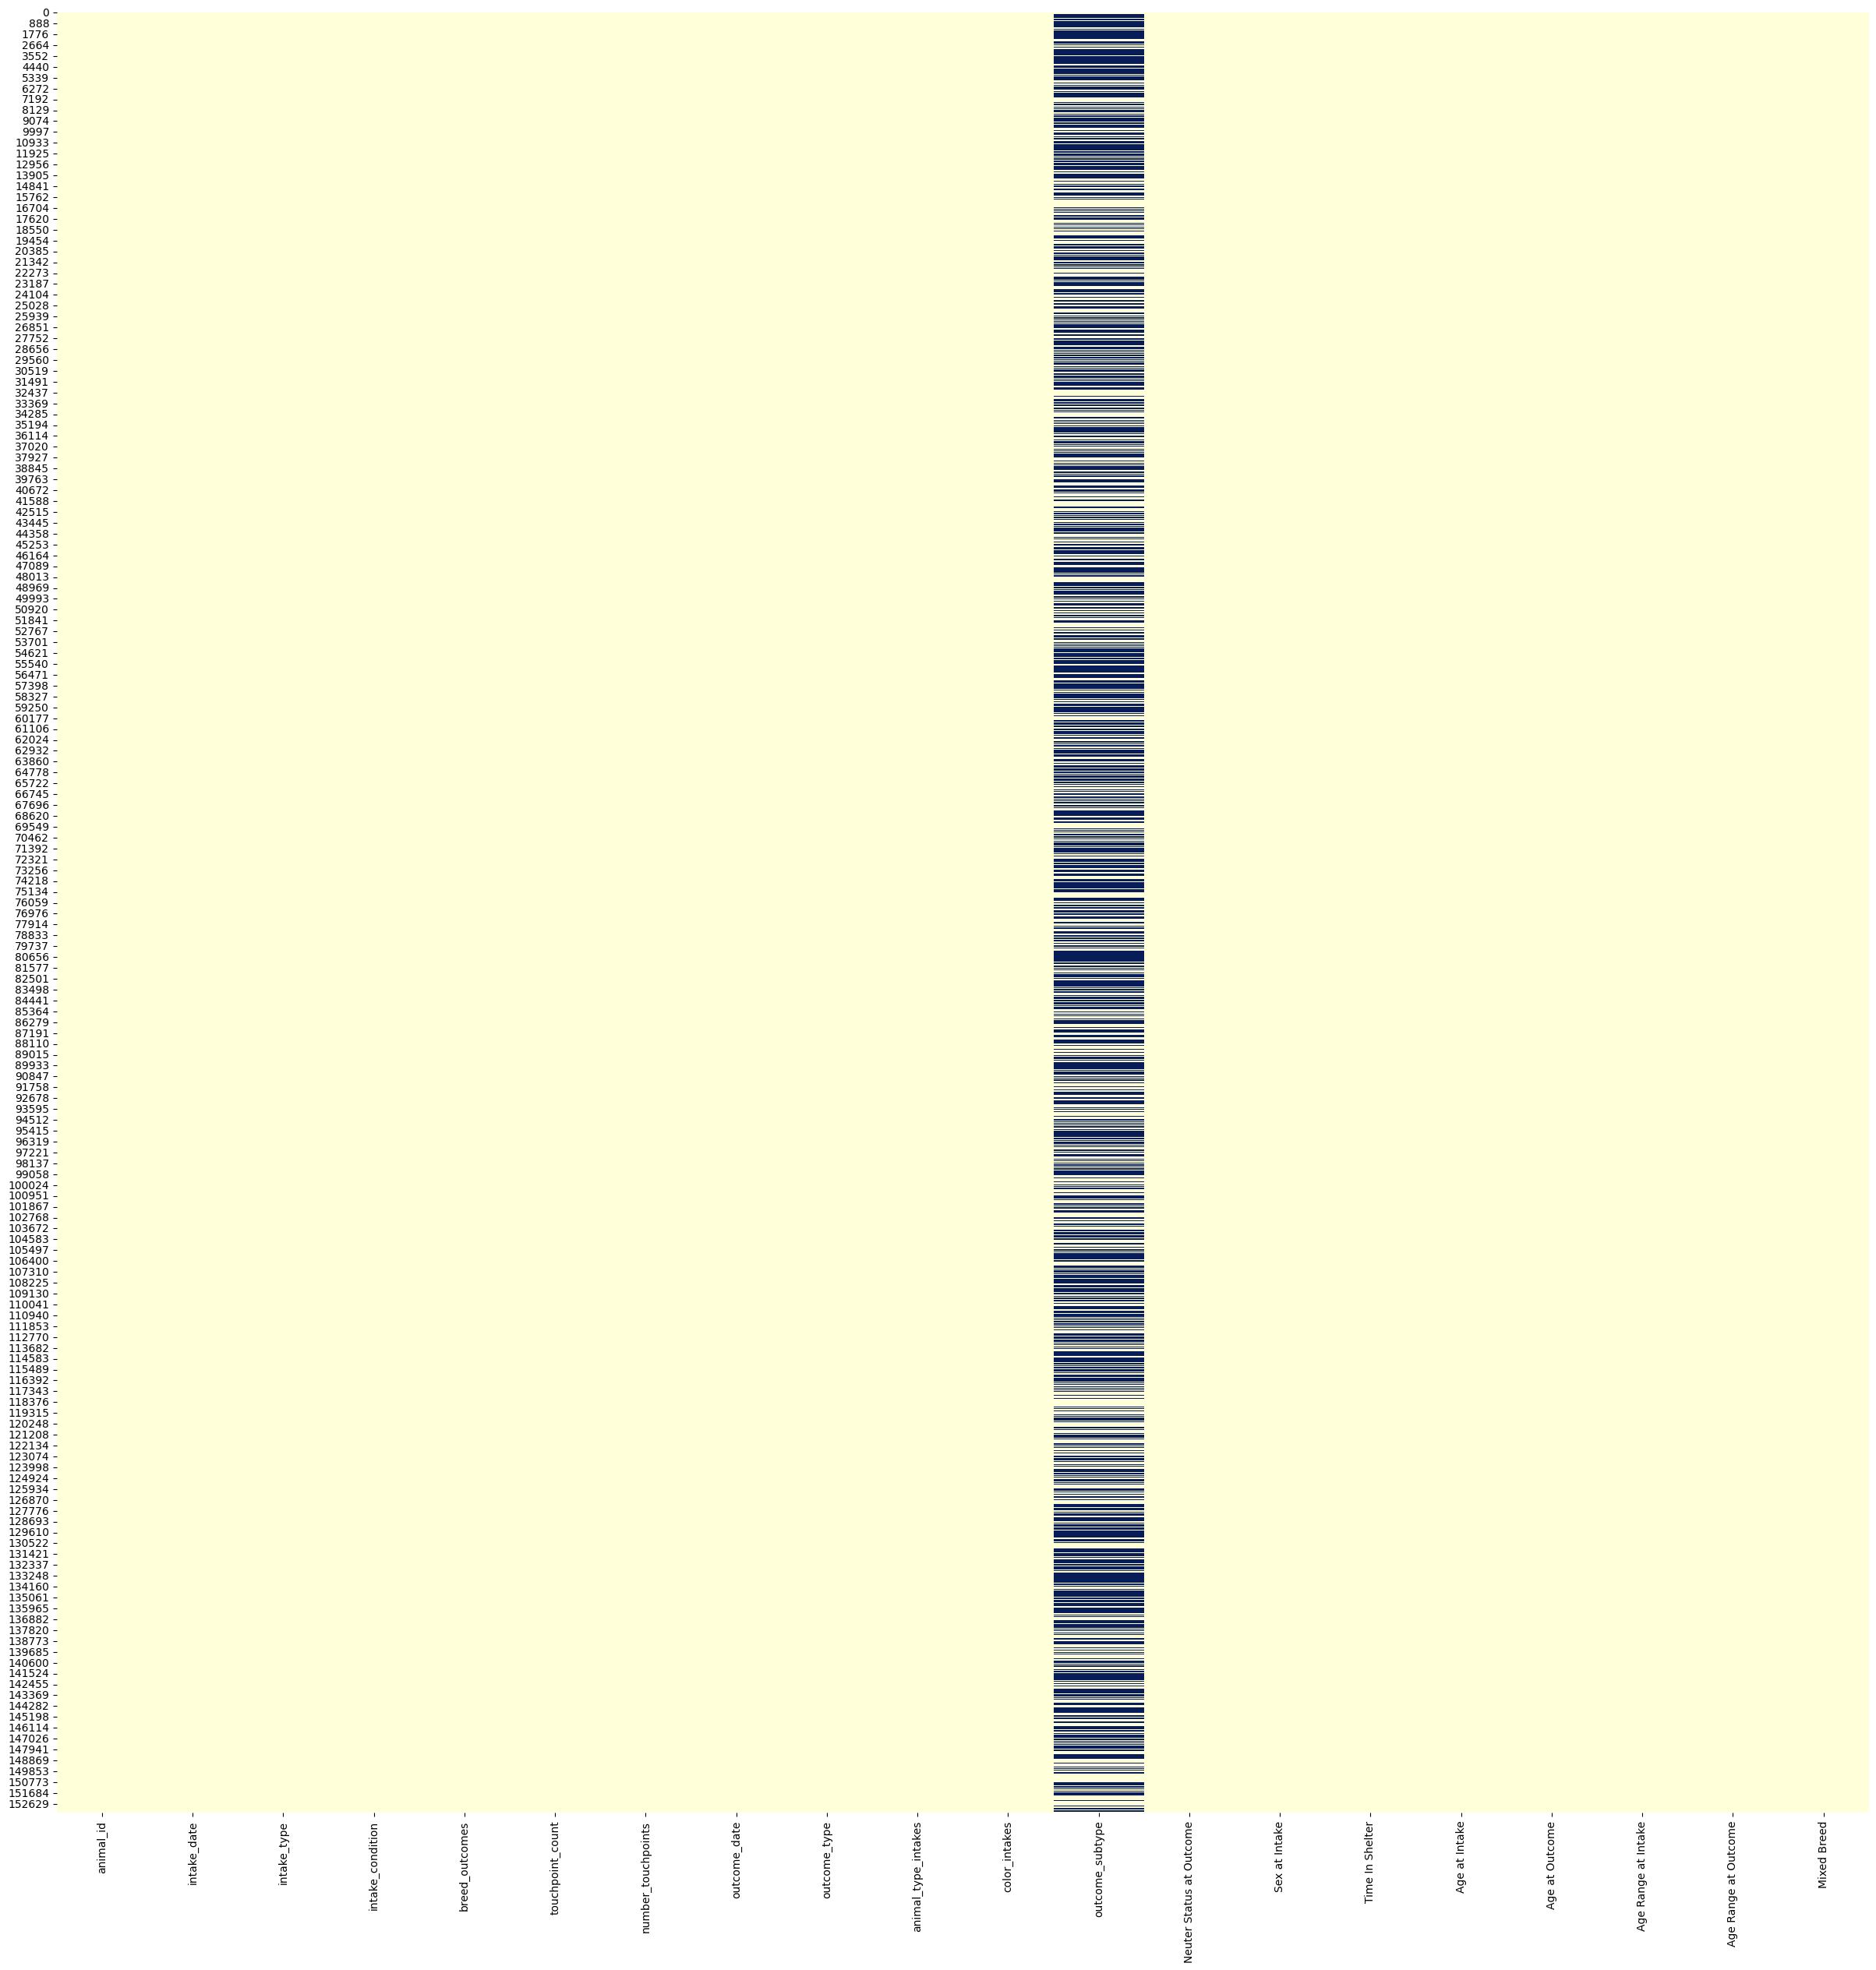

In [239]:
# generate a heatmap of missing values using matplotlib and seaborn

plt.figure(figsize=(30,30))
sns.heatmap(shelter_df.isnull(), cbar=False, cmap="YlGnBu")
plt.show()

The heatmap suggests that missing values are concentrated in the outcome_subtype column, but there are also some missing values in the outcome_type column. We look more closely at the numbers of missing values in the two columns using the .isna() and .sum() method.

In [240]:
# check for non-null values
null_val_shelter = shelter_df.isnull().sum()
null_val_shelter

animal_id                       0
intake_date                     0
intake_type                     0
intake_condition                0
breed_outcomes                  0
touchpoint_count                0
number_touchpoints              0
outcome_date                    0
outcome_type                   21
animal_type_intakes             0
color_intakes                   0
outcome_subtype             81801
Neuter Status at Outcome        0
Sex at Intake                   0
Time In Shelter                 0
Age at Intake                   0
Age at Outcome                  0
Age Range at Intake             0
Age Range at Outcome            0
Mixed Breed                     0
dtype: int64

In [241]:
# checking how many rows have null values in outcome_type columns:
rows_with_nulls = shelter_df[shelter_df['outcome_type'].isnull()].any(axis=1)
null_rows_count = rows_with_nulls.sum()
null_rows_count

21

### 7.2 Addressing null outcome_type values

outcome_type is a very important column for our analysis, and for this reason, we choose to delete the 36 rows that have null values in this column.

In [242]:
# delete the rows that have missing values for outcome_type
shelter_df.dropna(subset=['outcome_type'], inplace=True)

### 7.3 Addressing null outcome_subtype values

We explore the outcome_subtype data to determine its relevance and usefulness to our analysis. First we replace all null values with "Not specified", then we aggregate the data to see what we can learn.

In [243]:
# replace null values for outcome_subtype with "Not specified"
shelter_df["outcome_subtype"] = shelter_df["outcome_subtype"].fillna("Not specified")

In [244]:
# aggregate the data
shelter_df.groupby(["outcome_type", "outcome_subtype"])["outcome_subtype"].count()

outcome_type     outcome_subtype    
Adoption         Barn                       3
                 Foster                 14713
                 Not specified          56436
                 Offsite                  468
Died             At Vet                    98
                 Emergency                 14
                 Enroute                   56
                 In Foster                324
                 In Kennel                701
                 In Surgery                31
                 Not specified            302
                 Rabies Risk                1
Euthanasia       Aggressive               578
                 At Vet                   194
                 Behavior                 154
                 Court/Investigation       57
                 Medical                  183
                 Not specified             41
                 Rabies Risk              437
                 Suffering               3026
                 Underage                  

We generated a bar chart to illustrate the outcome subtype for those animals who were adopted.

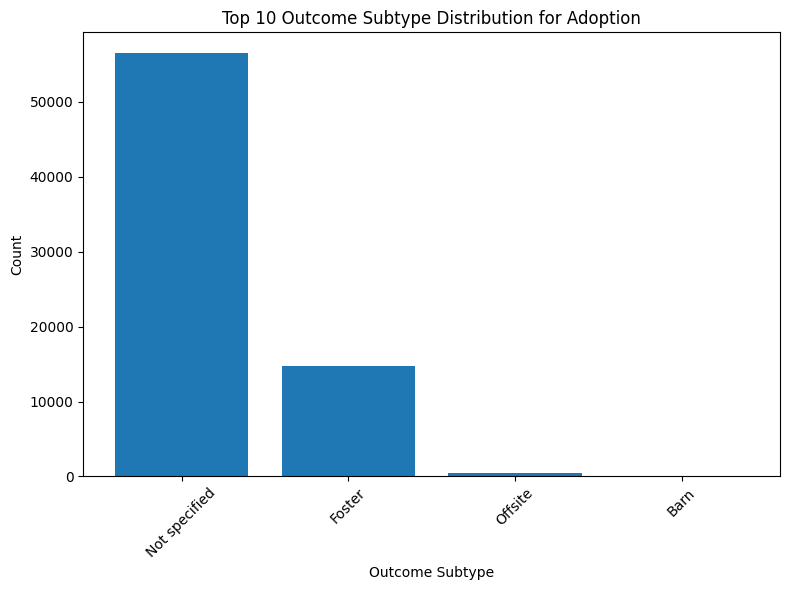

In [245]:
# Filter the df to select only 'Adoption' outcomes:
adoption_df = shelter_df[shelter_df['outcome_type'] == 'Adoption']

# Count the occurrences of each outcome_subtype for Euthanasia cases
outcome_subtype_counts = adoption_df['outcome_subtype'].value_counts()

# Choose the top N most common outcome_subtype values to display
top_n = 10
top_n_values = outcome_subtype_counts.head(top_n)

# Create a bar chart
plt.bar(top_n_values.index, top_n_values.values)
plt.xlabel('Outcome Subtype')
plt.ylabel('Count')
plt.title('Top ' + str(top_n) + ' Outcome Subtype Distribution for Adoption')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

Because the majority of adoption subtypes are "Not specified" we decided that this information is not helpful to our analysis. For this reason, we chose to delete outcome_subtype from our dataset.

In [246]:
# delete outcome_subtype which is not useful for our analysis
shelter_df.drop(['outcome_subtype'],
                axis='columns',
                inplace=True)

shelter_df

animal_id intake_date      intake_type intake_condition   
0            6100  2014-03-07    Public Assist           Normal  \
1            6100  2014-12-19    Public Assist           Normal   
2            6100  2017-12-07            Stray           Normal   
3           47759  2014-04-02  Owner Surrender           Normal   
4          134067  2013-11-16    Public Assist          Injured   
...           ...         ...              ...              ...   
153380     887549  2023-08-22  Owner Surrender           Normal   
153381     887550  2023-08-22  Owner Surrender           Normal   
153382     887577  2023-08-14            Stray         Neonatal   
153383     887578  2023-08-14            Stray         Neonatal   
153384     887606  2023-08-23            Stray             Sick   

                 breed_outcomes  touchpoint_count  number_touchpoints   
0          Spinone Italiano Mix                 1                   3  \
1          Spinone Italiano Mix                 2                   3   
2          Spinone Italiano Mix                 3                   3   
3                     Dachshund                 1                   1   
4             Shetland Sheepdog                 1                   1   
...                         ...               ...                 ...   
153380  Chihuahua Shorthair Mix                 1                   1   
153381  Chihuahua Shorthair Mix                 1                   1   
153382       Domestic Shorthair                 1                   1   
153383       Domestic Shorthair                 1                   1   
153384       Domestic Shorthair                 1                   1   

       outcome_date     outcome_type animal_type_intakes      color_intakes   
0        2014-03-08  Return to Owner                 Dog       Yellow/White  \
1        2014-12-20  Return to Owner                 Dog       Yellow/White   
2        2017-12-07  Return to Owner                 Dog       Yellow/White   
3        2014-04-07         Transfer                 Dog           Tricolor   
4        2013-11-16  Return to Owner                 Dog        Brown/White   
...             ...              ...                 ...                ...   
153380   2023-08-23         Adoption                 Dog                Tan   
153381   2023-08-23         Adoption                 Dog          White/Tan   
153382   2023-08-19         Transfer                 Cat              Black   
153383   2023-08-19         Transfer                 Cat              Black   
153384   2023-08-23         Transfer                 Cat  Brown Tabby/White   

       Neuter Status at Outcome Sex at Intake Time In Shelter Age at Intake   
0                     Neutered           Male          1 days     2433 days  \
1                     Neutered           Male          1 days     2720 days   
2                     Neutered           Male          0 days     3804 days   
3                     Neutered           Male          5 days     3652 days   
4                     Neutered           Male          0 days     5875 days   
...                         ...           ...             ...           ...   
153380                  Intact         Female          1 days     1825 days   
153381                  Intact           Male          1 days      180 days   
153382                  Unknown       Unknown          5 days        1 days   
153383                  Unknown       Unknown          5 days        1 days   
153384                  Intact         Female          0 days       46 days   

       Age at Outcome Age Range at Intake Age Range at Outcome  Mixed Breed  
0           2434 days             5-7 yrs              5-7 yrs         True  
1           2721 days            7-10 yrs             7-10 yrs         True  
2           3804 days           10-13 yrs            10-13 yrs         True  
3           3657 days           10-13 yrs            10-13 yrs        False  
4           5875 days           16-19 

## 8.0 Some final cleaning steps for readability and ease of use

### 8.1 Changing column names

In [247]:
# lets quickly check what column names our dataframe currently has:
column_names = shelter_df.columns

for column_name in column_names:
    print(column_name)

animal_id
intake_date
intake_type
intake_condition
breed_outcomes
touchpoint_count
number_touchpoints
outcome_date
outcome_type
animal_type_intakes
color_intakes
Neuter Status at Outcome
Sex at Intake
Time In Shelter
Age at Intake
Age at Outcome
Age Range at Intake
Age Range at Outcome
Mixed Breed


To improve readability of the data, we rename the columns.

In [248]:
# change column names to improve readability
shelter_df.rename(columns={'animal_id':'Animal ID',
                           'intake_date': 'Intake Date',
                           'intake_type': 'Intake Type',
                           'intake_condition': 'Intake Condition',
                           'breed_outcomes':'Breed',
                           'outcome_date': 'Outcome Date',
                           'outcome_type': 'Outcome Type',
                           'animal_type_intakes': 'Animal',
                           'color_intakes': 'Colour',
                           'Sex at Intake': 'Sex',
                           'touchpoint_count': 'Touchpoint Count',
                           'number_touchpoints': 'Total Touchpoints'},
                  inplace=True)

shelter_df.head(3)

Animal ID Intake Date    Intake Type Intake Condition   
0       6100  2014-03-07  Public Assist           Normal  \
1       6100  2014-12-19  Public Assist           Normal   
2       6100  2017-12-07          Stray           Normal   

                  Breed  Touchpoint Count  Total Touchpoints Outcome Date   
0  Spinone Italiano Mix                 1                  3   2014-03-08  \
1  Spinone Italiano Mix                 2                  3   2014-12-20   
2  Spinone Italiano Mix                 3                  3   2017-12-07   

      Outcome Type Animal        Colour Neuter Status at Outcome   Sex   
0  Return to Owner    Dog  Yellow/White                Neutered   Male  \
1  Return to Owner    Dog  Yellow/White                Neutered   Male   
2  Return to Owner    Dog  Yellow/White                Neutered   Male   

  Time In Shelter Age at Intake Age at Outcome Age Range at Intake   
0          1 days     2433 days      2434 days             5-7 yrs  \
1          1 days     2720 days      2721 days            7-10 yrs   
2          0 days     3804 days      3804 days           10-13 yrs   

  Age Range at Outcome  Mixed Breed  
0              5-7 yrs         True  
1             7-10 yrs         True  
2            10-13 yrs         True

### 8.2 Sorting rows

We sort the rows based on the intake date and reset the index as the old index is not needed.

In [249]:
# sort by Intake Date
shelter_df.sort_values('Intake Date', inplace=True)

# reset index
shelter_df.reset_index(drop=True, inplace=True)

shelter_df.head(5)

Animal ID Intake Date Intake Type Intake Condition   
0     664308  2013-10-01       Stray           Normal  \
1     664293  2013-10-01       Stray           Normal   
2     664292  2013-10-01       Stray           Normal   
3     664291  2013-10-01       Stray           Normal   
4     664290  2013-10-01       Stray           Normal   

                       Breed  Touchpoint Count  Total Touchpoints   
0  Australian Cattle Dog Mix                 1                  2  \
1   Domestic Medium Hair Mix                 1                  1   
2     Domestic Shorthair Mix                 1                  1   
3     Domestic Shorthair Mix                 1                  1   
4     Domestic Shorthair Mix                 1                  1   

  Outcome Date     Outcome Type Animal             Colour   
0   2013-10-02  Return to Owner    Dog           Tricolor  \
1   2013-10-12         Transfer    Cat        Black/White   
2   2013-10-02         Transfer    Cat  Brown Tabby/White   
3   2013-12-16         Adoption    Cat              Black   
4   2013-12-08         Adoption    Cat             Tortie   

  Neuter Status at Outcome     Sex Time In Shelter Age at Intake   
0                  Intact     Male          1 days     2192 days  \
1                  Intact     Male         11 days       37 days   
2                  Intact   Female          1 days      304 days   
3                Neutered     Male         76 days       30 days   
4                  Spayed   Female         68 days       30 days   

  Age at Outcome Age Range at Intake Age Range at Outcome  Mixed Breed  
0      2193 days             5-7 yrs              5-7 yrs         True  
1        48 days             0-3 mon              0-3 mon         True  
2       305 days            6-12 mon             6-12 mon         True  
3       106 days             0-3 mon              3-6 mon         True  
4        98 days             0-3 mon              3-6 mon         True

#### 8.2.1 Addressing an observation: potential duplicates in data

When looking at the data above, we noticed rows 1-3 are identical except for animal id. We then used the below code to check if there were any more rows in the data like this and saw that there were around 3000 potential duplicates.

When looking further into this, we noticed that the majority had a very young Intake Age. We thought that this is likely to mean that the animals were brought to the shelter as a litter. Therefore we chose not remove these rows from our data.

In [250]:
shelter_df[shelter_df.duplicated(subset=shelter_df.columns.difference(['Animal ID']))]

Animal ID Intake Date Intake Type Intake Condition   
54         664236  2013-10-01       Stray           Normal  \
56         664237  2013-10-01       Stray           Normal   
66         664262  2013-10-01       Stray           Normal   
112        664336  2013-10-02       Stray           Normal   
204        664503  2013-10-04       Stray           Normal   
...           ...         ...         ...              ...   
147164     887161  2023-08-16       Stray         Neonatal   
147187     887269  2023-08-18       Stray         Neonatal   
147188     887268  2023-08-18       Stray         Neonatal   
147193     887345  2023-08-19       Stray         Neonatal   
147219     887511  2023-08-22       Stray           Normal   

                         Breed  Touchpoint Count  Total Touchpoints   
54      Domestic Shorthair Mix                 1                  1  \
56      Domestic Shorthair Mix                 1                  1   
66      Domestic Shorthair Mix                 1                  1   
112     Domestic Shorthair Mix                 1                  1   
204     Domestic Shorthair Mix                 1                  1   
...                        ...               ...                ...   
147164      Domestic Shorthair                 1                  1   
147187      Domestic Shorthair                 1                  1   
147188      Domestic Shorthair                 1                  1   
147193      Domestic Shorthair                 1                  1   
147219  Domestic Shorthair Mix                 1                  1   

       Outcome Date Outcome Type Animal        Colour   
54       2013-10-01     Transfer    Cat  Orange/White  \
56       2013-10-01     Transfer    Cat  Orange/White   
66       2013-10-01     Transfer    Cat  Orange Tabby   
112      2013-10-08     Adoption    Cat        Calico   
204      2013-10-10     Adoption    Cat   Black/White   
...             ...          ...    ...           ...   
147164   2023-08-16     Transfer    Cat          Gray   
147187   2023-08-18     Transfer    Cat         Black   
147188   2023-08-18     Transfer    Cat         Black   
147193   2023-08-19     Transfer    Cat  Orange Tabby   
147219   2023-08-22     Transfer    Cat         Black   

       Neuter Status at Outcome      Sex Time In Shelter Age at Intake   
54                      Unknown  Unknown          0 days        7 days  \
56                      Unknown  Unknown          0 days        7 days   
66                      Intact      Male          0 days        9 days   
112                     Spayed    Female          6 days       77 days   
204                   Neutered      Male          6 days       76 days   
...                         ...      ...             ...           ...   
147164                  Unknown  Unknown          0 days        1 days   
147187                  Intact      Male          0 days        4 days   
147188                  Intact      Male          0 days        4 days   
147193                  Intact      Male          0 days        2 days   
147219                  Intact    Female          0 days        9 days   

       Age at Outcome Age Range at Intake Age Range at Outcome  Mixed Breed  
54             7 days             0-3 mon              0-3 mon         True  
56             7 days             0-3 mon              0-3 mon         True  
66             9 days             0-3 mon              0-3 mon         True  
112           83 days             0-3 mon              0-3 mon         True  
204           82 days             0-3 mon              0-3 mon         True  
...               ...                 ...                  ...          ...  
147164         1 days             0-3 mon              0-3 mon        False  
147187         4 days             0-3 mon              0-3 mon        False  
147188         4 days             0-3 mon              0-3 mon        False  
147193         2 days             0-3 mon              0

### 8.3 Rearranging column postions

We rearrange the column positions for easier readability of the data.

In [251]:
shelter_df = shelter_df.reindex(columns=['Animal ID',
                                         'Animal',
                                         'Intake Date',
                                         'Outcome Date',
                                         'Time In Shelter',
                                         'Age at Intake',
                                         'Age Range at Intake',
                                         'Age at Outcome',
                                         'Age Range at Outcome',
                                         'Intake Condition',
                                         'Intake Type',
                                         'Outcome Type',
                                         'Sex',
                                         'Neuter Status at Outcome',
                                         'Breed',
                                         'Mixed Breed',
                                         'Colour',
                                         'Total Touchpoints',
                                         'Touchpoint Count'])

shelter_df

Animal ID Animal Intake Date Outcome Date Time In Shelter   
0          664308    Dog  2013-10-01   2013-10-02          1 days  \
1          664293    Cat  2013-10-01   2013-10-12         11 days   
2          664292    Cat  2013-10-01   2013-10-02          1 days   
3          664291    Cat  2013-10-01   2013-12-16         76 days   
4          664290    Cat  2013-10-01   2013-12-08         68 days   
...           ...    ...         ...          ...             ...   
147218     887510    Cat  2023-08-22   2023-08-22          0 days   
147219     887511    Cat  2023-08-22   2023-08-22          0 days   
147220     887549    Dog  2023-08-22   2023-08-23          1 days   
147221     887550    Dog  2023-08-22   2023-08-23          1 days   
147222     887606    Cat  2023-08-23   2023-08-23          0 days   

       Age at Intake Age Range at Intake Age at Outcome Age Range at Outcome   
0          2192 days             5-7 yrs      2193 days              5-7 yrs  \
1            37 days             0-3 mon        48 days              0-3 mon   
2           304 days            6-12 mon       305 days             6-12 mon   
3            30 days             0-3 mon       106 days              3-6 mon   
4            30 days             0-3 mon        98 days              3-6 mon   
...              ...                 ...            ...                  ...   
147218        9 days             0-3 mon         9 days              0-3 mon   
147219        9 days             0-3 mon         9 days              0-3 mon   
147220     1825 days             3-5 yrs      1826 days              5-7 yrs   
147221      180 days             3-6 mon       181 days              3-6 mon   
147222       46 days             0-3 mon        46 days              0-3 mon   

       Intake Condition      Intake Type     Outcome Type     Sex   
0                Normal            Stray  Return to Owner    Male  \
1                Normal            Stray         Transfer    Male   
2                Normal            Stray         Transfer  Female   
3                Normal            Stray         Adoption    Male   
4                Normal            Stray         Adoption  Female   
...                 ...              ...              ...     ...   
147218           Normal            Stray         Transfer  Female   
147219           Normal            Stray         Transfer  Female   
147220           Normal  Owner Surrender         Adoption  Female   
147221           Normal  Owner Surrender         Adoption    Male   
147222             Sick            Stray         Transfer  Female   

       Neuter Status at Outcome                      Breed  Mixed Breed   
0                       Intact   Australian Cattle Dog Mix         True  \
1                       Intact    Domestic Medium Hair Mix         True   
2                       Intact      Domestic Shorthair Mix         True   
3                     Neutered      Domestic Shorthair Mix         True   
4                       Spayed      Domestic Shorthair Mix         True   
...                         ...                        ...          ...   
147218                  Intact      Domestic Shorthair Mix         True   
147219                  Intact      Domestic Shorthair Mix         True   
147220                  Intact     Chihuahua Shorthair Mix         True   
147221                  Intact     Chihuahua Shorthair Mix         True   
147222                  Intact          Domestic Shorthair        False   

                   Colour  Total Touchpoints  Touchpoint Count  
0                Tricolor                  2                 1  
1             Black/White                  1                 1  
2       Brown Tabby/White                  1                 1  
3                   Black                  1                 1  
4                  Tortie                  1                 1  
...                   ...                ...               ...  
147218              Black        

## 9.0 Write cleaned data to csv file

In [252]:
# write cleaned data to csv
shelter_df.to_csv('Austin_Animal_Center_clean_data.csv')

## 10.0 Descriptive Analysis

### It is important to determine what datatypes you are working with before starting the analysis

In [253]:
# finding out datatypes of columns:
shelter_df['Intake Date'] = pd.to_datetime(shelter_df['Intake Date'])
shelter_df['Outcome Date'] = pd.to_datetime(shelter_df['Outcome Date'])
shelter_df[['Time In Shelter', 'Age at Intake', 'Age at Outcome']] = shelter_df[['Time In Shelter', 'Age at Intake', 'Age at Outcome']].apply(pd.to_timedelta)
shelter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147223 entries, 0 to 147222
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   Animal ID                 147223 non-null  int64          
 1   Animal                    147223 non-null  object         
 2   Intake Date               147223 non-null  datetime64[ns] 
 3   Outcome Date              147223 non-null  datetime64[ns] 
 4   Time In Shelter           147223 non-null  timedelta64[ns]
 5   Age at Intake             147223 non-null  timedelta64[ns]
 6   Age Range at Intake       147223 non-null  category       
 7   Age at Outcome            147223 non-null  timedelta64[ns]
 8   Age Range at Outcome      147223 non-null  category       
 9   Intake Condition          147223 non-null  object         
 10  Intake Type               147223 non-null  object         
 11  Outcome Type              147223 non-null  object   

### Lets check what column names our dataframe currently has:


In [254]:
column_names = shelter_df.columns

for column_name in column_names:
    print(column_name)

Animal ID
Animal
Intake Date
Outcome Date
Time In Shelter
Age at Intake
Age Range at Intake
Age at Outcome
Age Range at Outcome
Intake Condition
Intake Type
Outcome Type
Sex
Neuter Status at Outcome
Breed
Mixed Breed
Colour
Total Touchpoints
Touchpoint Count


### 10.1. Explore basic statistics and descriptive summaries of the datasets:

#### 10.1.a. Creating pie charts for the distribution of unique values in some categorical columns:

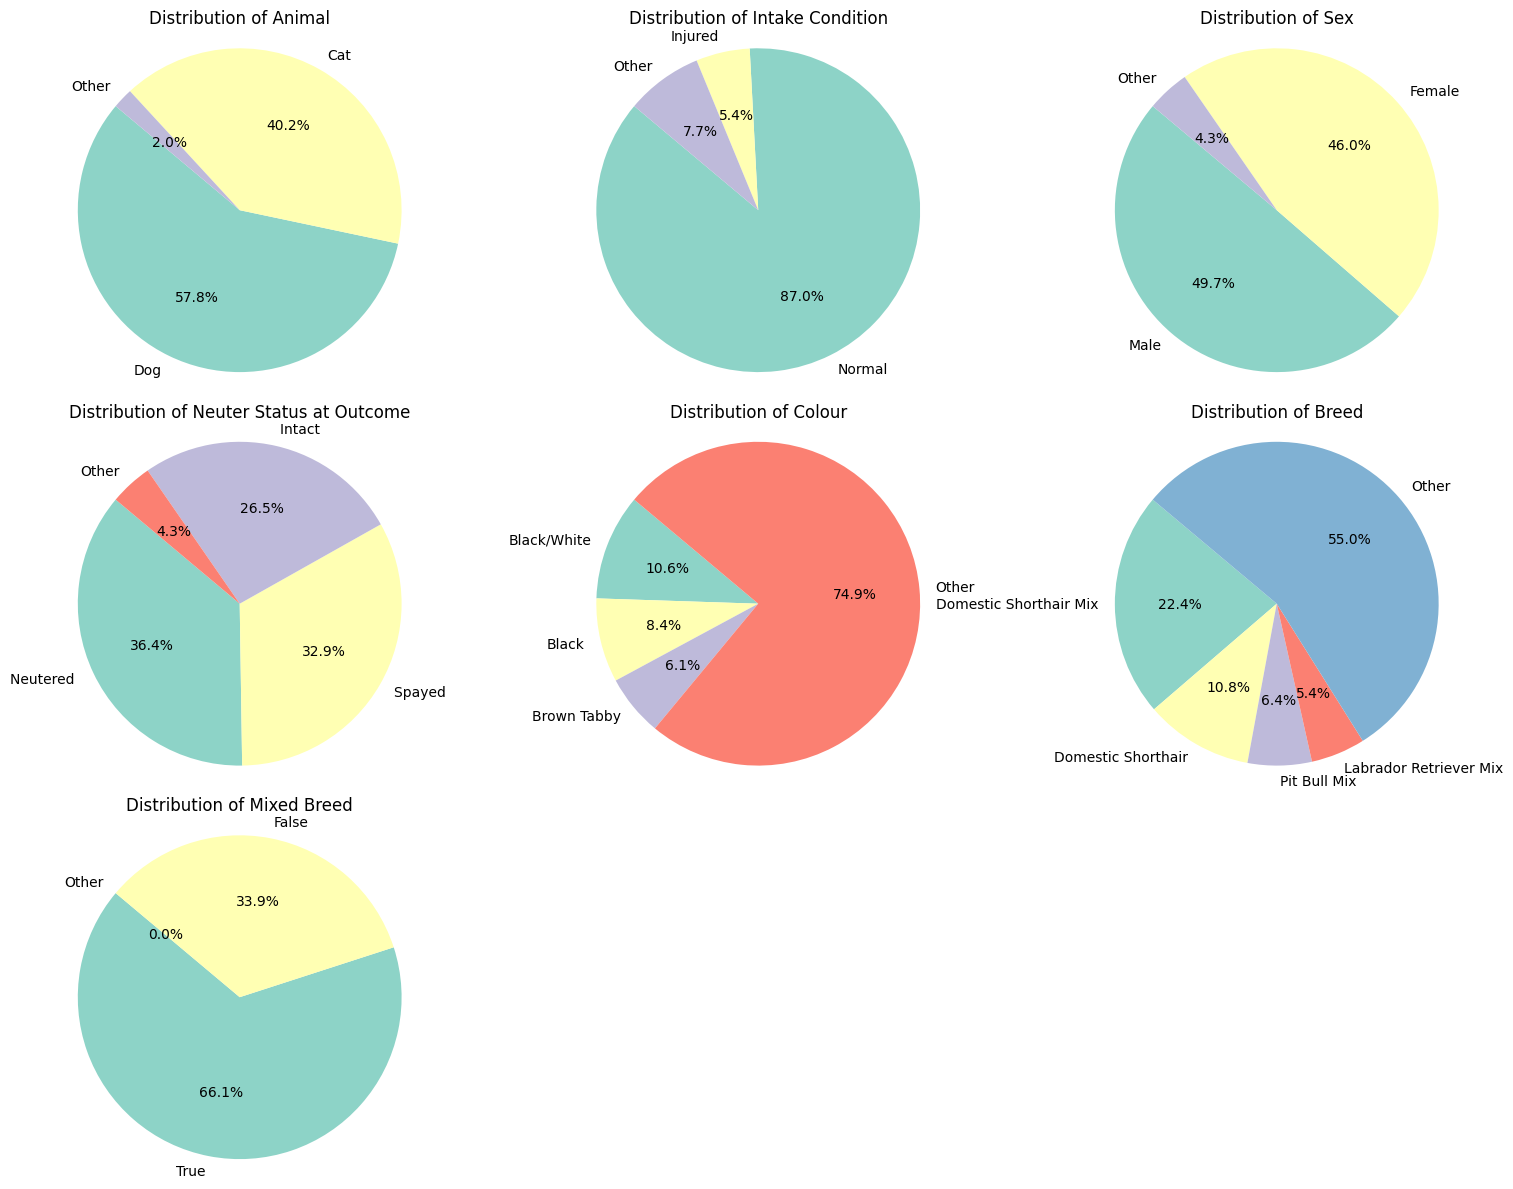

In [255]:

# A loop iterates through the specified categorical columns and creates
# a countplot for each using Seaborn's sns.countplot(). This code creates a 2x3 grid
# of subplots for the different categorical columns, allowing to visualise the
# distribution of unique values in each column.

# The threshold for the percentage of 'Other' values is set to 5% - for better visualisation and to prevent overcrowding of the pie chart segments.

# List of categorical columns
categorical_columns = ['Animal', 'Intake Condition', 'Sex', 'Neuter Status at Outcome', 'Colour', 'Breed', 'Mixed Breed']

# Set up the subplots
plt.figure(figsize=(15, 12))

# Loop through each categorical column
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)

    # Get the value counts for the column
    value_counts = shelter_df[col].value_counts()

    # Filter out values with less than 5% occurrences
    threshold = 0.05 * len(shelter_df)
    filtered_value_counts = value_counts[value_counts >= threshold]

    # Calculate 'Other' count for values below the threshold
    other_count = len(shelter_df) - filtered_value_counts.sum()

    # Combine filtered counts and 'Other' count
    filtered_value_counts['Other'] = other_count

    # Create a pie chart
    plt.pie(filtered_value_counts, labels=filtered_value_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
    plt.title(f'Distribution of {col}')
    plt.axis('equal')

plt.tight_layout()
plt.show()





##### Animals Distribution:
* Among all the animals present in the shelter, 40.1% are categorised as cats, and approximately 57.8% are dogs. This indicates that dogs make up the majority of the shelter's population. The remaining 2% of the shelter's animal population comprises various other animals, including birds. This category represents a smaller portion of the shelter's residents, therefore in our analysis we are going to focus on cats and dogs.


##### Intake Condition:
* The majority, 86.9%, of animals have a 'Normal' intake condition.
* Around 5.4% of animals are 'Injured' at intake.

##### Sex:
* Approximately 49.7% of animals are male.
* About 46% are female.
* 4.3% - unknown (noted as ‘other’ in the graph).

##### Neuter Status at Outcome:
* Neutered animals represent 36.4% of outcomes.
* Spayed animals account for 32.9% of outcomes.
* Around 26.5% of outcomes involve intact animals.

##### Colour:
* The most common colour category is 'Black and white,' representing 10.6% of animals.
* 'Black' is the second most frequent colour at 8.4%.
'Brown tabby' is observed in 6.1% of animals.
* The 'Other' category, which includes less common colours, makes up the majority at 74.9%.

##### Breed:
* 'Domestic Shorthair Mix' is the most prevalent breed, making up 22.4%.
* 'Domestic shorthair' follows with 10.8%.
* 'Pit Bull mix' accounts for 6.4% of observed breeds.
* 'Labrador Retriever Mix' represents 5.4% of breeds.
* The 'Other' category, encompassing various less common breeds, is the largest at 55.0%.

##### Mixed Breed:
* Animals classified as 'Mixed' breed constitute the majority at 66.1%.


#### 10.1.b. Visualising the average age at intake for different intake types:

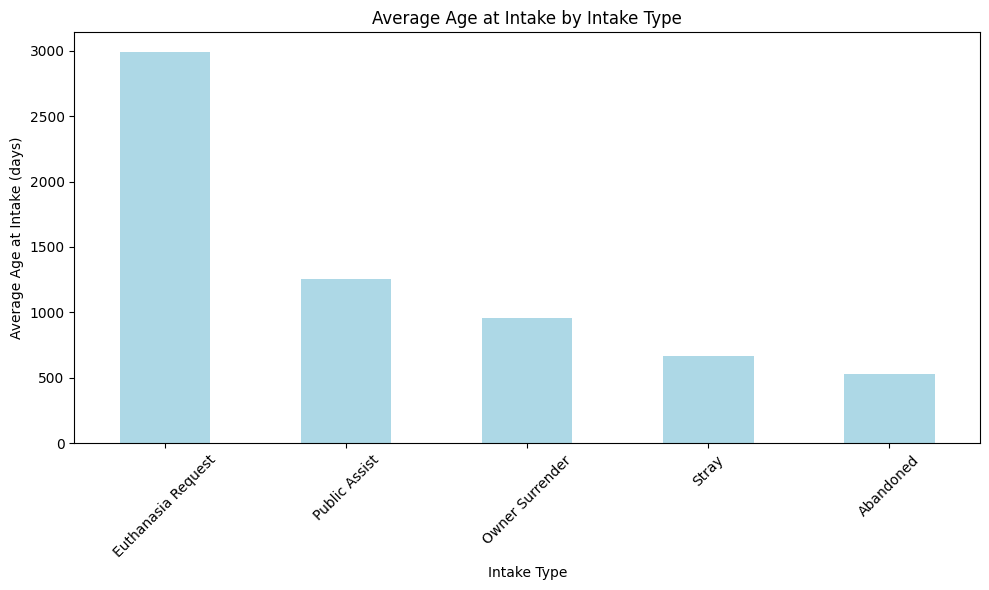

In [256]:
# Group by 'Intake Type' and calculate the mean 'Age at Intake'
grouped_by_intake_type = shelter_df.groupby('Intake Type')['Age at Intake'].mean()

# Convert mean age to days
grouped_by_intake_type = grouped_by_intake_type.dt.days

# Sort the data in descending order
grouped_by_intake_type = grouped_by_intake_type.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
grouped_by_intake_type.plot(kind='bar', color='lightblue')
plt.title('Average Age at Intake by Intake Type')
plt.xlabel('Intake Type')
plt.ylabel('Average Age at Intake (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*The finding that animals brought in through 'Euthanasia request' have the oldest average age is logical. This likely indicates that owners may be surrendering older animals that may have health issues or are nearing the end of their lives. The second oldest average age among animals with a 'Public assist' intake type suggests that animals in need of assistance from the public, such as strays or abandoned pets, tend to be older. This could be due to factors like elderly animals found on the streets or older pets that owners are no longer able to care for (the group that also contributes to the third oldest animals group).*

#### 10.1.c. Visualising the average age at outcome for different outcome types:

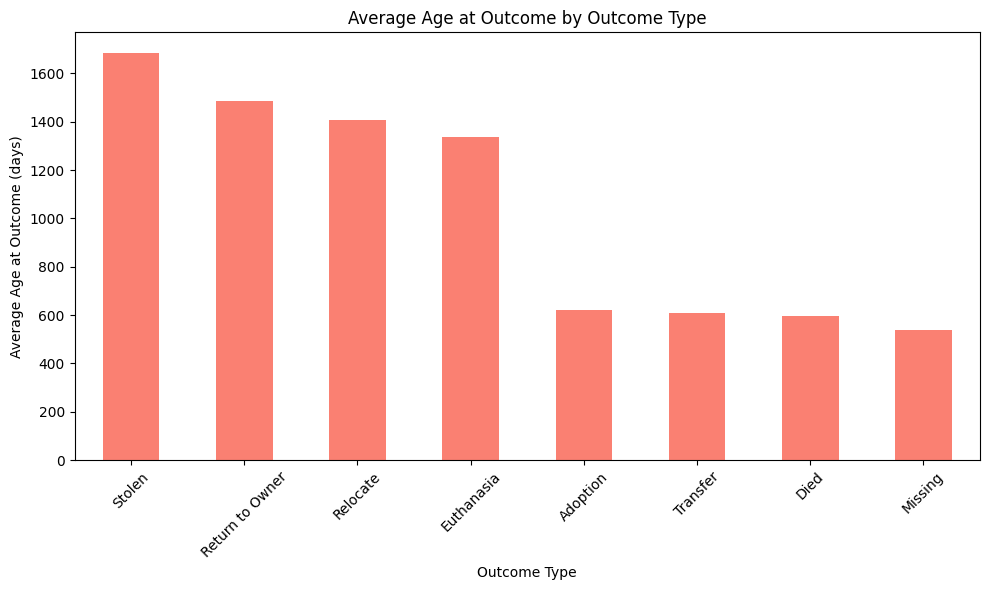

In [257]:
# The groupby() method is used to group the data by 'Outcome Type', and then the mean:

# Convert Timedeltas to days for 'Age at Outcome'
shelter_df['Age at Outcome'] = shelter_df['Age at Outcome'].dt.days

# Group by 'Outcome Type' and calculate the mean 'Age at Outcome'
grouped_by_outcome_type = shelter_df.groupby('Outcome Type')['Age at Outcome'].mean()

# Sort the data in descending order
grouped_by_outcome_type = grouped_by_outcome_type.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
grouped_by_outcome_type.plot(kind='bar', color='salmon')
plt.title('Average Age at Outcome by Outcome Type')
plt.xlabel('Outcome Type')
plt.ylabel('Average Age at Outcome (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Animals who end up stolen are the oldest in the shelter. Second oldest - returned to owner, third oldest - relocated, fourth oldest outcome type is euthanasia and fifth oldest get adopted.*

#### 10.1.d. Visualising the average age of adopted animals by animal type:

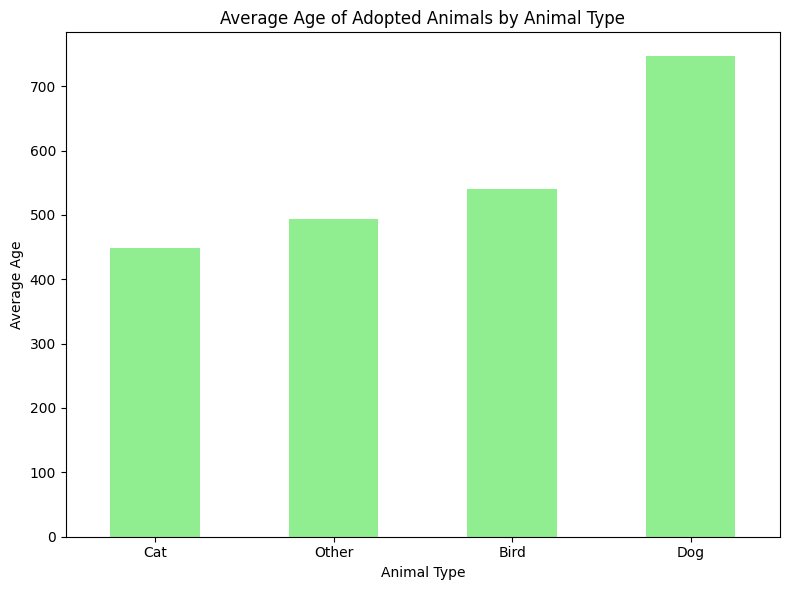

In [258]:
# Filter data for animals with outcome 'Adopted'
adopted_animals = shelter_df[shelter_df['Outcome Type'] == 'Adoption']

# Calculate the average age by animal type and sort by ascending average age
average_age_by_type = adopted_animals.groupby('Animal')['Age at Outcome'].mean().sort_values()

# Create a bar plot with ascending bars
plt.figure(figsize=(8, 6))
average_age_by_type.plot(kind='bar', color='lightgreen')
plt.title("Average Age of Adopted Animals by Animal Type")
plt.xlabel('Animal Type')
plt.ylabel('Average Age')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

*Dogs have the highest average age (over 700 days), followed by birds (around 550 days), and cats (over 400 days).*

In [259]:
# Checking data type for Time In Shelter, Age at Intake and Age at Outcome columns:
data_type1 = shelter_df['Age at Intake'].dtype
data_type2 = shelter_df['Age at Outcome'].dtype
data_type3 = shelter_df['Time In Shelter'].dtype


print(f"Data type of 'Age at Intake': {data_type1}")
print(f"Data type of 'Age at Outcome': {data_type2}")
print(f"Data type of 'Time In Shelter': {data_type3}")

Data type of 'Age at Intake': timedelta64[ns]
Data type of 'Age at Outcome': int64
Data type of 'Time In Shelter': timedelta64[ns]


#### 10.1.e. Visualising the mean time in shelter for different intake types:

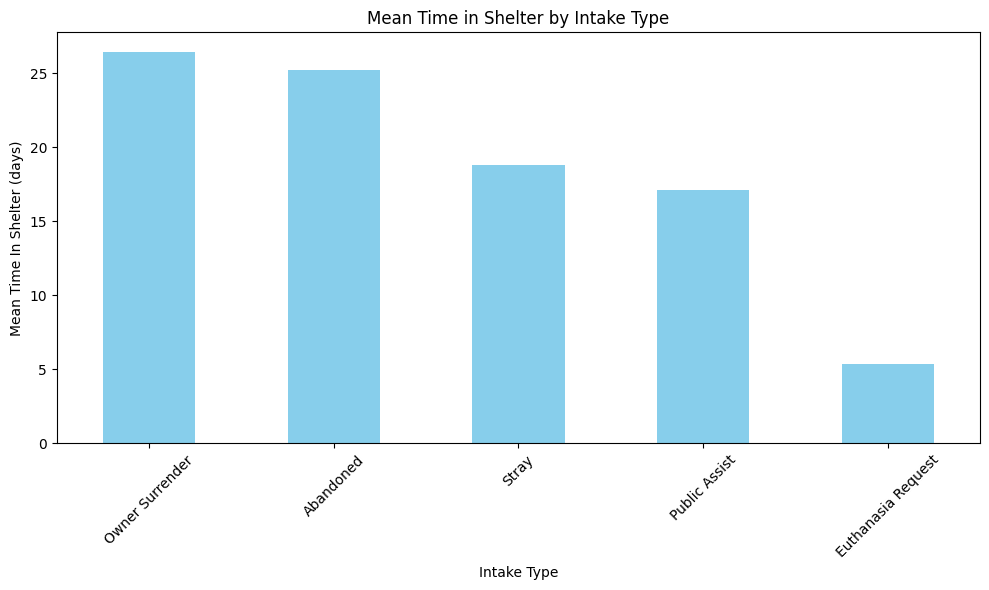

In [260]:
# Group by 'Intake Type' and calculate the mean 'Time In Shelter'
grouped_by_intake_type = shelter_df.groupby('Intake Type')['Time In Shelter'].mean()

# Convert Timedelta to days and sort the data in descending order
grouped_by_intake_type = grouped_by_intake_type / pd.Timedelta(days=1)
grouped_by_intake_type = grouped_by_intake_type.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
grouped_by_intake_type.plot(kind='bar', color='skyblue')
plt.title('Mean Time in Shelter by Intake Type')
plt.xlabel('Intake Type')
plt.ylabel('Mean Time In Shelter (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Longest mean time in the shelter was spent by animals who came to the shelter because their owner surrendered them.*

#### 10.1.f. Visualising the mean time in shelter for different outcome types:



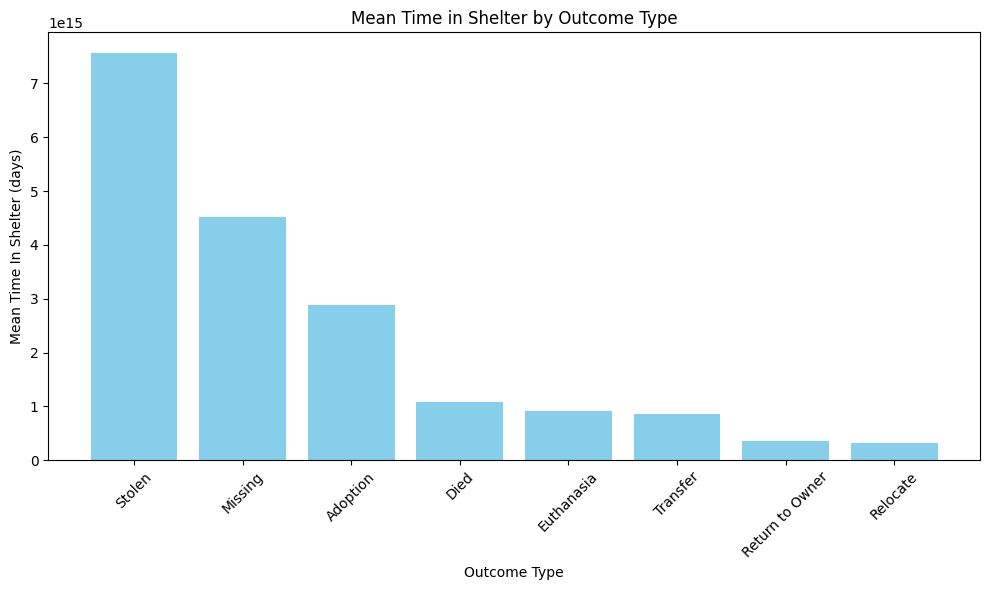

In [261]:
# Group by 'Outcome Type' and calculate the mean 'Time In Shelter'
grouped_by_outcome_type = shelter_df.groupby('Outcome Type')['Time In Shelter'].mean()

# Sort the data in descending order
grouped_by_outcome_type = grouped_by_outcome_type.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_by_outcome_type.index, grouped_by_outcome_type.values, color='skyblue')
plt.title('Mean Time in Shelter by Outcome Type')
plt.xlabel('Outcome Type')
plt.ylabel('Mean Time In Shelter (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Animals (as we learn from other data - 100% of them are dogs) who subsequently get stolen spend the most time in the shelter on average.*

### 10.2. Categorise animals based on types (e.g., dogs, cats), breeds and colours.

#### 10.2.a. Create bar plots for the frequency distribution of breeds and colours:

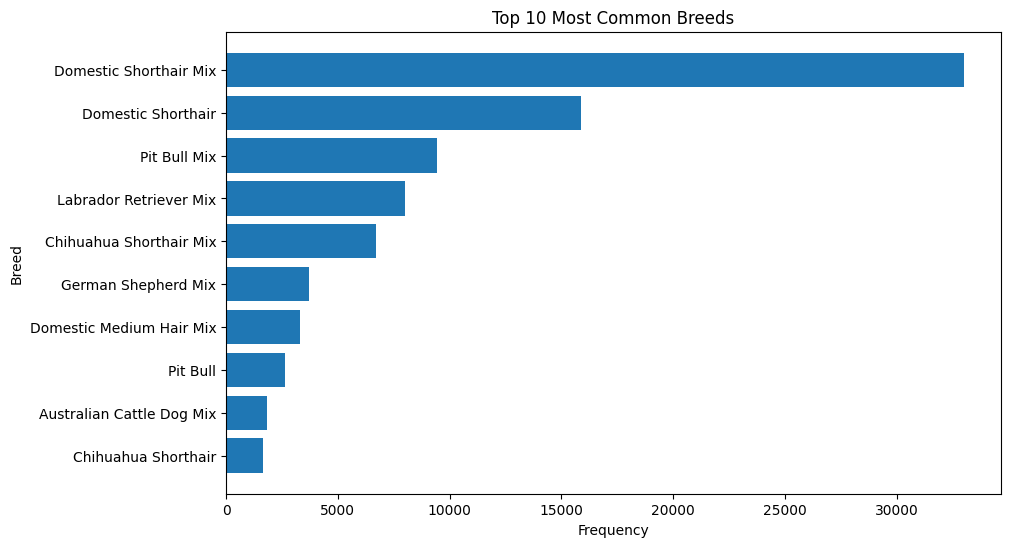

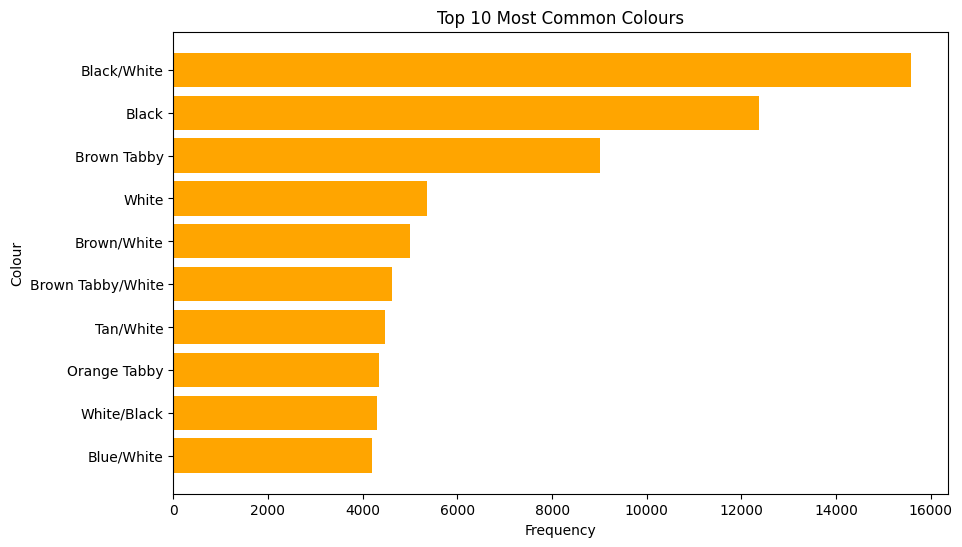

In [262]:
# Frequency distribution of breeds
breed_counts = shelter_df['Breed'].value_counts().head(10)
breed_names = breed_counts.index

plt.figure(figsize=(10, 6))
plt.barh(breed_names, breed_counts)
plt.xlabel('Frequency')
plt.ylabel('Breed')
plt.title('Top 10 Most Common Breeds')
# Invert y-axis to have the most common breed on top:
plt.gca().invert_yaxis()
plt.show()

# Frequency distribution of colours
colour_counts = shelter_df['Colour'].value_counts().head(10)
colour_names = colour_counts.index

plt.figure(figsize=(10, 6))
plt.barh(colour_names, colour_counts, color='orange')
plt.xlabel('Frequency')
plt.ylabel('Colour')
plt.title('Top 10 Most Common Colours')
# Invert y-axis to have the most common colour on top:
plt.gca().invert_yaxis()
plt.show()


#####*Domestic shorthair mix and domestic shorthair make up the largest proportion of cat breeds at intake*


#####*Pit Bull Mix, Labarador Retriever Mix and Chihuahua Shorthair Mix make up the largest proportion of dog breeds at intake.*

#####*Black/White, Black and Brown Tabby make up the largest proportion of colours amongst cats and dogs*


#### 10.2.b. Create a figure with two subplots (one for cats and one for dogs) side by side, each showing the colour distribution trends for intake and 'adopted' outcome:

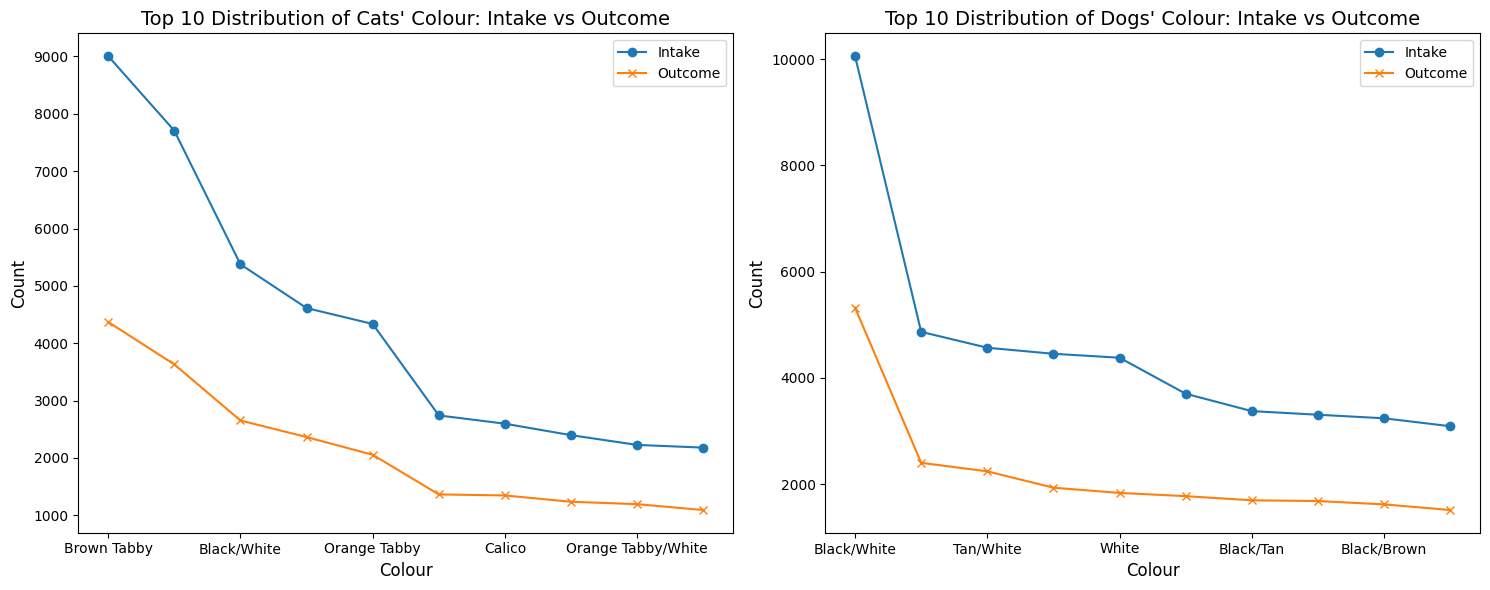

In [263]:
# Filter data for Cats
catsData = shelter_df[shelter_df['Animal'] == 'Cat']

# Calculate the top 10 colours by count at intake and outcome
top_colours_intake = catsData['Colour'].value_counts().head(10)
top_colours_outcome = catsData[catsData['Outcome Type'] == 'Adoption']['Colour'].value_counts().head(10)

# Filter data for Dogs
dogsData = shelter_df[shelter_df['Animal'] == 'Dog']

# Calculate the top 10 colours by count at intake and outcome for dogs
top_colours_intake_dogs = dogsData['Colour'].value_counts().head(10)
top_colours_outcome_dogs = dogsData[dogsData['Outcome Type'] == 'Adoption']['Colour'].value_counts().head(10)

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for cats' color distribution
top_colours_intake.plot(kind='line', marker='o', label='Intake', ax=axes[0])
top_colours_outcome.plot(kind='line', marker='x', label='Outcome', ax=axes[0])
axes[0].set_title("Top 10 Distribution of Cats' Colour: Intake vs Outcome", fontsize=14)
axes[0].set_xlabel('Colour', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].legend()

# Plot for dogs' colour distribution
top_colours_intake_dogs.plot(kind='line', marker='o', label='Intake', ax=axes[1])
top_colours_outcome_dogs.plot(kind='line', marker='x', label='Outcome', ax=axes[1])
axes[1].set_title("Top 10 Distribution of Dogs' Colour: Intake vs Outcome", fontsize=14)
axes[1].set_xlabel('Colour', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


##### *Brown Tabby and Black and White cats make up the highest proportion of cat colours at both intake and outcome. Black/White dogs make up the highest proportion of dog colours at intake and outcome.*

### 10.3. Calculate the overall intake and outcome counts, with particular attention to adoption and how it compares to other outcomes.


#### 10.3.a. Create a pie chart showing the percentage of intake types:

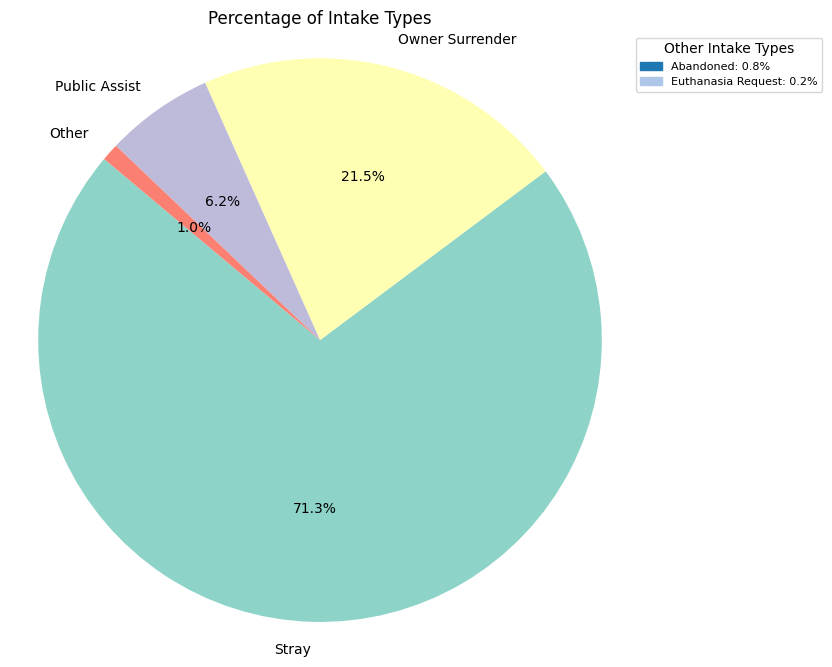

In [264]:

# Calculate value counts and percentages for intake types
value_counts = shelter_df['Intake Type'].value_counts()
percentages = (value_counts / value_counts.sum()) * 100

# Combine small slices into an "Other" category
threshold = 5
small_slices = percentages[percentages < threshold]
percentages['Other'] = small_slices.sum()
percentages.drop(small_slices.index, inplace=True)

# Create a pie chart for intake types
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)

# create custom legend colors:
legend_colors = [mpatches.Patch(color=color) for color in plt.cm.tab20.colors]

# Add legend for small slices with adjusted positions
small_slice_labels = [f'{label}: {percent:.1f}%' for label, percent in zip(small_slices.index, small_slices)]
plt.legend(legend_colors, small_slice_labels, loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8}, title='Other Intake Types', title_fontsize='medium')

plt.title('Percentage of Intake Types')
plt.axis('equal')
plt.show()



* Stray Intakes: the fact that 'Stray' is the most frequent intake type, accounting for 71.3% of cases, indicates that a significant proportion of animals arriving at the shelter are found as strays without known owners. This could suggest various scenarios, such as animals being lost, abandoned, or simply wandering without identification.
* Owner Surrender: the observation that 'Owner surrender' represents 21.5% of intakes signifies that a notable portion of animals are brought to the shelter by their owners. This could be due to a range of reasons, including changes in the owner's circumstances, inability to care for the animal, or behavioural issues.
* Public Assist (6.2%): the presence of 'Public assist' as 6.2% of intake cases suggests that a smaller but still significant number of animals are being brought to the shelter with the help of the public. This might include cases where individuals or organisations find animals in need and choose to bring them to the shelter for care.

#### 10.3.b. Create a pie chart showing the percentage of outcome types:

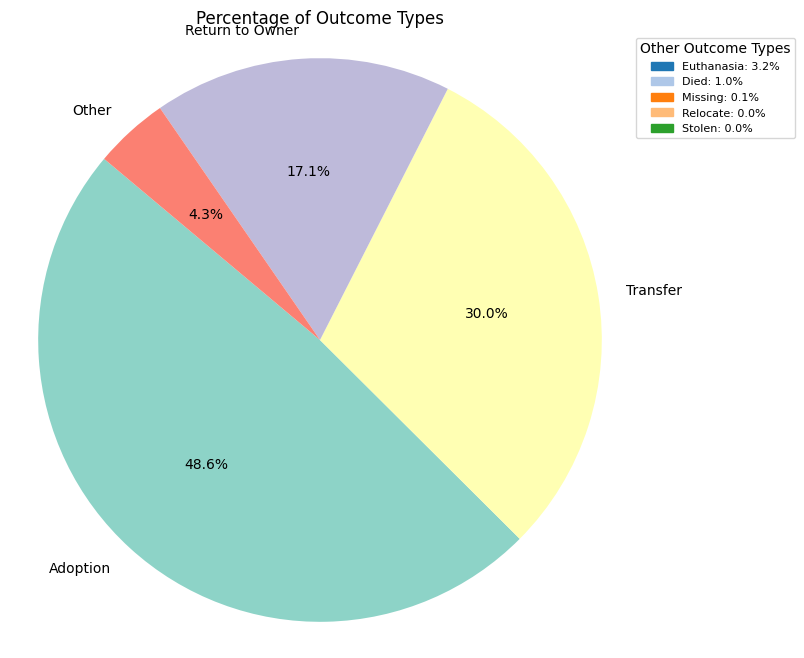

In [265]:
# calculate the percentage of each outcome type:
outcome_percentage = shelter_df['Outcome Type'].value_counts(normalize=True) * 100
# filter out values less than 5%:
threshold = 5
filtered_outcome_percentage = outcome_percentage[outcome_percentage >= threshold]
other_percentage = outcome_percentage[outcome_percentage < threshold].sum()
filtered_outcome_percentage['Other'] = other_percentage
plt.figure(figsize=(8, 8))
colors = plt.cm.Set3.colors
wedges, texts, autotexts = plt.pie(filtered_outcome_percentage, labels=filtered_outcome_percentage.index, autopct='%1.1f%%', startangle=140, colors=colors)
# create custom legend colors:
legend_colors = [mpatches.Patch(color=color) for color in plt.cm.tab20.colors]
# adding legend for small slices:
small_slice_labels = [f'{label}: {percent:.1f}%' for label, percent in zip(outcome_percentage.index, outcome_percentage) if percent < threshold]
plt.legend(legend_colors, small_slice_labels, loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8}, title='Other Outcome Types', title_fontsize='medium')
plt.title('Percentage of Outcome Types')
plt.axis('equal')
plt.show()



##### Outcome Types:
* Adopted (48.6%): The largest portion of outcomes is adoption, representing nearly half of all cases. This suggests that the shelter has been successful in finding homes for a significant portion of the animals.
* Transferred - 30%: Transfer is the second most common outcome. This might indicate that the shelter collaborates with other shelters or organisations to move animals to locations where they have a higher chance of being adopted.
* Returned to owner - 17.1%: This percentage suggests that a substantial portion of animals are reunited with their owners. This could be due to animals being lost and then found or given up temporarily by owners due to various circumstances.
* Euthanasia - 3.2%: Euthanasia represents a smaller percentage, indicating that the shelter's focus is on finding positive outcomes for animals. Euthanasia might be carried out in cases where animals are suffering, have severe health issues, or present risks to other animals or humans.
* Died - 1%: A small portion of animals pass away in the shelter. This might include animals that were brought in with severe medical conditions or injuries.
* Missing - 0.1%: The presence of these categories in the data suggests that very few animals fall into these outcomes. "Relocated" could indicate that some animals are moved to other locations, possibly for specific reasons. "Missing" might refer to animals that cannot be located within the shelter, possibly due to various administrative reasons.
* Below 0% (Relocated and Stolen): The negative percentages are due to the very low number of cases (12 and 5 cases, respectively).

##### Overall, the data indicates that the shelter is primarily focused on positive outcomes like adoption, transfer, and reuniting animals with their owners. The relatively low percentages of euthanasia and deaths highlight the shelter's commitment to animal well-being and finding appropriate solutions for each case.



#### 10.3.c. Create a plot showing overall intake counts and overall outcome counts using NumPy.

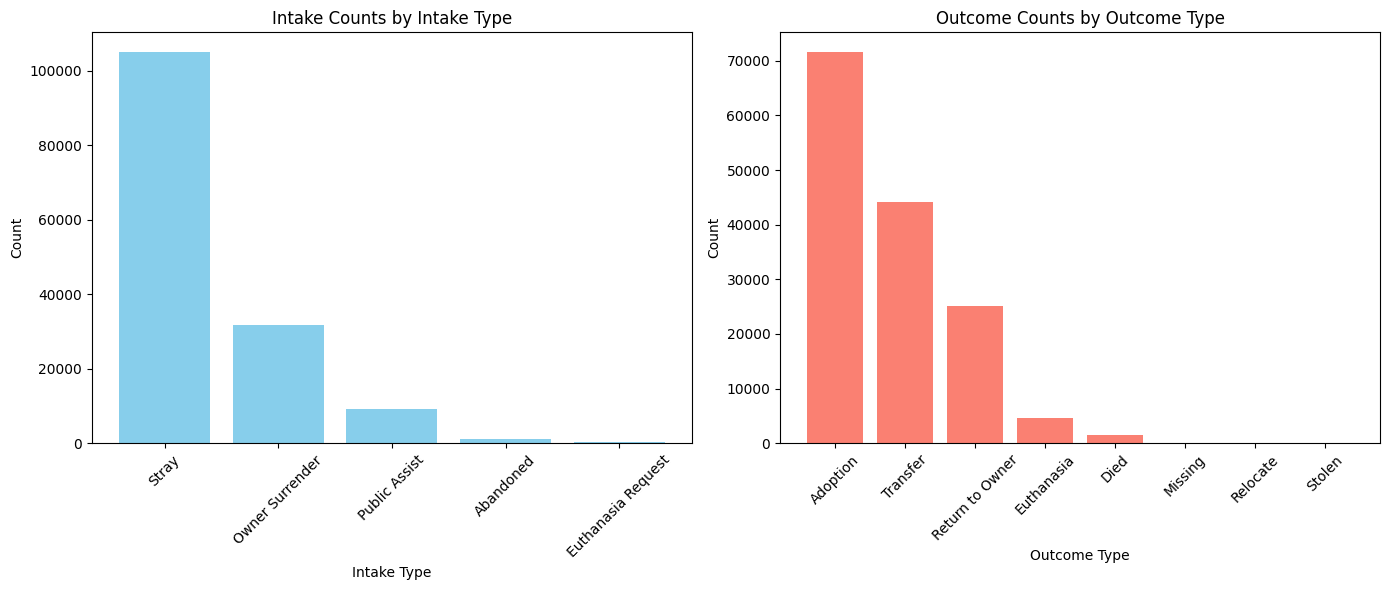

Stray Counts: 105019
Proportion of Strays: 71.33%
Adoption Counts: 71620
Proportion of Adoptions: 48.65%


In [266]:
# calculate overall intake counts using NumPy:
intake_counts = np.unique(shelter_df['Intake Type'], return_counts=True)

# calculate overall outcome counts using NumPy:
outcome_counts = np.unique(shelter_df['Outcome Type'], return_counts=True)

# find the index of ‘Stray’ in intake types
stray_index = np.where(intake_counts[0] == 'Stray')[0][0]

# find the index of ‘Adoption’ in outcome types
adoption_index = np.where(outcome_counts[0] == 'Adoption')[0][0]

# get the counts
stray_counts = intake_counts[1][stray_index]
adoption_counts = outcome_counts[1][adoption_index]

# sort intake and outcome counts in descending order
intake_sorted_indices = np.argsort(intake_counts[1])[::-1]
outcome_sorted_indices = np.argsort(outcome_counts[1])[::-1]
intake_labels = intake_counts[0][intake_sorted_indices]
intake_values = intake_counts[1][intake_sorted_indices]
outcome_labels = outcome_counts[0][outcome_sorted_indices]
outcome_values = outcome_counts[1][outcome_sorted_indices]

# create a bar plot to compare intake and outcome counts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.bar(intake_labels, intake_values, color='skyblue')
ax1.set_title('Intake Counts by Intake Type')
ax1.set_xlabel('Intake Type')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)
ax2.bar(outcome_labels, outcome_values, color='salmon')
ax2.set_title('Outcome Counts by Outcome Type')
ax2.set_xlabel('Outcome Type')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Print stray counts and its proportion compared to other outcomes
print(f'Stray Counts: {stray_counts}')
print(f'Proportion of Strays: {stray_counts / np.sum(intake_values):.2%}')

# Print adoption counts and its proportion compared to other outcomes
print(f'Adoption Counts: {adoption_counts}')
print(f'Proportion of Adoptions: {adoption_counts / np.sum(outcome_values):.2%}')


*These two bar charts are just reinforcing the data provided in the pie charts above.*

### 10.4. Identify the most common types of animals received and their intake type, then look at these same animals and their outcome types.

##### Visualising using the cross-tabulation of intake types and outcome types for cats and dogs (most common animal types) using a heatmap in Matplotlib.


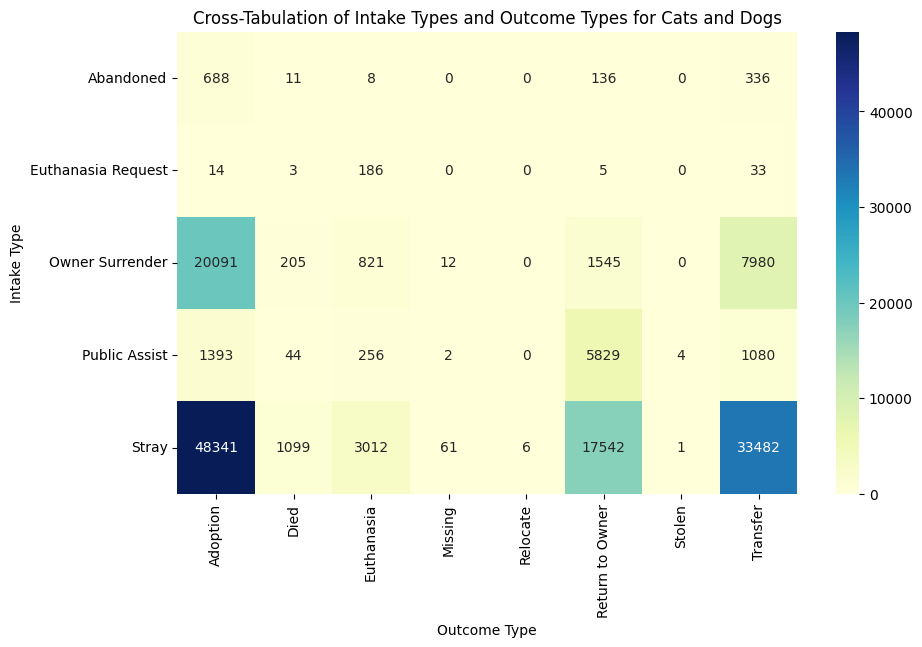

In [267]:

# Filter the DataFrame to include only cats and dogs
filtered_df = shelter_df[shelter_df['Animal'].isin(['Cat', 'Dog'])]

# Create a cross-tabulation of intake types and outcome types for cats and dogs
cross_tab = pd.crosstab(filtered_df['Intake Type'], filtered_df['Outcome Type'])

# Plot the heatmap using seaborn:
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Cross-Tabulation of Intake Types and Outcome Types for Cats and Dogs')
plt.xlabel('Outcome Type')
plt.ylabel('Intake Type')
plt.show()


*The largest groups in the ‘Adoption’ outcome category are animals from ‘stray’ and ‘owner surrender’ intake groups, the second largest outcome category is 'transfer' (with 'stray' and 'owner surrender' intake types being the largest contributors), the 3rd largest is 'return to owner' outcome.*

### 10.5. Create a chart showing the distribution of different outcomes (adoption, transfer, euthanasia, etc.) to understand the frequency of each outcome, and then subset this by animal type. Pay particular attention to adoption and how it compares to other outcomes.

#### Creating a set of pie charts to visualise the distribution of common animal types - cats and dogs - within different outcome types in the shelter data. Each pie chart represents the proportion of these animal types for a specific outcome type.

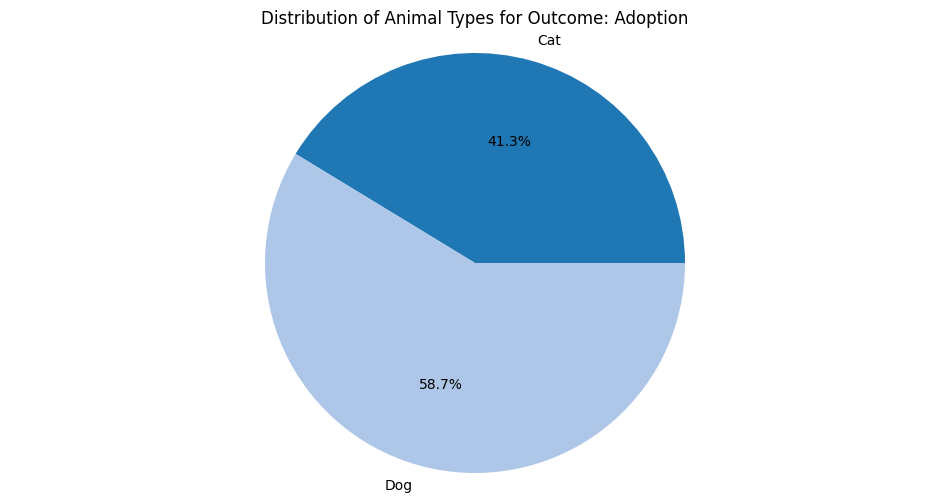

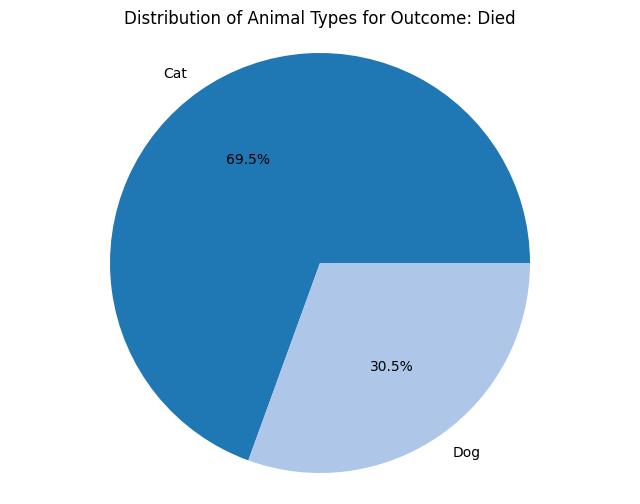

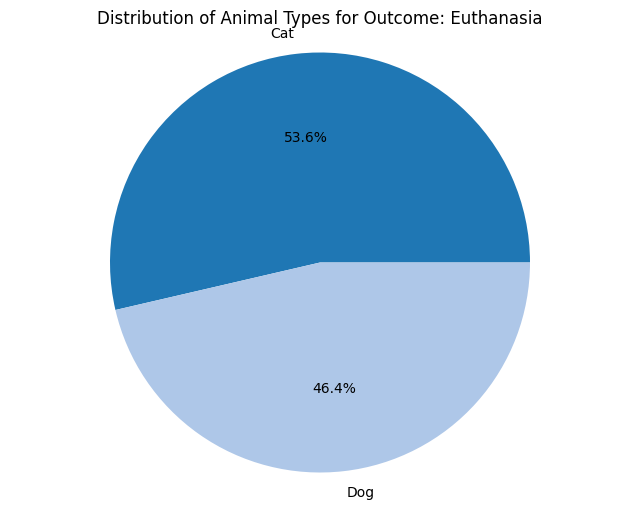

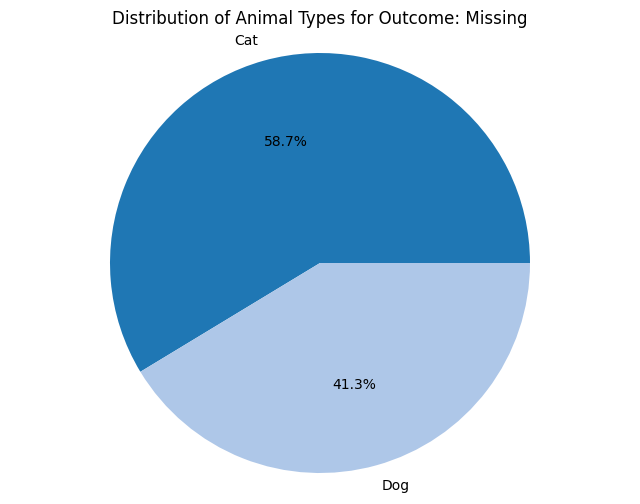

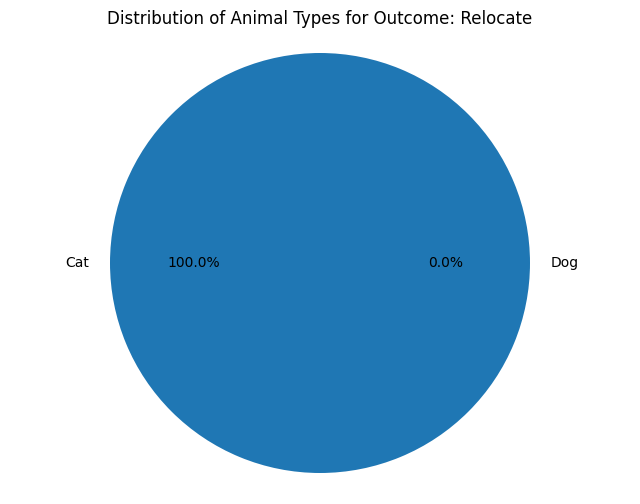

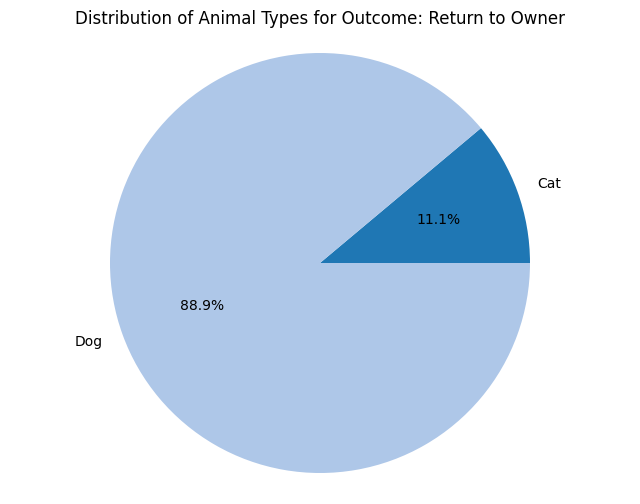

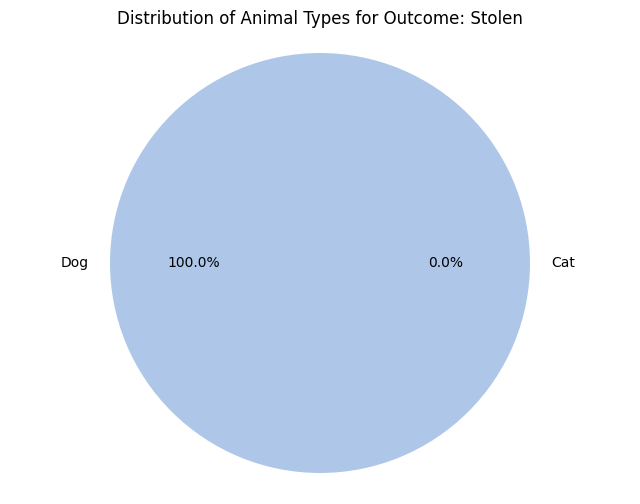

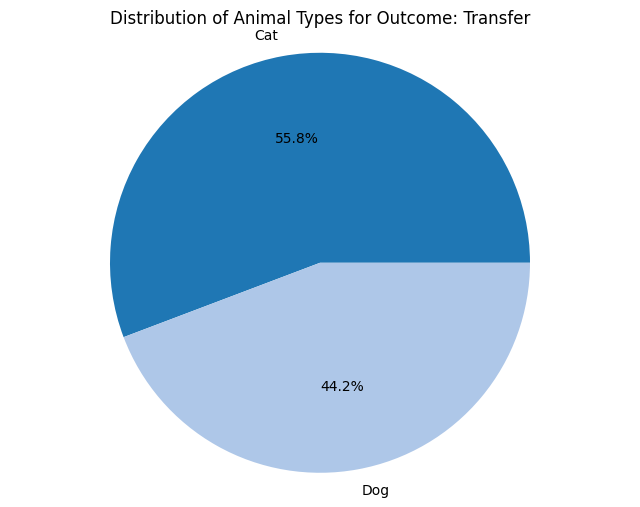

In [268]:

# Filter the DataFrame for cats and dogs only
cats_dogs_df = shelter_df[shelter_df['Animal'].isin(['Cat', 'Dog'])]

# Create a cross-tabulation of outcome types and animal types for cats and dogs
cross_tab_cats_dogs = pd.crosstab(cats_dogs_df['Outcome Type'], cats_dogs_df['Animal'])

# Plot a pie chart for each outcome type
plt.figure(figsize=(12, 6))
colors = plt.cm.tab20.colors
for index, row in cross_tab_cats_dogs.iterrows():
    plt.pie(row, labels=row.index, autopct='%1.1f%%', colors=colors)
    plt.title(f'Distribution of Animal Types for Outcome: {index}')
    plt.axis('equal')
    plt.show()


**Adoption**:
Dogs outnumber cats in the 'adopted' group.
**Died**:
Cats comprise the largest group (69.5%) among animals that have passed away at the shelter.
**Euthanasia**:
More cats are euthanized (53.6%) compared to dogs. This indicates a higher proportion of cats that are deemed unfit for adoption or facing health issues.
**Missing**:
A larger percentage of cats (59%) go missing from the shelter compared to dogs (41%). This could be due to various reasons like more outdoor cats getting lost or not being able to be tracked as easily as dogs.
**Relocation**:
An interesting observation is that 100% of animals in the 'relocation' group are cats. This suggests that the shelter might have a specific program or arrangement for relocating cats to different locations.
**Return to Owner**:
Nearly 90% of animals in the 'Return to owner' outcome group are dogs. This indicates a higher likelihood of dogs being reunited with their owners compared to cats.
**Stolen**:
Only dogs end up being stolen from the shelter.
**Transfer**:
Roughly the same number of dogs and cats are transferred from the shelter, with cats prevailing by about 10%.


##### When looking specifically at the animals that are adopted, it's observed that 58.7% are dogs, while 41.3% are cats. Overall, dogs have a higher representation in both the shelter's total population and the animals that are adopted. Cats, although comprising a significant portion of the shelter's population, have a slightly lower adoption rate compared to dogs.


### 10.6. Calculating the median age of animals (by type, most common ones) entering and leaving the shelter. Grouping animals by age (puppies, adult, senior) and analysing which age group has:\(1) the highest adoption rates\(2) the longest / shortest time in shelter\(3) the highest number of intakes

##### Calculating median age of animals by type at entering the shelter:

In [269]:
# calculating median age of animals by type at entering the shelter:

median_intake_age_by_type = shelter_df.groupby(['Animal'])['Age at Intake'].median()

median_intake_age_by_type

Animal
Bird    365 days
Cat      77 days
Dog     669 days
Other   365 days
Name: Age at Intake, dtype: timedelta64[ns]

#### 10.6.a. Creating a bar plot to visualise Age Range of animals at Intake who were Adopted:

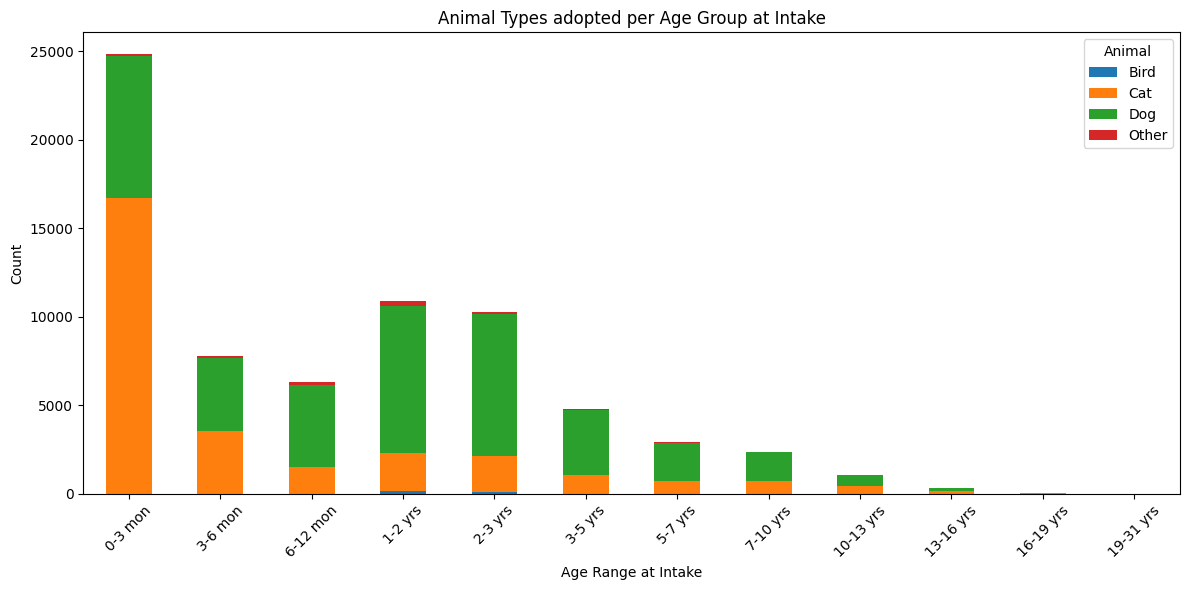

In [270]:
# ensuring 'Age Range at Intake' column is string type:
shelter_df['Animal', 'Age Range at Intake'] = shelter_df['Age Range at Intake'].astype(str)

# Filtering data for adoption:
adoptionData = shelter_df[shelter_df['Outcome Type'] == 'Adoption']

# Grouping and counting data by age range at intake and animal type:
ageAnimalAdoptIntCounts = adoptionData.groupby(['Age Range at Intake', 'Animal']).size().unstack()

# plotting a bar chart to show animal types adopted per age group:
ax = ageAnimalAdoptIntCounts.plot(kind = 'bar', stacked = True, figsize = (12, 6))
ax.set(xlabel = 'Age Range at Intake')
ax.set(ylabel = 'Count')
ax.set(title = 'Animal Types adopted per Age Group at Intake')
plt.xticks( rotation = 45)

plt.tight_layout()
plt.show()

##### Calculating median age of animals by type when leaving the shelter:

In [271]:
# calculating median age of animals by type when leaving the shelter:

median_outcome_age_by_type = shelter_df.groupby(['Animal'])['Age at Outcome'].median()

median_outcome_age_by_type

Animal
Bird     382.0
Cat      109.0
Dog      703.0
Other    368.0
Name: Age at Outcome, dtype: float64

#### 10.6.b. Creating a bar plot to visualise Age Range of animals at Intake vs Number of Intakes:

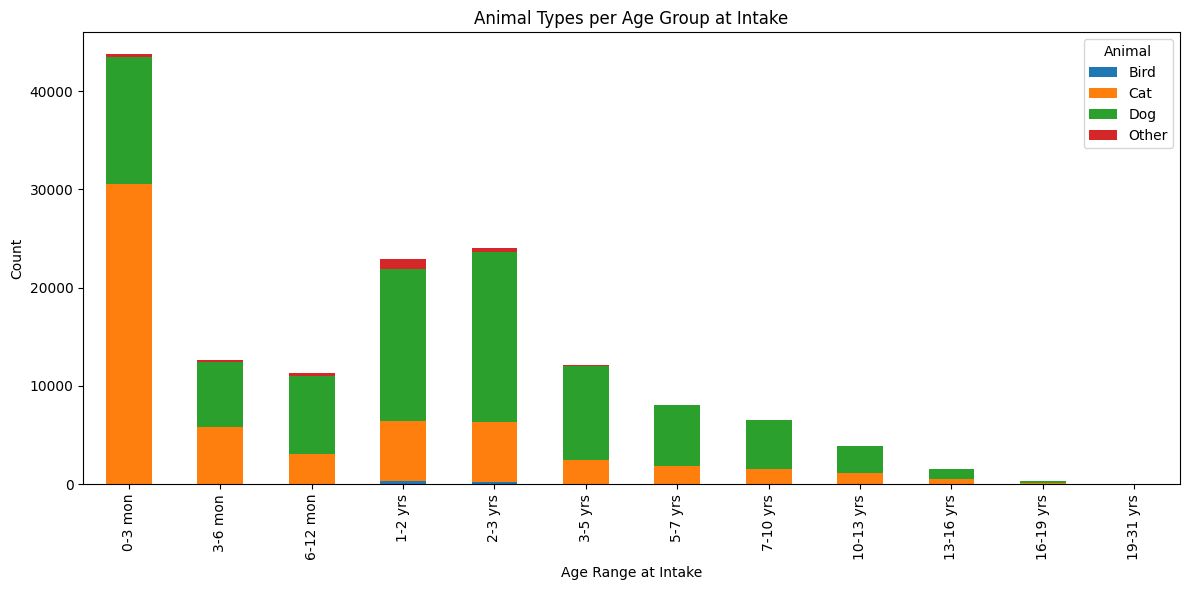

In [272]:
# ensuring 'Age Range at Intake' column is string type:
shelter_df['Animal', 'Age Range at Intake'] = shelter_df['Age Range at Intake'].astype(str)

# Grouping and counting data by Age Range at Intake and Animal type:
ageAnimalCounts = shelter_df.groupby(['Age Range at Intake', 'Animal']).size().unstack()

# plotting a bar chart to show Animal Types adopted per Age Group:
ax = ageAnimalCounts.plot(kind = 'bar', stacked = True, figsize = (12, 6))
ax.set(xlabel = 'Age Range at Intake')
ax.set(ylabel = 'Count')
ax.set(title = 'Animal Types per Age Group at Intake')
ax.legend(title = 'Animal')

plt.tight_layout()
plt.show()

##### *Kittens are the largest cat group at intake and dogs between 1 and 3 years are the largest dog group at intake.*

#### 10.6.c. Creating a bar plot to visualise Age Range of animals at Outcome who were Adopted:

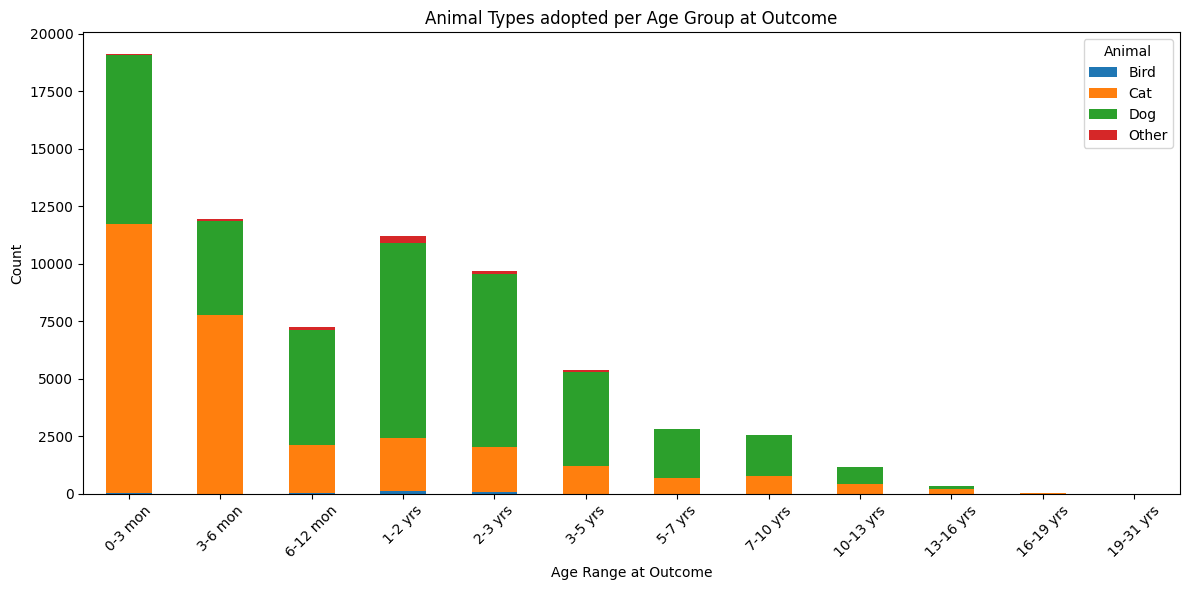

In [273]:
# ensuring 'Age Range at Outcome' column is string type:
shelter_df['Animal', 'Age Range at Outcome'] = shelter_df['Age Range at Outcome'].astype(str)

# Filtering data for adoption:
adoptionData = shelter_df[shelter_df['Outcome Type'] == 'Adoption']

# Grouping and counting data by Age Range at Intake and Animal type:
ageAnimalAdoptOutCounts = adoptionData.groupby(['Age Range at Outcome', 'Animal']).size().unstack()

# plotting a bar chart to show Animal Types adopted per Age Group:
ax = ageAnimalAdoptOutCounts.plot(kind = 'bar', stacked = True, figsize = (12, 6))
ax.set(xlabel = 'Age Range at Outcome')
ax.set(ylabel = 'Count')
ax.set(title = 'Animal Types adopted per Age Group at Outcome')
plt.xticks( rotation = 45)

plt.tight_layout()
plt.show()

##### *From the plots 10.6b and 10.6c we can conclude that kittens up to 1 year old are the largest cat group at intake to be adopted whilst dogs between 1 and 3 years at intake are the largest dog group to be adopted. Adopted dogs are the youngest outcome group aged around 2 years old, while adopted cats are the 3nd youngest outcome group (after transferred and missing cats), aged just over 1 year old on average.*

##### *This indicates that the shelter's adoption efforts are focused on finding homes for younger animals and also suggests that potential adopters have a preference for animals that have a longer potential time to spend with them, which aligns with the idea of forming a long-lasting companionship.*


#### 10.6.d. Creating a scatter plot to visualise Age Range of animals at Intake vs Time in Shelter:

In [274]:
# converting Time in Shelter (timedelta data type) to numeric (days):
shelter_df['Time In Shelter'] = shelter_df['Time In Shelter'].dt.days

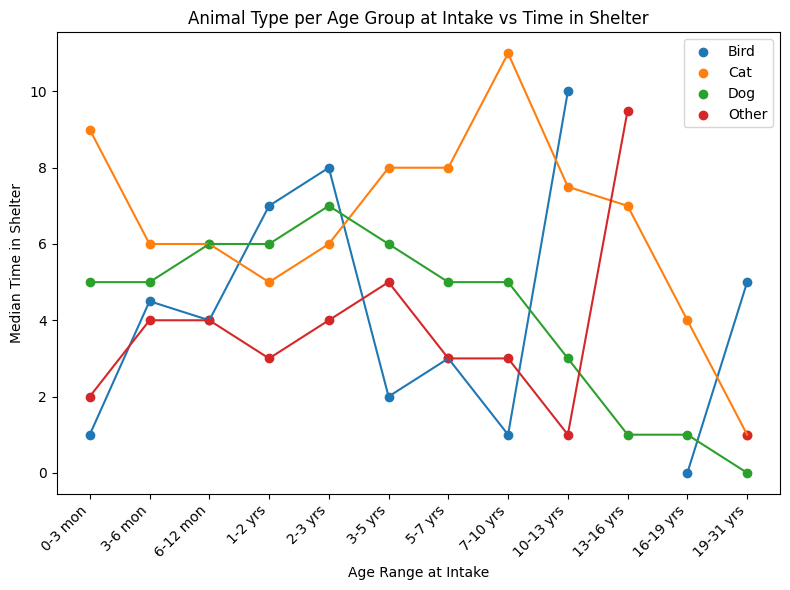

In [275]:
# ensuring 'Age Range at Intake' column is string type:
shelter_df['Animal', 'Age Range at Intake'] = shelter_df['Age Range at Intake'].astype(str)

# Grouping data and calculating median Time in Shelter by 'Age Range at Intake' and 'Animal'
ageAnimalTimeIntMedian = shelter_df.groupby(['Age Range at Intake', 'Animal'])['Time In Shelter'].median().unstack()

# Creating a scatter plot:
for Animal in ageAnimalTimeIntMedian.columns:
    plt.scatter(ageAnimalTimeIntMedian.index, ageAnimalTimeIntMedian[Animal], label = Animal)
    plt.plot(ageAnimalTimeIntMedian.index, ageAnimalTimeIntMedian[Animal])

# plotting a scatter plot to show Animal Type per Age Group at Intake vs Time in Shelter:
plt.xlabel('Age Range at Intake')
plt.ylabel('Median Time in Shelter')
plt.title('Animal Type per Age Group at Intake vs Time in Shelter')
plt.xticks(rotation = 45, ha = 'right')
plt.legend()

plt.tight_layout()
plt.show()

*On average, birds spend the most time in the shelter when their intake age is between 2 and 3 years. Dogs spend the most time in the shelter when their intake age is between 2 and 5 years on average. Cats spend the most time in the shelter on average when their intake age is between 7 to 10 years.*

#### 10.6.e. Creating a scatter plot to visualise Age Range of animals at Outcome vs Time in Shelter:

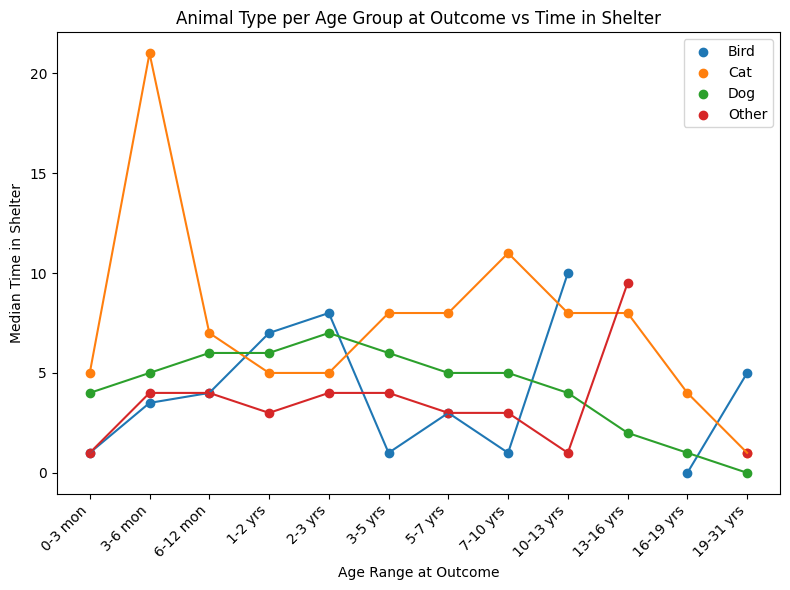

In [276]:
# ensuring 'Age Range at Outcome' column is string type:
shelter_df['Animal', 'Age Range at Outcome'] = shelter_df['Age Range at Outcome'].astype(str)

# Grouping data and calculating median Time in Shelter by 'Age Range at Outcome' and 'Animal'
ageAnimalTimeOutMedian = shelter_df.groupby(['Age Range at Outcome', 'Animal'])['Time In Shelter'].median().unstack()

# Creating a scatter plot:
for Animal in ageAnimalTimeOutMedian.columns:
    plt.scatter(ageAnimalTimeOutMedian.index, ageAnimalTimeOutMedian[Animal], label = Animal)
    plt.plot(ageAnimalTimeOutMedian.index, ageAnimalTimeOutMedian[Animal])

# plotting a scatter plot to show Animal Type per Age Group at Outcome vs Time in Shelter:
plt.xlabel('Age Range at Outcome')
plt.ylabel('Median Time in Shelter')
plt.title('Animal Type per Age Group at Outcome vs Time in Shelter')
plt.xticks(rotation = 45, ha = 'right')
plt.legend()

plt.tight_layout()
plt.show()

##### *On average, cats spend the most time in the shelter when their age at outcome is between 3 to 6 months. On average, dogs spend the most time in the shelter when their age at outcome is between 3 to 5 years.*

##### *Cats and dogs do not seem to spend much time in the shelter at a senior age which is to expected. The peak stay in the shelter appears to be at a junior age and the infants do not spend as much time in the shelter.*

### 10.7. Calculating the average, median, main and max time it takes for animals to reach adoption. Then comparing this to statistics for other outcomes (transfer, etc.). Visualising the time-to-outcome distribution using box plots. Then repeating this, subsetting based on animal type.

In [277]:
# Calculate the average, median, min and max time it takes for animals to reach an outcome (adoption, transfer, etc.):

time_outcome_by_type = shelter_df.groupby(['Outcome Type'])['Time In Shelter'].agg(['mean', 'median', 'min', 'max'])

time_outcome_by_type

mean  median  min   max
Outcome Type                                 
Adoption         33.311393    13.0    0  1913
Died             12.557302     4.0    0   434
Euthanasia       10.608947     1.0    0   999
Missing          52.265823    34.0    0   259
Relocate          3.666667     0.5    0    10
Return to Owner   4.033797     2.0    0   476
Stolen           87.600000    26.0    1   359
Transfer          9.938610     4.0    0  1352

#### 10.7.a. Plotting boxplots to see distribution of time in shelter to outcome:

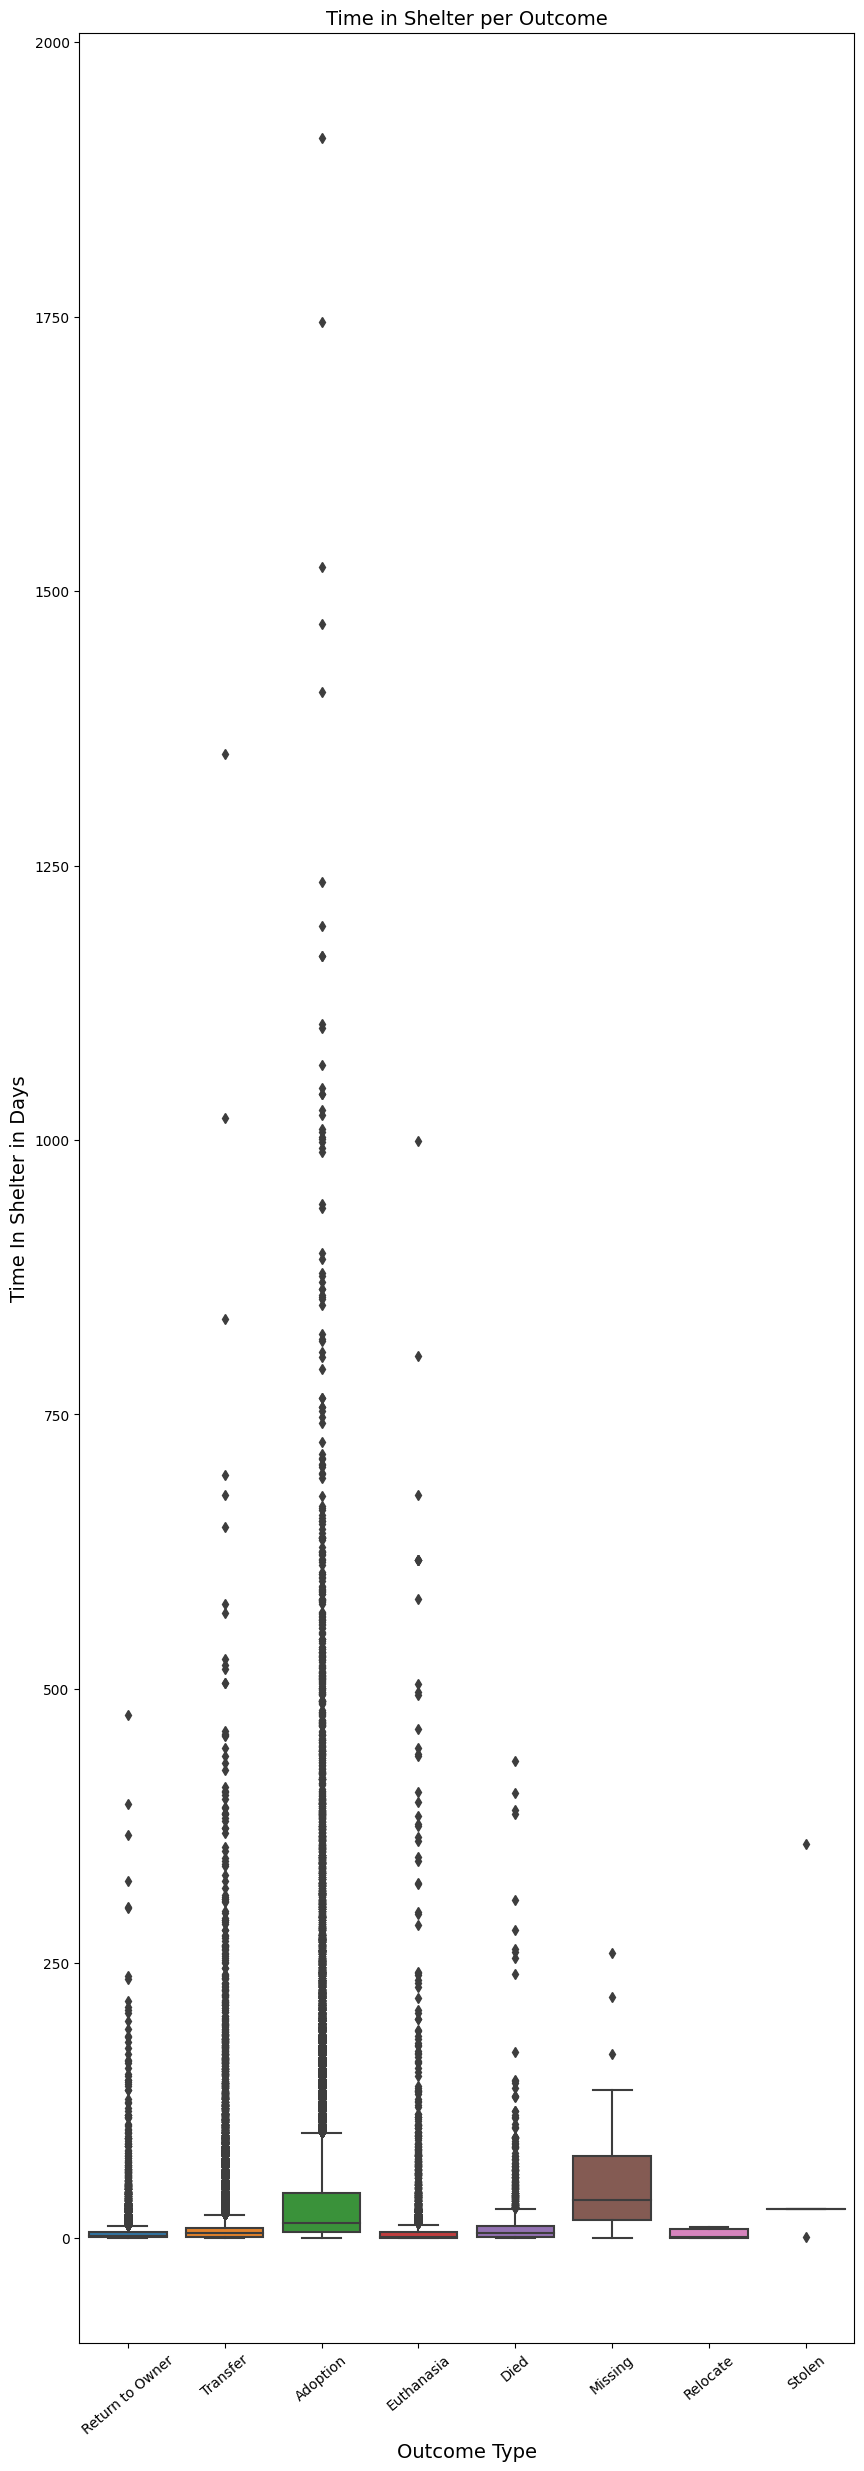

In [278]:
# Plotting boxplot:

plt.figure(figsize=(10, 30))
sns.boxplot(data=shelter_df, x='Outcome Type', y='Time In Shelter')
plt.xticks(rotation=40, fontsize = 10)
plt.yticks(rotation=0, fontsize = 10)
plt.xlabel('Outcome Type', fontsize = 14)
plt.ylabel('Time In Shelter in Days', fontsize = 14)
plt.title('Time in Shelter per Outcome', fontsize = 14)
plt.show()

##### *The bulk of adopted animals have the widest distribution in terms of time in shelter.*

#### 10.7.b. Plotting bar chart showing mean days per outcome:


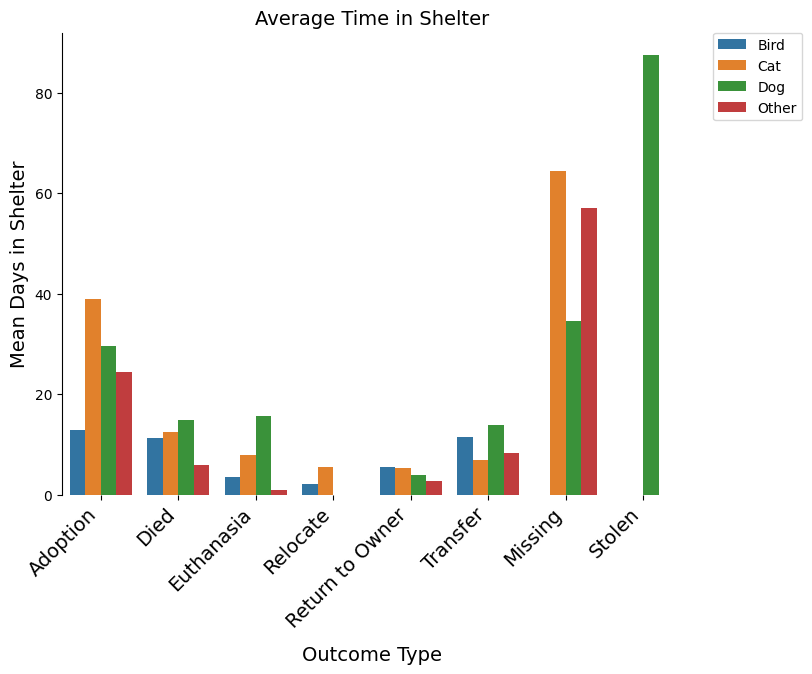

In [279]:

animal_shelter_time = shelter_df.groupby(['Animal',
                                      'Outcome Type'])['Time In Shelter'].mean().reset_index()

bar = sns.barplot(x='Outcome Type', y='Time In Shelter',
                  hue='Animal', data=animal_shelter_time)

bar.set_title('Average Time in Shelter', fontsize=14)
bar.set_ylabel('Mean Days in Shelter', fontsize=14)
bar.set_xlabel('Outcome Type', fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(), fontsize=14, rotation=90)
plt.xticks(rotation = 45, ha = 'right')
plt.yticks(size = 10)

bar.xaxis.labelpad = 10
sns.despine(bottom=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, prop={'size':10}, borderaxespad=0.)

# plt.tight_layout()
sns.despine(bottom=True)

##### *Dogs who end up being stolen from the sheter spend the most time in the shelter on average.*

#### 10.7.c. Plotting histogram for time in shelter per outcome distribution.

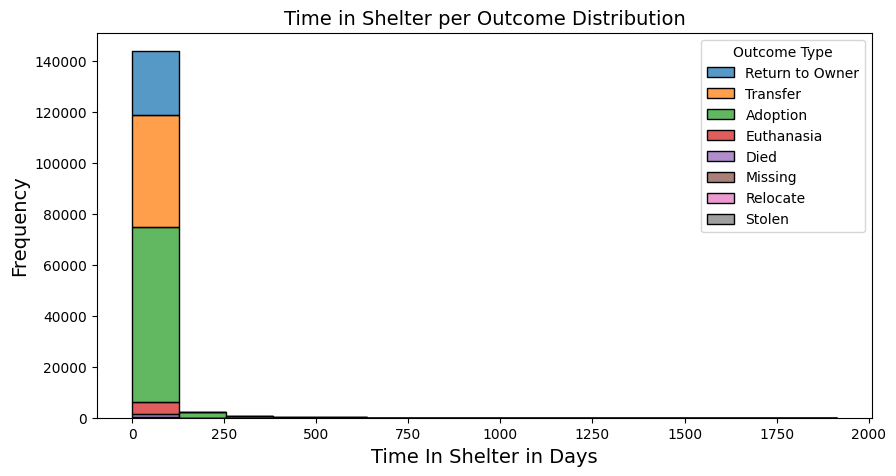

In [280]:
# Plotting histogram for time in shelter per outcome distribution:

plt.figure(figsize=(10, 5))
sns.histplot(data=shelter_df, x='Time In Shelter', hue='Outcome Type', multiple='stack', bins=15)
plt.xlabel('Time In Shelter in Days', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Time in Shelter per Outcome Distribution', fontsize = 14)

plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

##### *The vast majority of animals who have returned to their owner, adopted or transferred do not spend a long time in the shelter, mostly up to 250 days.*

### 10.8. Comparing characteristics of animals (by animal type - cats, dogs) that were adopted versus those that had other outcomes. Characteristics to look at:  
Age range  
Breed (top 10 / bottom 10 breeds adopted)  
Sex  
Neuter status  
Colour  
Intake type  
Condition at intake

#### 10.8.a. Visualise the distribution of Outcome Types for animals:

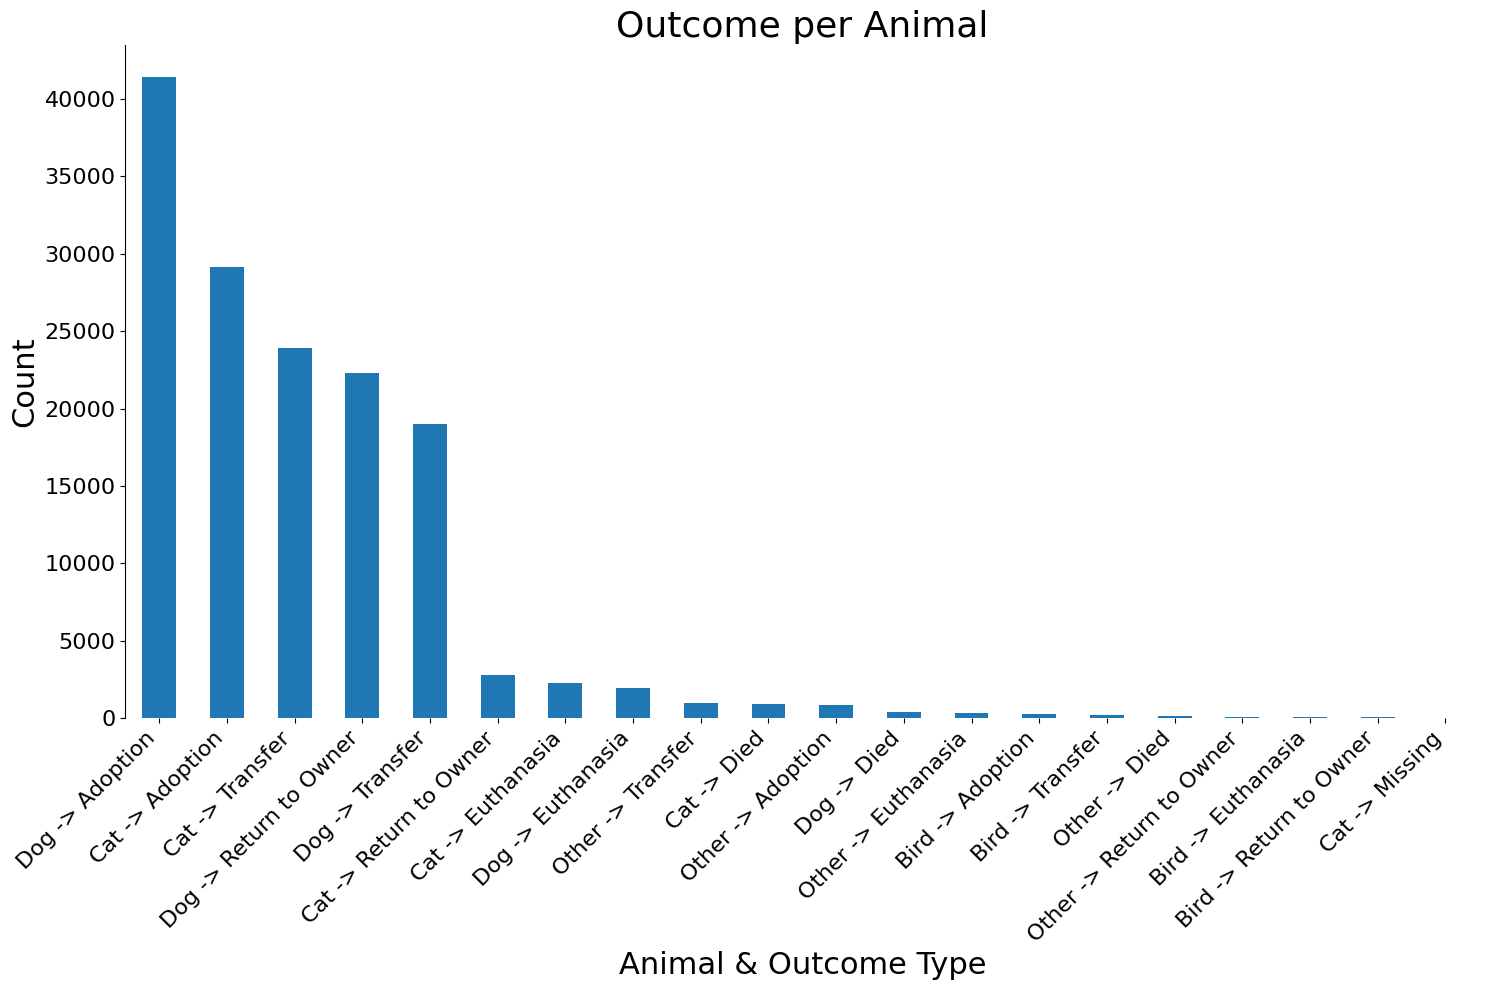

In [281]:

shelter_df['Animal Outcome'] = shelter_df['Animal'] + ' -> ' + shelter_df['Outcome Type']

intake_outcomes = shelter_df['Animal Outcome'].value_counts()[0:20].plot(kind='bar',
                                                                     fontsize=16,
                                                                     figsize=(15, 10))
intake_outcomes.set_ylabel('Count', fontsize=22)
intake_outcomes.set_xlabel('Animal & Outcome Type', fontsize=22)
intake_outcomes.set_title('Outcome per Animal', fontsize=26)
plt.xticks(rotation = 45, ha = 'right')

plt.tight_layout()
sns.despine(bottom=True)

##### *Dog-to-adoption and Cat-to-adoption make up the highest animal-to-adoption groups.*

#### 10.8.b. Create a bar plot to visualise the age of cats with outcomes.

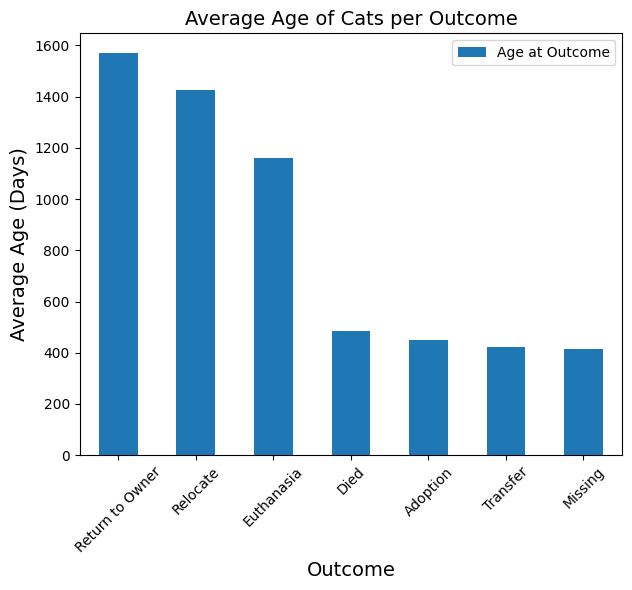

In [282]:

aveOutcomeCatsAge = catsData.groupby('Outcome Type')['Age at Outcome'].mean()
# Sort the data in descending order
aveOutcomeCatsAge = aveOutcomeCatsAge.sort_values(ascending=False)

# plotting separate bar chart for Cats:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
aveOutcomeCatsAge.plot(kind = 'bar')
plt.xlabel('Outcome', fontsize = 14)
plt.ylabel('Average Age (Days)', fontsize = 14)
plt.title('Average Age of Cats per Outcome', fontsize = 14)
plt.legend()
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 10)
plt.tight_layout()
plt.show()



*Returned to owner, relocated (both around 4 y.o.) and euthanised (around 3 y.o.) cats are the oldest cats per outcome group.*

#### 10.8.c. Creating a bar plot to visualise the age of dogs with outcomes.

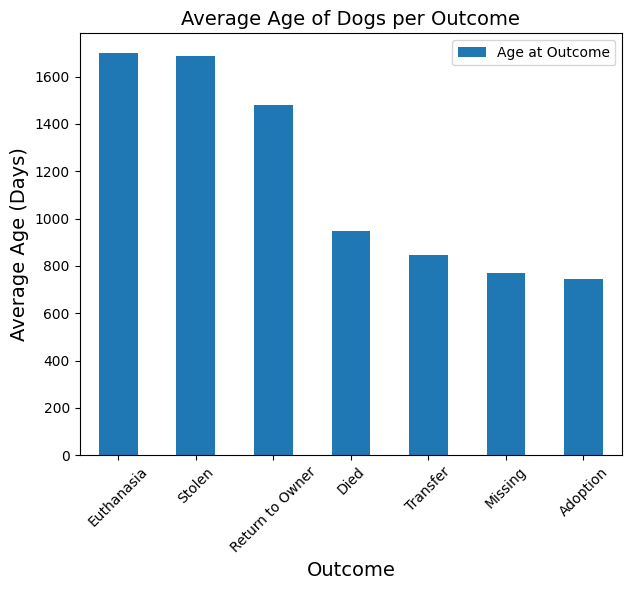

In [283]:

aveOutcomeDogsAge = dogsData.groupby('Outcome Type')['Age at Outcome'].mean()
# Sort the data in descending order
aveOutcomeDogsAge = aveOutcomeDogsAge.sort_values(ascending=False)

plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 2)
aveOutcomeDogsAge.plot(kind = 'bar')
plt.xlabel('Outcome', fontsize = 14)
plt.ylabel('Average Age (Days)', fontsize = 14)
plt.title('Average Age of Dogs per Outcome', fontsize = 14)
plt.legend()
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 10)
plt.tight_layout()
plt.show()

*Euthanised, stolen and returned to owner (all around 4 years old on average) dogs are the oldest dogs per outcome group.*

#### 10.8.d. Plotting chart for Breed of Cat per Outcome:

In [284]:
# View all Cat breed:

pd.DataFrame(shelter_df.loc[shelter_df['Animal'] == 'Cat']['Breed'].value_counts())

count
Breed                                  
Domestic Shorthair Mix            33008
Domestic Shorthair                15885
Domestic Medium Hair Mix           3286
Domestic Longhair Mix              1645
Domestic Medium Hair               1504
...                                 ...
American Curl Shorthair/Siamese       1
Scottish Fold/Domestic Shorthair      1
Balinese                              1
Ragdoll/Snowshoe                      1
Siamese/Domestic Longhair             1

[107 rows x 1 columns]

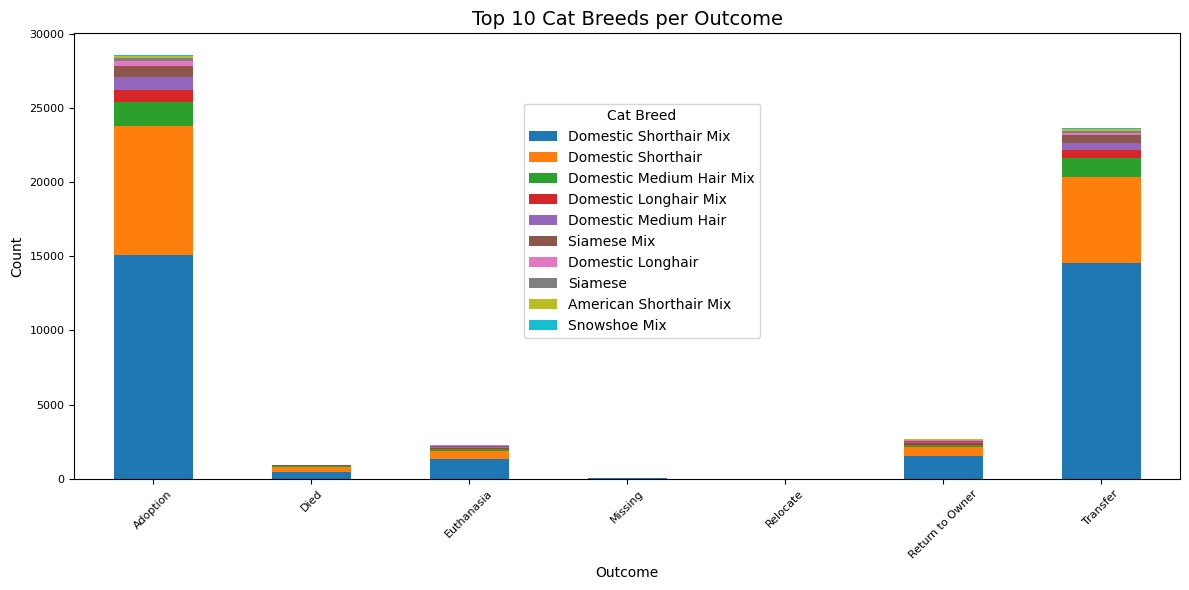

In [285]:
# separate data for Cats:
catsData = shelter_df[shelter_df['Animal'] == 'Cat']

# generate Cat and Outcome Type row value counts into a variable:
catBreedOutcomeCount = catsData.groupby(['Outcome Type', 'Breed']).size().unstack()

#to bring up the first 10 most popular breeds as there are numerous ones
catBreedTen = catBreedOutcomeCount.sum().nlargest(10).index

# filtering breed counts to calcultae top 10 breeds:
catBreedTenCount = catBreedOutcomeCount[catBreedTen]

# plot bar chart for top 10 Cat breed counts per outcome:

catBreedTenCount.plot(kind = 'bar', stacked = True, figsize = (12, 6))
plt.title('Top 10 Cat Breeds per Outcome', fontsize = 14)
plt.xlabel('Outcome', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 45, fontsize = 8) # reducing font size of x axis as there are 20 cat breeds to fit on plot
plt.yticks(fontsize = 8)
plt.legend(title = 'Cat Breed', bbox_to_anchor=(0.4,0.3))
plt.tight_layout()
plt.show()

##### *Domestic shorthair mix and domestic shorthair are the largest cat groups for adoption and transfer. However, as we can see from plot [10.2a](https://), the group sizes are very similar for the intake type.*

#### 10.8.e. Plotting chart for Breed of Dog per Outcome:

In [286]:
# View all Dog breeds:

pd.DataFrame(shelter_df.loc[shelter_df['Animal'] == 'Dog']['Breed'].value_counts())

count
Breed                                       
Pit Bull Mix                            9417
Labrador Retriever Mix                  7986
Chihuahua Shorthair Mix                 6692
German Shepherd Mix                     3696
Pit Bull                                2646
...                                      ...
Catahoula/Doberman Pinsch                  1
Norfolk Terrier/Standard Poodle            1
Dachshund Longhair/Golden Retriever        1
Treeing Walker Coonhound/Plott Hound       1
Old English Sheepdog/Miniature Poodle      1

[2527 rows x 1 columns]

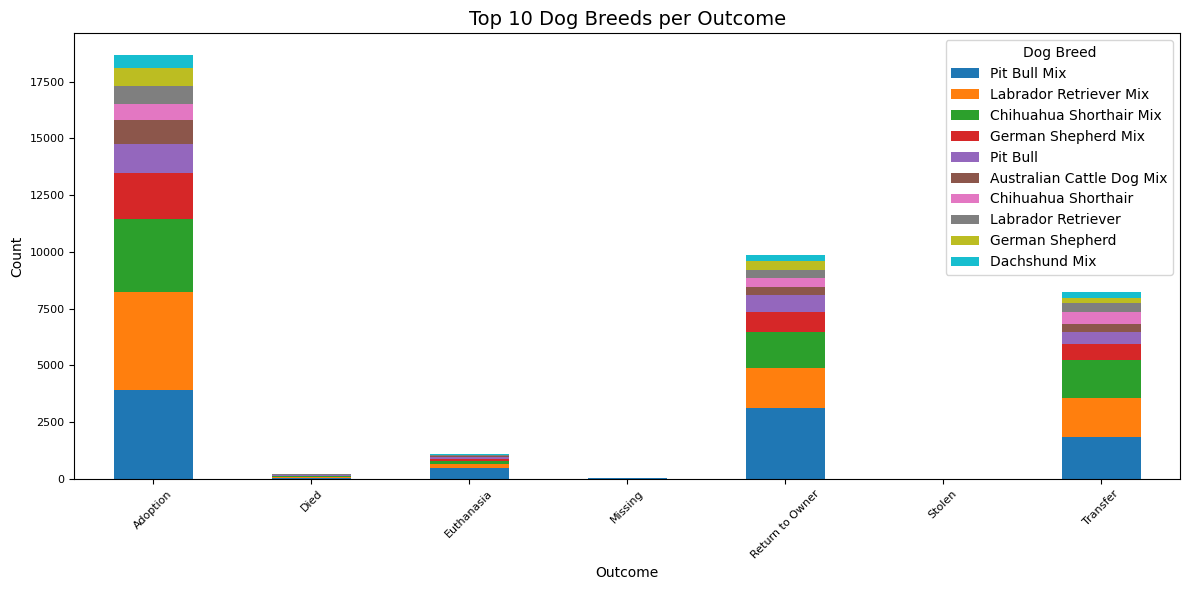

In [287]:
# separate data for Dogs:
dogsData = shelter_df[shelter_df['Animal'] == 'Dog']

# generate Dog and Outcome Type row value counts into a variable:
dogBreedOutcomeCount = dogsData.groupby(['Outcome Type', 'Breed']).size().unstack()

# to bring up the first 10 most popular breeds as there are numerous ones
dogBreedTen = dogBreedOutcomeCount.sum().nlargest(10).index

# filtering breed counts to calculate top 10 breeds:
dogBreedTenCount = dogBreedOutcomeCount[dogBreedTen]

# plot bar chart for top 10 Dog breed counts per outcome:

dogBreedTenCount.plot(kind = 'bar', stacked = True, figsize = (12, 6))
plt.title('Top 10 Dog Breeds per Outcome', fontsize = 14)
plt.xlabel('Outcome', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 45, fontsize = 8) # reducing font size of x axis as there are 10 dog breeds to fit on plot
plt.yticks(fontsize = 8)
plt.legend(title = 'Dog Breed')
plt.tight_layout()
plt.show()

##### *Pit Bull Mix, Labrador Retriever Mix and Chihuahua Shorthair Mix make up the biggest proportion of dog breeds to be adopted, returned to owner or transferred. However, again, as we can see from plot 10.2a, the group sizes are the same for the intake type.*
*This implies that the shelter is effective at placing these popular cats and dogs breeds into new homes without a significant surplus of them remaining at the shelter. It also suggests that these breeds are well-received by potential adopters.*

#### 10.8.f. Plotting chart for Sex of Cat per Outcome:

In [288]:
# View all Cat sex types:

pd.DataFrame(shelter_df.loc[shelter_df['Animal'] == 'Cat']['Sex'].value_counts())

# We can see there are only 3 categories for sex of Cats.

count
Sex           
Female   27796
Male     26973
Unknown   4363

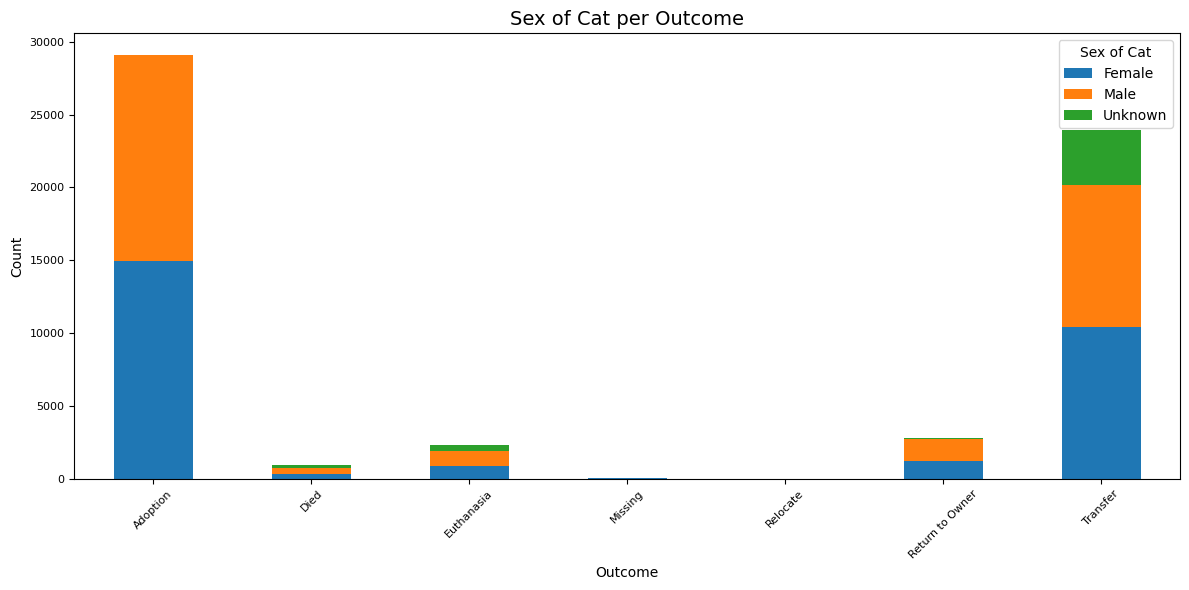

In [289]:
# separate data for Cats:
catsData = shelter_df[shelter_df['Animal'] == 'Cat']

# generate Cat and Outcome Type row value counts into a variable:
catSexOutcomeCount = catsData.groupby(['Outcome Type', 'Sex']).size().unstack()

#to bring up the first 3 sex types as there are are only 3 (male, female and unkown):
catSexType = catSexOutcomeCount.sum().nlargest(3).index

# filtering Sex type counts to calculate sexes:
catSexCount = catSexOutcomeCount[catSexType]

# plot bar chart for the three Sex type counts per outcome:

catSexCount.plot(kind = 'bar', stacked = True, figsize = (12, 6))
plt.title('Sex of Cat per Outcome', fontsize = 14)
plt.xlabel('Outcome', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 45, fontsize = 8)
plt.yticks(fontsize = 8)
plt.legend(title = 'Sex of Cat')
plt.tight_layout()
plt.show()

##### *Roughly an equal ratio of male to female cats are adopted, transferred and returned to owner.*

####10.8.g. Plotting chart for Sex of Dog per Outcome:

In [290]:
# View all Dog sex types:

pd.DataFrame(shelter_df.loc[shelter_df['Animal'] == 'Dog']['Sex'].value_counts())

# We can see there are only 3 categories for sex of Dogs.

count
Sex           
Male     45298
Female   39186
Unknown    610

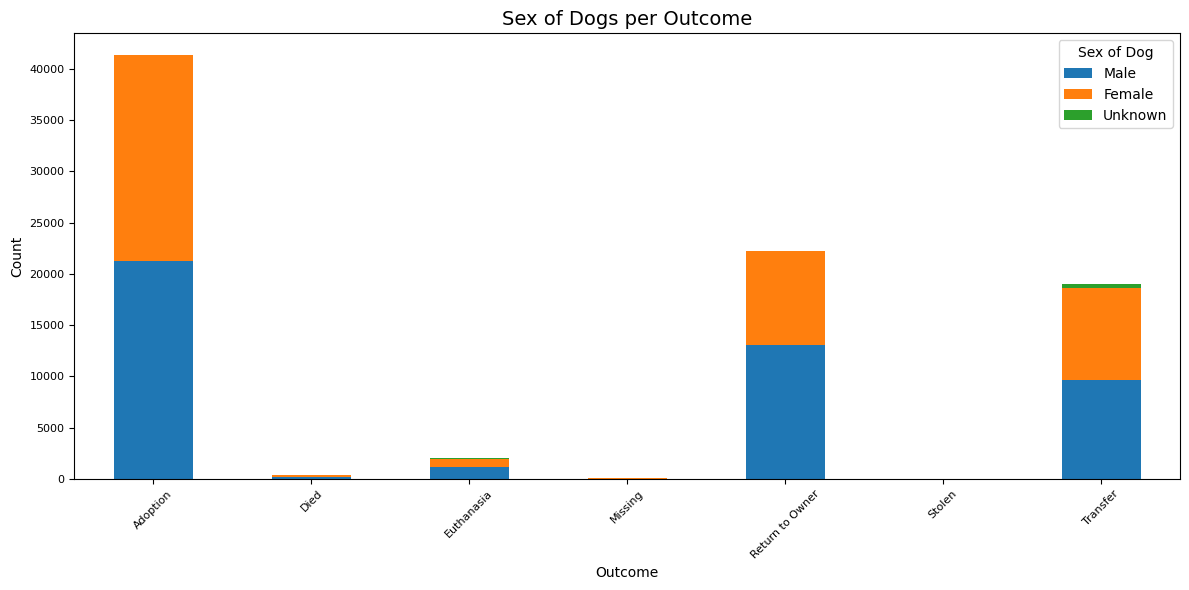

In [291]:
# separate data for Dogs:
dogsData = shelter_df[shelter_df['Animal'] == 'Dog']

# generate Dog and Outcome Type row value counts into a variable:
dogSexOutcomeCount = dogsData.groupby(['Outcome Type', 'Sex']).size().unstack()

#to bring up the first 3 sex types as there are are only 3 (male, female and unkown):
dogSexType = dogSexOutcomeCount.sum().nlargest(3).index

# filtering Sex type counts to calculate sexes:
dogSexCount = dogSexOutcomeCount[dogSexType]

# plot bar chart for the three Sex type counts per outcome:

dogSexCount.plot(kind = 'bar', stacked = True, figsize = (12, 6))
plt.title('Sex of Dogs per Outcome', fontsize = 14)
plt.xlabel('Outcome', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 45, fontsize = 8)
plt.yticks(fontsize = 8)
plt.legend(title = 'Sex of Dog')
plt.tight_layout()
plt.show()

##### *Slightly more male dogs than female dogs are adopted, returned to owner or transferred. Given that there is already a slightly higher proportion of male dogs at intake, the higher adoption rate of male dogs might not necessarily indicate a preference for male dogs. It could simply be attributed to the higher availability of male dogs at the shelter.*

#### 10.8.h. Plotting chart for Neuter Status at Outcome of Cat per Outcome:

In [292]:
# View all Cat Neuter Status at Outcome:

pd.DataFrame(shelter_df.loc[shelter_df['Animal'] == 'Cat']['Neuter Status at Outcome'].value_counts())

# we can see there are only 4 categories for Neuter Status at Outcome.

count
Neuter Status at Outcome       
Neutered                  18326
Spayed                    18271
Intact                    18172
Unknown                    4363

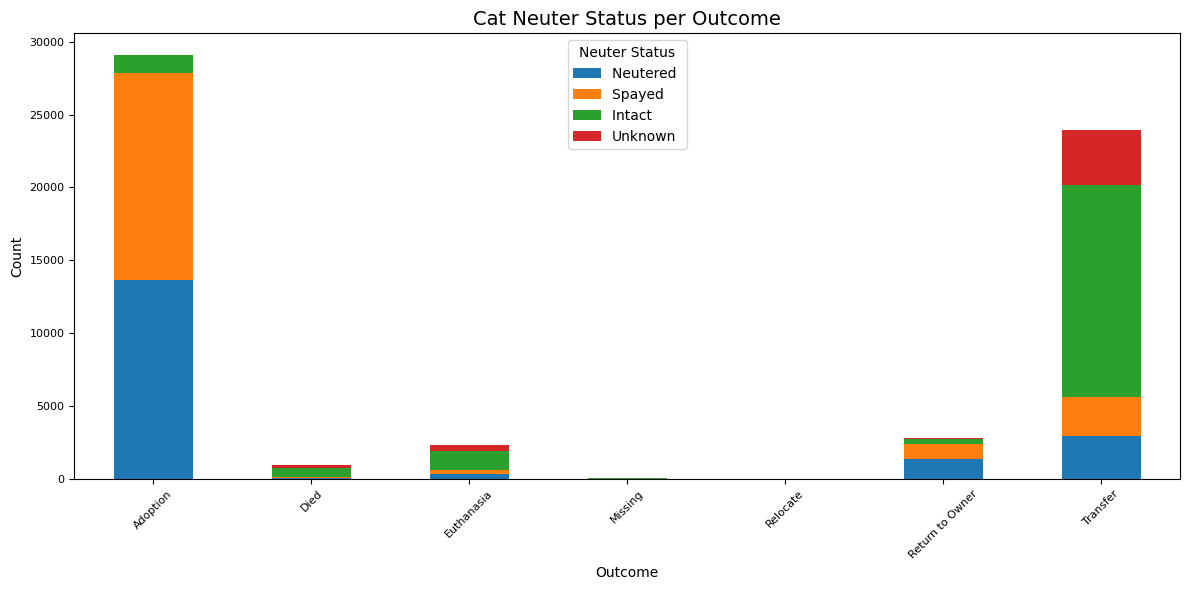

In [293]:
# separate data for Cats:
catsData = shelter_df[shelter_df['Animal'] == 'Cat']

# generate Cat and Outcome Type row value counts into a variable:
catNeuterOutcomeCount = catsData.groupby(['Outcome Type', 'Neuter Status at Outcome']).size().unstack()

#to bring up the 4 Neuter statuses:
catNeuter = catNeuterOutcomeCount.sum().nlargest(4).index

# filtering Neuter counts to calculate Neuter statuses:
catNeuterCount = catNeuterOutcomeCount[catNeuter]

# plot bar chart for the 4 Neuter statuses per outcome:

catNeuterCount.plot(kind = 'bar', stacked = True, figsize = (12, 6))
plt.title('Cat Neuter Status per Outcome', fontsize = 14)
plt.xlabel('Outcome', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 45, fontsize = 8)
plt.yticks(fontsize = 8)
plt.legend(title = 'Neuter Status', loc = 'upper center')
plt.tight_layout()
plt.show()

##### *Neutured and spayed cats make up the biggest catgroup at adoption and intact cats make up the biggest cat group at transfer.*

#### 10.8.i. Plotting chart for Neuter Status at Outcome of Dog per Outcome:

In [294]:
# View all Dog Neuter Status at Outcome:

pd.DataFrame(shelter_df.loc[shelter_df['Animal'] == 'Dog']['Neuter Status at Outcome'].value_counts())

# we can see there are only 4 categories for Neuter Status at Outcome.

count
Neuter Status at Outcome       
Neutered                  34987
Spayed                    30034
Intact                    19463
Unknown                     610

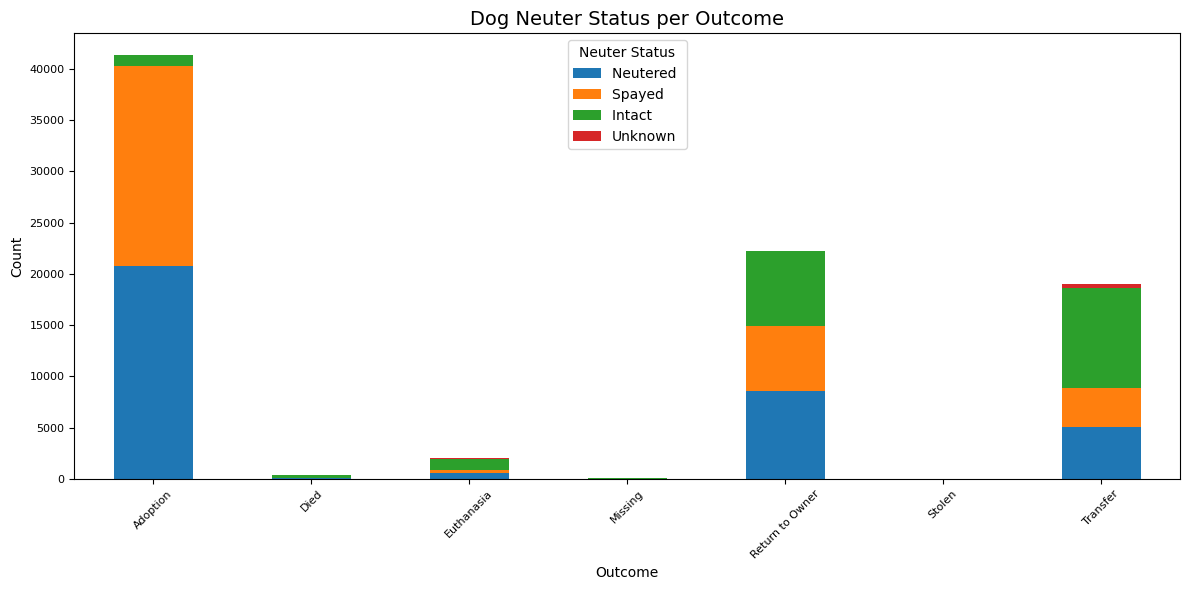

In [295]:
# separate data for Dogs:
dogsData = shelter_df[shelter_df['Animal'] == 'Dog']

# generate Dog and Outcome Type row value counts into a variable:
dogNeuterOutcomeCount = dogsData.groupby(['Outcome Type', 'Neuter Status at Outcome']).size().unstack()

#to bring up the 4 Neuter statuses:
dogNeuter = dogNeuterOutcomeCount.sum().nlargest(4).index

# filtering Neuter counts to calculate Neuter statuses:
dogNeuterCount = dogNeuterOutcomeCount[dogNeuter]

# plot bar chart for the 4 Neuter statuses per outcome:

dogNeuterCount.plot(kind = 'bar', stacked = True, figsize = (12, 6))
plt.title('Dog Neuter Status per Outcome', fontsize = 14)
plt.xlabel('Outcome', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 45, fontsize = 8)
plt.yticks(fontsize = 8)
plt.legend(title = 'Neuter Status', loc = 'upper center')
plt.tight_layout()
plt.show()

##### *Neutered and spayed cats and dogs make up the biggest group at adoption, with the ‘intact’ animals only being a small fraction of the adopted animals. Interestingly, intact animals make up the biggest group at ‘transfer’ outcome type.*
*This suggests that adopters tend to prefer animals that are already neutered or spayed, which could be due to factors such as health benefits, population control, and ease of ownership. The fact that intact animals make up the largest group when it comes to transfer might indicate that other shelters or rescue groups have more resources for neutering or spaying before adoption.*

#### 10.8.j. Plotting chart for Colour of Cat per Outcome:

In [296]:
# View all Cat Colour at Outcome:

pd.DataFrame(shelter_df.loc[shelter_df['Animal'] == 'Cat']['Colour'].value_counts())

count
Colour                  
Brown Tabby         9007
Black               7706
Black/White         5376
Brown Tabby/White   4613
Orange Tabby        4336
...                  ...
Blue Tabby/Tan         1
Calico/Gray Tabby      1
Seal Point/Cream       1
Calico Point/Gray      1
Fawn/Gray              1

[303 rows x 1 columns]

In [297]:
# we can see there are numerous categories for Colour at Outcome so we will select the top 10.

pd.DataFrame(shelter_df.loc[shelter_df['Animal'] == 'Cat']['Colour'].value_counts().head(10))

count
Colour                   
Brown Tabby          9007
Black                7706
Black/White          5376
Brown Tabby/White    4613
Orange Tabby         4336
Tortie               2741
Calico               2597
Blue Tabby           2397
Blue                 2227
Orange Tabby/White   2180

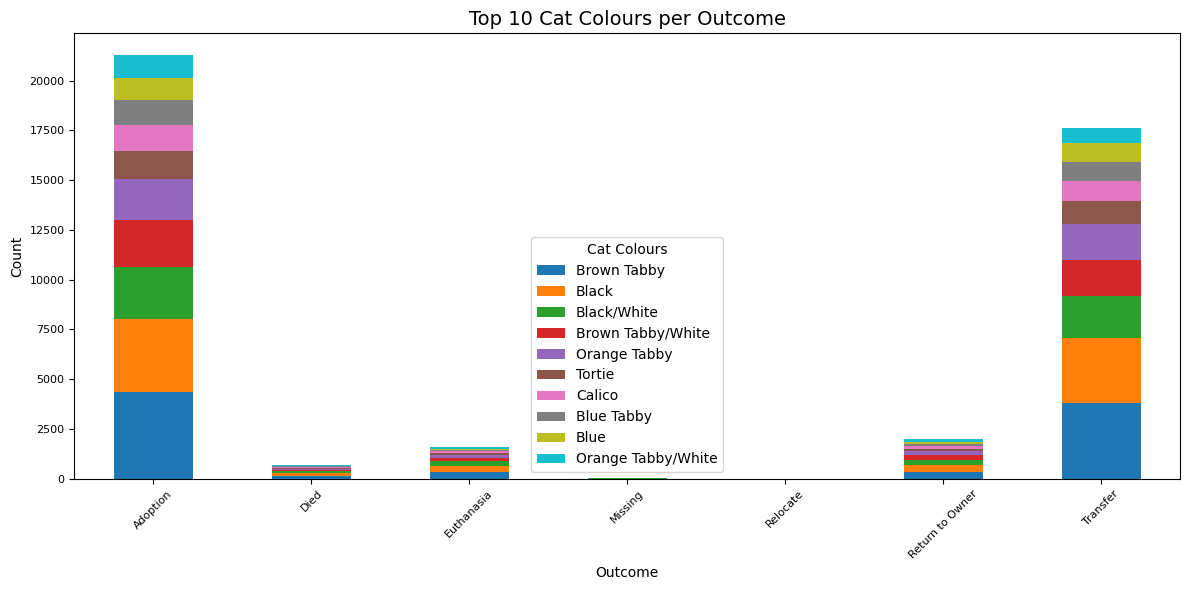

In [298]:
# separate data for Cats:
catsData = shelter_df[shelter_df['Animal'] == 'Cat']

# generate Cat and Outcome Type row value counts into a variable:
catColourOutcomeCount = catsData.groupby(['Outcome Type', 'Colour']).size().unstack()

#to bring up the top 10 colours of Cats:
catColourTen = catColourOutcomeCount.sum().nlargest(10).index

# filtering Colour counts to calculate Cat Colours:
catColourTenCount = catColourOutcomeCount[catColourTen]

# plot bar chart for the top 20 Cat colours per outcome:

catColourTenCount.plot(kind = 'bar', stacked = True, figsize = (12, 6))
plt.title('Top 10 Cat Colours per Outcome', fontsize = 14)
plt.xlabel('Outcome', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 45, fontsize = 8) # reducing font size of x axis as there are 20 cat colours to fit on plot
plt.yticks(fontsize = 8)
plt.legend(title = 'Cat Colours', loc = 'best')
plt.tight_layout()
plt.show()

##### *Brown Tabby and Black cats make up the biggest proportion of cats to be adopted or transferred, but this is in proportion to how many of them are present at intake.*

#### 10.8.k. Plotting chart for Colour of Dog per Outcome:

In [299]:
# View all Dog Colour at Outcome:

pd.DataFrame(shelter_df.loc[shelter_df['Animal'] == 'Dog']['Colour'].value_counts())

count
Colour                     
Black/White           10057
Brown/White            4867
White                  4568
Tan/White              4454
Black                  4380
...                     ...
Chocolate/Liver Tick      1
Red Tick/Brown Merle      1
Tricolor/Tricolor         1
Fawn/Chocolate            1
Cream/Orange              1

[390 rows x 1 columns]

In [300]:
# we can see there are numerous categories for Colour at Outcome so we will select the top 10.

pd.DataFrame(shelter_df.loc[shelter_df['Animal'] == 'Dog']['Colour'].value_counts().head(10))

count
Colour            
Black/White  10057
Brown/White   4867
White         4568
Tan/White     4454
Black         4380
Tan           3702
Brown         3375
Black/Tan     3307
Tricolor      3240
Black/Brown   3091

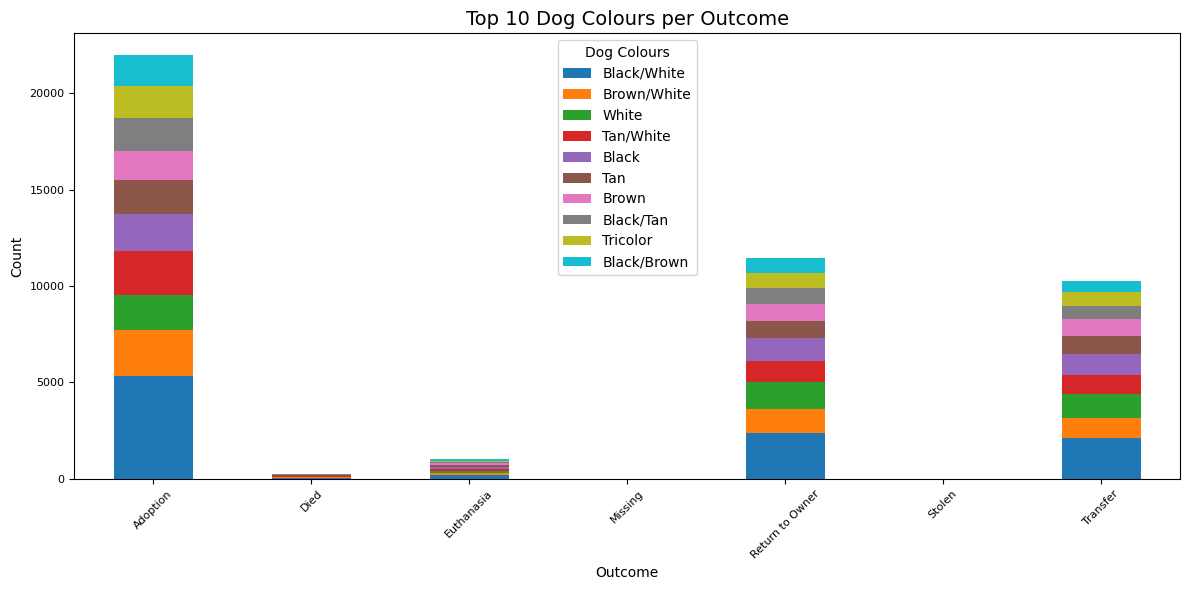

In [301]:
# separate data for Dogs:
dogsData = shelter_df[shelter_df['Animal'] == 'Dog']

# generate Dog and Outcome Type row value counts into a variable:
dogColourOutcomeCount = dogsData.groupby(['Outcome Type', 'Colour']).size().unstack()

#to bring up the top 10 colours of Dogs:
dogColourTen = dogColourOutcomeCount.sum().nlargest(10).index

# filtering Colour counts to calculate Dog Colours:
dogColourTenCount = dogColourOutcomeCount[dogColourTen]

# plot bar chart for the top 10 Dog colours per outcome:

dogColourTenCount.plot(kind = 'bar', stacked = True, figsize = (12, 6))
plt.title('Top 10 Dog Colours per Outcome', fontsize = 14)
plt.xlabel('Outcome', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 45, fontsize = 8)
plt.yticks(fontsize = 8)
plt.legend(title = 'Dog Colours', loc = 'upper center')
plt.tight_layout()
plt.show()

##### *Black/White dogs make up the biggest group of dogs for adoption, return to owner and transfer outcomes which is in proportion to how many are at intake.*

*The above finding indicates that this higher proportion is not necessarily due to a preference for these colours in adoption processes. Instead, it's likely a reflection of their prevalence at initial intake.*

#### 10.8.l. Plotting chart for Intake Type of Cat per Outcome:

In [302]:
# View all Cat Intake Type at Outcome:

pd.DataFrame(shelter_df.loc[shelter_df['Animal'] == 'Cat']['Intake Type'].value_counts())

# we can see there are only 5 categories for Intake type so we will include this in our plotting code.

count
Intake Type              
Stray               45403
Owner Surrender     11888
Public Assist        1260
Abandoned             522
Euthanasia Request     59

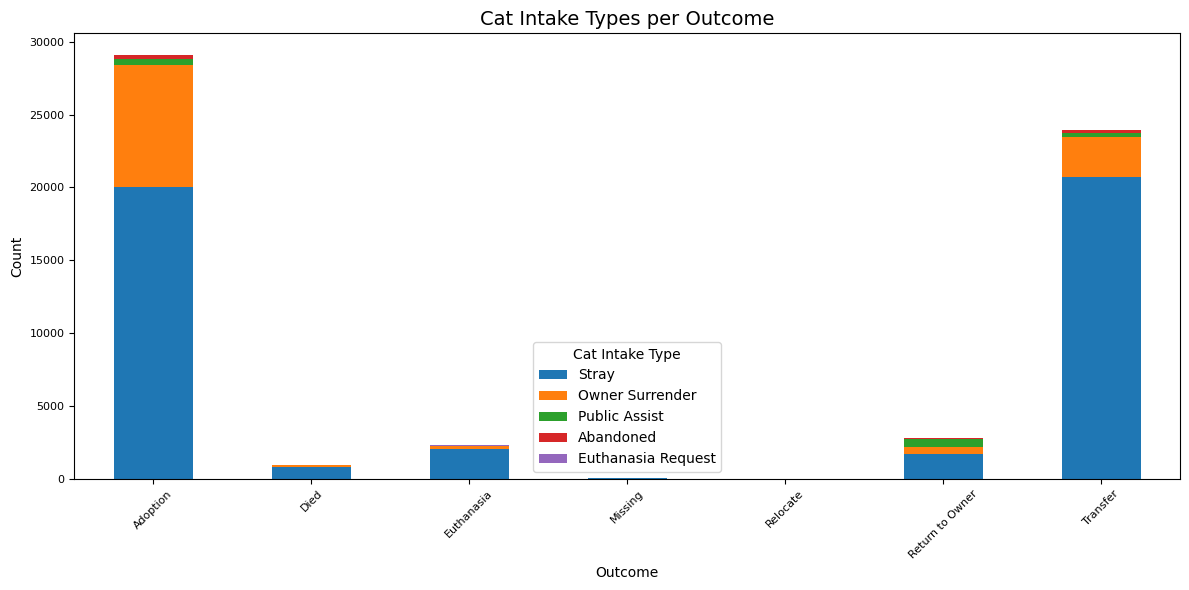

In [303]:
# separate data for Cats:
catsData = shelter_df[shelter_df['Animal'] == 'Cat']

# generate Cat and Outcome Type row value counts into a variable:
catIntakeOutcomeCount = catsData.groupby(['Outcome Type', 'Intake Type']).size().unstack()

#to bring up the top 5 Intake Types for Cats:
catIntake = catIntakeOutcomeCount.sum().nlargest(5).index

# filtering Intake Type counts to calculate Cat Intake Types:
catIntakeCount = catIntakeOutcomeCount[catIntake]

# plot bar chart for the 5 Intake Types per outcome:

catIntakeCount.plot(kind = 'bar', stacked = True, figsize = (12, 6))
plt.title('Cat Intake Types per Outcome', fontsize = 14)
plt.xlabel('Outcome', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 45, fontsize = 8)
plt.yticks(fontsize = 8)
plt.legend(title = 'Cat Intake Type', loc = 'best')
plt.tight_layout()
plt.show()

##### *Stray cats make up the biggest cat group for adoptions and transfers.*

#### 10.8.m. Plotting chart for Intake Type of Dog per Outcome:

In [304]:
# View all Dog Intake Type at Outcome:

pd.DataFrame(shelter_df.loc[shelter_df['Animal'] == 'Dog']['Intake Type'].value_counts())

# we can see there are only 6 categories for Intake type so we will include this in our plotting code.

count
Intake Type              
Stray               58141
Owner Surrender     18766
Public Assist        7348
Abandoned             657
Euthanasia Request    182

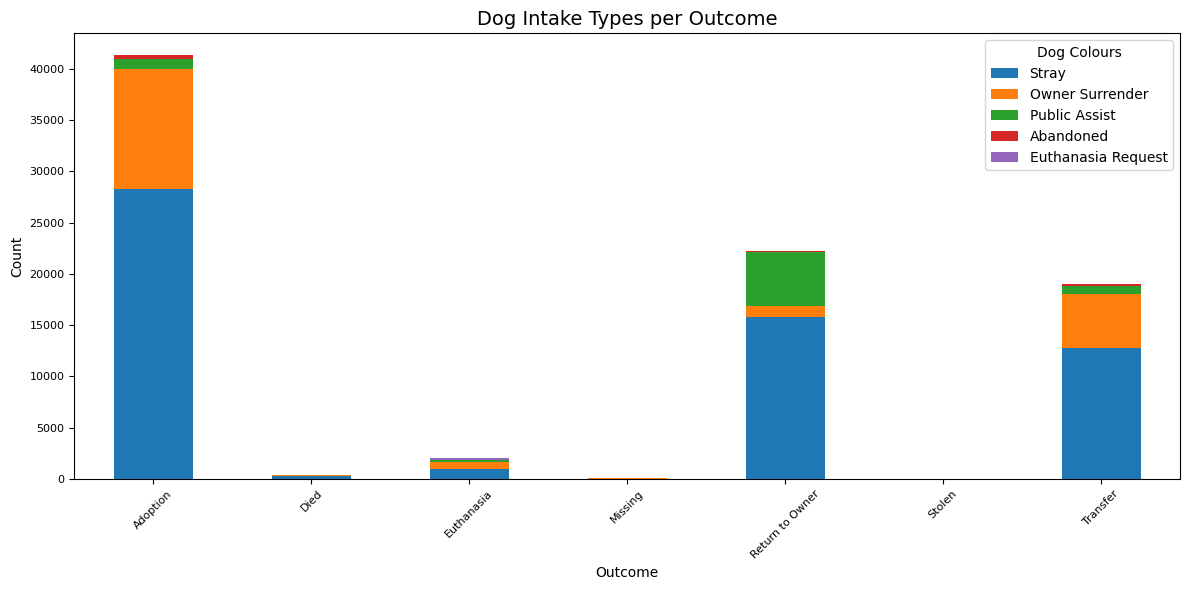

In [305]:
# separate data for Dogs:
dogsData = shelter_df[shelter_df['Animal'] == 'Dog']

# generate Dog and Outcome Type row value counts into a variable:
dogIntakeOutcomeCount = dogsData.groupby(['Outcome Type', 'Intake Type']).size().unstack()

#to bring up the top 6 Intake Types for Dogs:
dogIntake = dogIntakeOutcomeCount.sum().nlargest(6).index

# filtering Intake Type counts to calculate Dog Intake Types:
dogIntakeCount = dogIntakeOutcomeCount[dogIntake]

# plot bar chart for the 5 Intake Types per outcome:

dogIntakeCount.plot(kind = 'bar', stacked = True, figsize = (12, 6))
plt.title('Dog Intake Types per Outcome', fontsize = 14)
plt.xlabel('Outcome', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 45, fontsize = 8)
plt.yticks(fontsize = 8)
plt.legend(title = 'Dog Colours', loc = 'best')
plt.tight_layout()
plt.show()

##### *Stray dogs make up the biggest proportion of dogs for adoption, return to owner and transfer outcomes. A good proportion of owner surrender dogs make up adopted and transferred dogs.*

#### 10.8.n. Plotting chart for Intake Condition of Cat per Outcome:

In [306]:
# View all Cat Intake Conditions at Outcome:

pd.DataFrame(shelter_df.loc[shelter_df['Animal'] == 'Cat']['Intake Condition'].value_counts())

# we can see there are numerous categories for Intake type so we will focus on the top 10.

count
Intake Condition       
Normal            49135
Injured            3644
Sick               2702
Nursing            2565
Neonatal            653
Feral               123
Other               105
Medical              73
Aged                 64
Pregnant             36
Med Attn             12
Behavior              5
Space                 4
Neurologic            4
Med Urgent            4
Panleuk               1
Agonal                1
Unknown               1

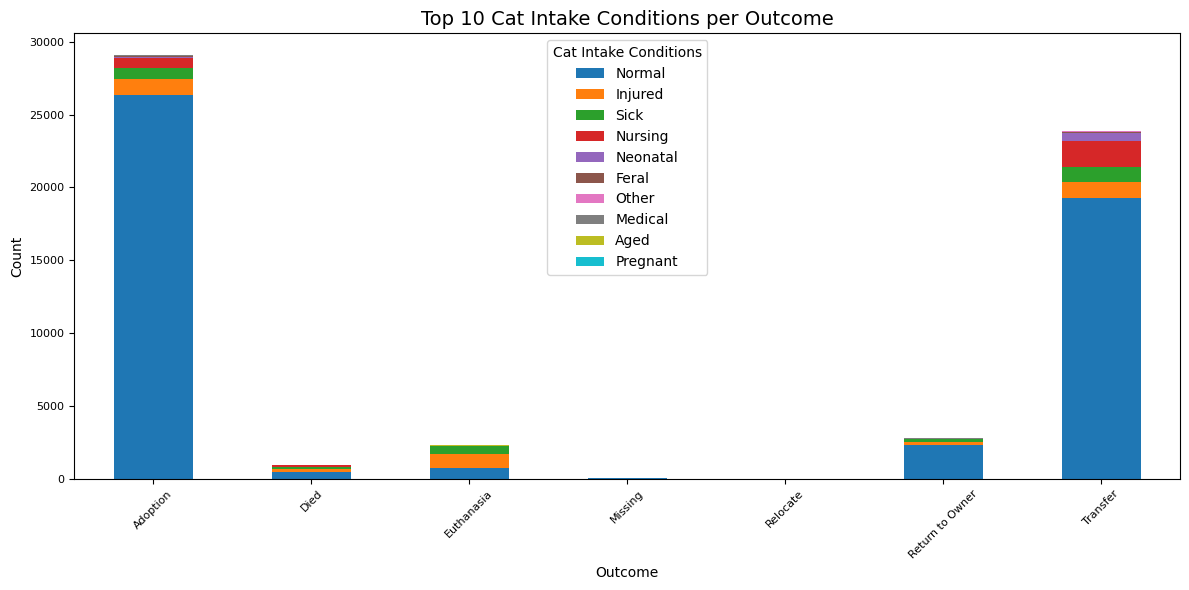

In [307]:
# separate data for Cats:
catsData = shelter_df[shelter_df['Animal'] == 'Cat']

# generate Cat and Outcome Type row value counts into a variable:
catIntakeConditionOutcomeCount = catsData.groupby(['Outcome Type', 'Intake Condition']).size().unstack()

#to bring up the top 10 Intake Conditions for Cats:
catIntakeCondition = catIntakeConditionOutcomeCount.sum().nlargest(10).index

# filtering Intake Condition counts to calculate Cat Intake Conditions:
catIntakeConditionCount = catIntakeConditionOutcomeCount[catIntakeCondition]

# plot bar chart for top 10 Intake Conditions per outcome:

catIntakeConditionCount.plot(kind = 'bar', stacked = True, figsize = (12, 6))
plt.title('Top 10 Cat Intake Conditions per Outcome', fontsize = 14)
plt.xlabel('Outcome', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 45, fontsize = 8)
plt.yticks(fontsize = 8)
plt.legend(title = 'Cat Intake Conditions', loc = 'upper center')
plt.tight_layout()
plt.show()

##### *Most cats adopted, returned to owner or transferred have a normal condition at intake.*

#### 10.8.o. Plotting chart for Intake Condition of Dog per Outcome:

In [308]:
# View all Dog Intake Conditions at Outcome:

pd.DataFrame(shelter_df.loc[shelter_df['Animal'] == 'Dog']['Intake Condition'].value_counts())

# we can see there are numerous categories for Intake type so we will focus on the top 10.

count
Intake Condition       
Normal            76269
Injured            4070
Sick               2281
Nursing            1206
Aged                415
Neonatal            279
Other               216
Medical             184
Pregnant             85
Behavior             57
Feral                10
Med Attn              7
Unknown               4
Med Urgent            3
Neurologic            3
Parvo                 3
Agonal                1
Congenital            1

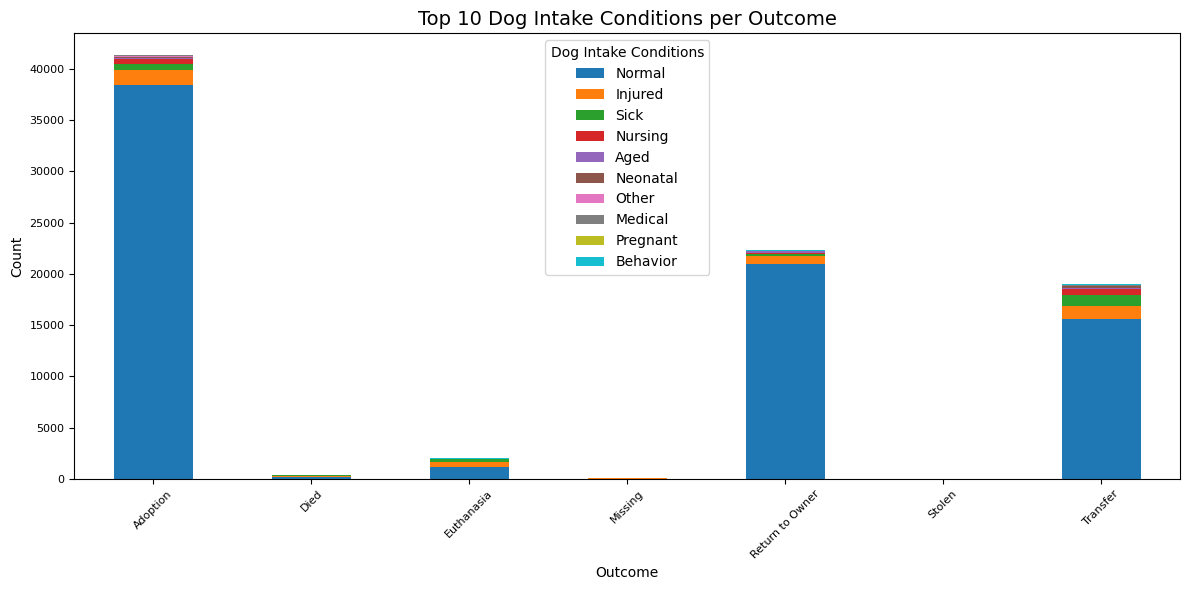

In [309]:
# separate data for Dogs:
dogsData = shelter_df[shelter_df['Animal'] == 'Dog']

# generate Dog and Outcome Type row value counts into a variable:
dogIntakeConditionOutcomeCount = dogsData.groupby(['Outcome Type', 'Intake Condition']).size().unstack()

#to bring up the top 10 Intake Conditions for Dogs:
dogIntakeCondition = dogIntakeConditionOutcomeCount.sum().nlargest(10).index

# filtering Intake Condition counts to calculate Dog Intake Conditions:
dogIntakeConditionCount = dogIntakeConditionOutcomeCount[dogIntakeCondition]

# plot bar chart for top 10 Intake Conditions per outcome:

dogIntakeConditionCount.plot(kind = 'bar', stacked = True, figsize = (12, 6))
plt.title('Top 10 Dog Intake Conditions per Outcome', fontsize = 14)
plt.xlabel('Outcome', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 45, fontsize = 8)
plt.yticks(fontsize = 8)
plt.legend(title = 'Dog Intake Conditions', loc = 'upper center')
plt.tight_layout()
plt.show()

##### *The vast majority of dogs for adoption, return to owner and transfer outcomes have a normal condition at intake.*

*The above findings imply that animals in better health are more likely to be adopted.*

## **Summary**:

### *The descriptive analysis of the provided data reveals several insights regarding adoption and various characteristics of animals at the shelter. In summary, the analysis highlights that dogs have a slightly higher adoption rate than cats, animals adopted tend to be younger, often belong to specific breeds like pit bull mix and domestic shorthair mix, have higher neuter rates, and are often from 'stray' or 'owner surrender' intake types. The preferences for young age, neutered/spayed neuter status, ‘normal’ intake condition and ‘stray’ and ‘owner surrender’ are distinct characteristics that differentiate adopted animals from those with other outcomes.*
### *These findings suggest that the shelter is successful in placing animals into homes through adoption and reuniting with owners. Collaborative efforts, such as transferring animals to different shelters, contribute to positive outcomes.*

# **11.0 Time Series Analysis**

In [310]:
# reading the clean data csv file as will use this for the time series analysis 

shelter_data = pd.read_csv('Austin_Animal_Center_clean_data.csv')

In [311]:
# checking the datatypes for each column 
shelter_data.dtypes

Unnamed: 0                   int64
Animal ID                    int64
Animal                      object
Intake Date                 object
Outcome Date                object
Time In Shelter             object
Age at Intake               object
Age Range at Intake         object
Age at Outcome              object
Age Range at Outcome        object
Intake Condition            object
Intake Type                 object
Outcome Type                object
Sex                         object
Neuter Status at Outcome    object
Breed                       object
Mixed Breed                   bool
Colour                      object
Total Touchpoints            int64
Touchpoint Count             int64
dtype: object

In [312]:
# Converting the intake and outcome data columns to datetime as in the csv file they were turned back to objects 

shelter_data['Intake Date'] = pd.to_datetime(shelter_data['Intake Date'])
shelter_data['Outcome Date'] = pd.to_datetime(shelter_data['Outcome Date'])
shelter_data[['Time In Shelter', 'Age at Intake', 'Age at Outcome']] = shelter_data[['Time In Shelter', 'Age at Intake', 'Age at Outcome']].apply(pd.to_timedelta)
shelter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147223 entries, 0 to 147222
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   Unnamed: 0                147223 non-null  int64          
 1   Animal ID                 147223 non-null  int64          
 2   Animal                    147223 non-null  object         
 3   Intake Date               147223 non-null  datetime64[ns] 
 4   Outcome Date              147223 non-null  datetime64[ns] 
 5   Time In Shelter           147223 non-null  timedelta64[ns]
 6   Age at Intake             147223 non-null  timedelta64[ns]
 7   Age Range at Intake       147223 non-null  object         
 8   Age at Outcome            147223 non-null  timedelta64[ns]
 9   Age Range at Outcome      147223 non-null  object         
 10  Intake Condition          147223 non-null  object         
 11  Intake Type               147223 non-null  object   

In [313]:
# Dropping the column unnamed as this is an uncessary column that was added when reading the data from the csv file
shelter_data.drop(columns='Unnamed: 0', inplace=True)

##### Making a copy of the data as we will need to change columns within the data, and do not want to affect the original dataset

In [314]:
# Making a copy of the data which we will use for analysis
shelter_copy = shelter_data.copy()

In [315]:
shelter_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147223 entries, 0 to 147222
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   Animal ID                 147223 non-null  int64          
 1   Animal                    147223 non-null  object         
 2   Intake Date               147223 non-null  datetime64[ns] 
 3   Outcome Date              147223 non-null  datetime64[ns] 
 4   Time In Shelter           147223 non-null  timedelta64[ns]
 5   Age at Intake             147223 non-null  timedelta64[ns]
 6   Age Range at Intake       147223 non-null  object         
 7   Age at Outcome            147223 non-null  timedelta64[ns]
 8   Age Range at Outcome      147223 non-null  object         
 9   Intake Condition          147223 non-null  object         
 10  Intake Type               147223 non-null  object         
 11  Outcome Type              147223 non-null  object   

### *11.1.i Exploring the intakes vs outcomes over the years*

In [316]:
# counting all the values for each month of the year for the intake date
intake_by_year_CS = shelter_data.resample(rule='M', origin='start', on='Intake Date')['Animal'].count()

intake_by_year_CS


Intake Date
2013-10-31    1508
2013-11-30    1255
2013-12-31    1178
2014-01-31    1213
2014-02-28    1101
              ... 
2023-04-30     989
2023-05-31    1237
2023-06-30     908
2023-07-31     632
2023-08-31     340
Freq: M, Name: Animal, Length: 119, dtype: int64

In [317]:
# counting all the values for each month of the year for the outcome date
outcome_by_year_CS = shelter_data.resample(rule='M', on='Outcome Date')['Animal'].count()
outcome_by_year_CS

Outcome Date
2013-10-31    1009
2013-11-30    1132
2013-12-31    1339
2014-01-31    1162
2014-02-28    1035
              ... 
2023-04-30     880
2023-05-31    1021
2023-06-30    1086
2023-07-31     952
2023-08-31     803
Freq: M, Name: Animal, Length: 119, dtype: int64

#### *11.1.ii Creating a line graph to show the intakes and outcomes*

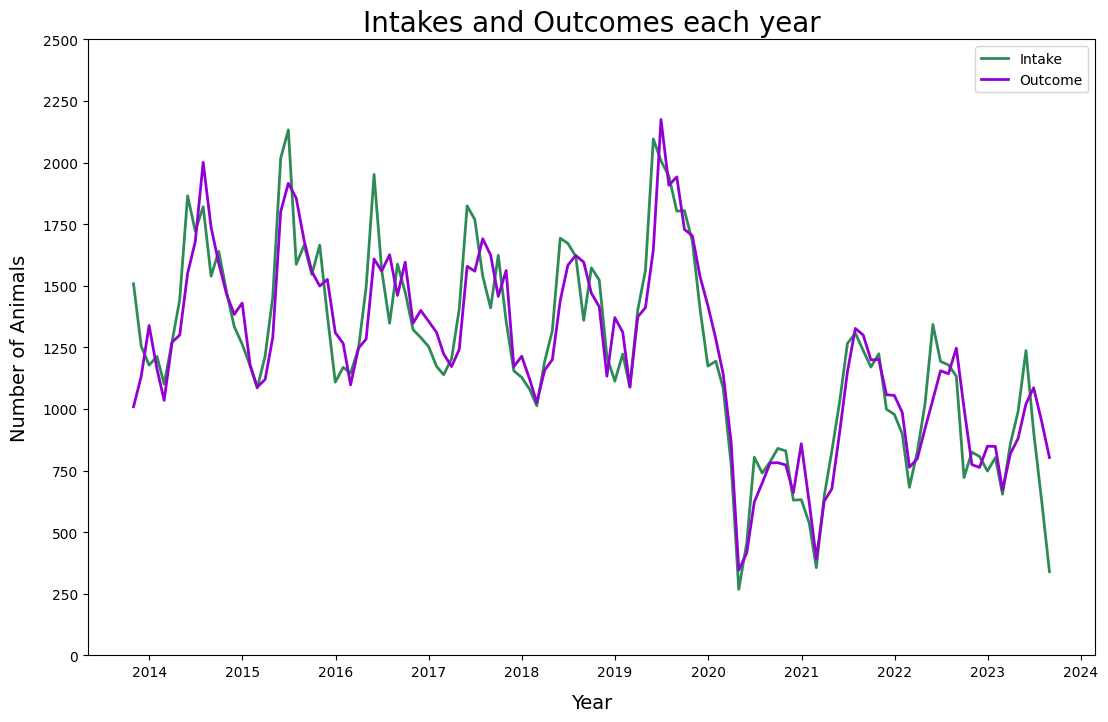

In [318]:
# Comparing intakes vs outcomes using visualisation 

plt.figure(figsize=(13,8))
# Plotting both intakes and outcomes data on the same graph
plt.plot(intake_by_year_CS, color="seagreen",label="Intake", linewidth=2)
plt.plot(outcome_by_year_CS, color="darkviolet", label="Outcome", linewidth=2)

# setting y axis values manually 
plt.yticks(np.arange(0,2750, step=250))
plt.legend(loc="best")

plt.title('Intakes and Outcomes each year', fontsize=20)
plt.xlabel('Year', labelpad=10, fontsize=14)
plt.ylabel('Number of Animals', labelpad=10, fontsize=14)

plt.show()

When the shelter started they had around 1500 intakes in a period of 3 months. Up until 2019, the intakes stayed above 1500. In 2020 there was a significant drop in the intakes which went from 2000 in 2019 to below 1000 in 2020. We know this was during covid, therefore, due to covid the shelter was having less intakes. Since 2020 the intakes have risen but have stayed below 1500. 
The outcomes from 2013 to 2019 were lower than the intakes but from 2020 we can see that there were some points where the number of outcomes overtook the intakes. 
We will look further into this by monthly intakes and outcomes to see which months the shelter had higher outcomes. 



### *11.1.iii Visualising the intakes and outcomes by month*

In [319]:
# Making another copy of the data but this one will hold the intake and outcome data in a year/month format - to allow for analysis by season
shelter_copy_year_month = shelter_data.copy()
shelter_copy_year_month['Intake Date'] = shelter_copy_year_month['Intake Date'].dt.strftime('%Y-%m')
shelter_copy_year_month['Outcome Date'] = shelter_copy_year_month['Outcome Date'].dt.strftime('%Y-%m')

In [320]:
# Isolate the months in a separate column
shelter_copy_year_month['Month_Intake'] = pd.DatetimeIndex(shelter_copy_year_month['Intake Date']).month
shelter_copy_year_month['Month_Outcome'] = pd.DatetimeIndex(shelter_copy_year_month['Outcome Date']).month
shelter_copy_year_month.head(5)

Animal ID Animal Intake Date Outcome Date Time In Shelter Age at Intake   
0     664308    Dog     2013-10      2013-10          1 days     2192 days  \
1     664293    Cat     2013-10      2013-10         11 days       37 days   
2     664292    Cat     2013-10      2013-10          1 days      304 days   
3     664291    Cat     2013-10      2013-12         76 days       30 days   
4     664290    Cat     2013-10      2013-12         68 days       30 days   

  Age Range at Intake Age at Outcome Age Range at Outcome Intake Condition   
0             5-7 yrs      2193 days              5-7 yrs           Normal  \
1             0-3 mon        48 days              0-3 mon           Normal   
2            6-12 mon       305 days             6-12 mon           Normal   
3             0-3 mon       106 days              3-6 mon           Normal   
4             0-3 mon        98 days              3-6 mon           Normal   

   ...     Outcome Type     Sex Neuter Status at Outcome   
0  ...  Return to Owner    Male                  Intact   \
1  ...         Transfer    Male                  Intact    
2  ...         Transfer  Female                  Intact    
3  ...         Adoption    Male                Neutered    
4  ...         Adoption  Female                  Spayed    

                       Breed Mixed Breed             Colour Total Touchpoints   
0  Australian Cattle Dog Mix        True           Tricolor                 2  \
1   Domestic Medium Hair Mix        True        Black/White                 1   
2     Domestic Shorthair Mix        True  Brown Tabby/White                 1   
3     Domestic Shorthair Mix        True              Black                 1   
4     Domestic Shorthair Mix        True             Tortie                 1   

   Touchpoint Count  Month_Intake  Month_Outcome  
0                 1            10             10  
1                 1            10             10  
2                 1            10             10  
3                 1            10             12  
4                 1            10             12  

[5 rows x 21 columns]

In [321]:
# counting the monthly intakes and outcome values by using grouby 
monthly_intakes = shelter_copy_year_month.groupby('Month_Intake')['Animal'].count().reset_index()
monthly_outcomes = shelter_copy_year_month.groupby('Month_Outcome')['Animal'].count().reset_index()

In [322]:
# turning the values in the series to a numpy array 
intake_months = np.array(monthly_intakes['Animal'])
outcome_months = np.array(monthly_outcomes['Animal'])

# to show the layout of the values in the intake_months (this is the same layout for outcome_months)
intake_months

array([10468,  9348, 10642, 11785, 15516, 15037, 13719, 12861, 12394,
       13408, 11469, 10576])

In [323]:
# Converting intake and outcome months to the month name using the calendar library
monthly_intakes['Month_Intake']= monthly_intakes['Month_Intake'].apply(lambda x: calendar.month_name[x])
monthly_outcomes['Month_Outcome']= monthly_outcomes['Month_Outcome'].apply(lambda x: calendar.month_name[x])
monthly_intakes

Month_Intake  Animal
0       January   10468
1      February    9348
2         March   10642
3         April   11785
4           May   15516
5          June   15037
6          July   13719
7        August   12861
8     September   12394
9       October   13408
10     November   11469
11     December   10576

### *11.1.iiii Bar chart subplots for monthly intakes and outcomes*

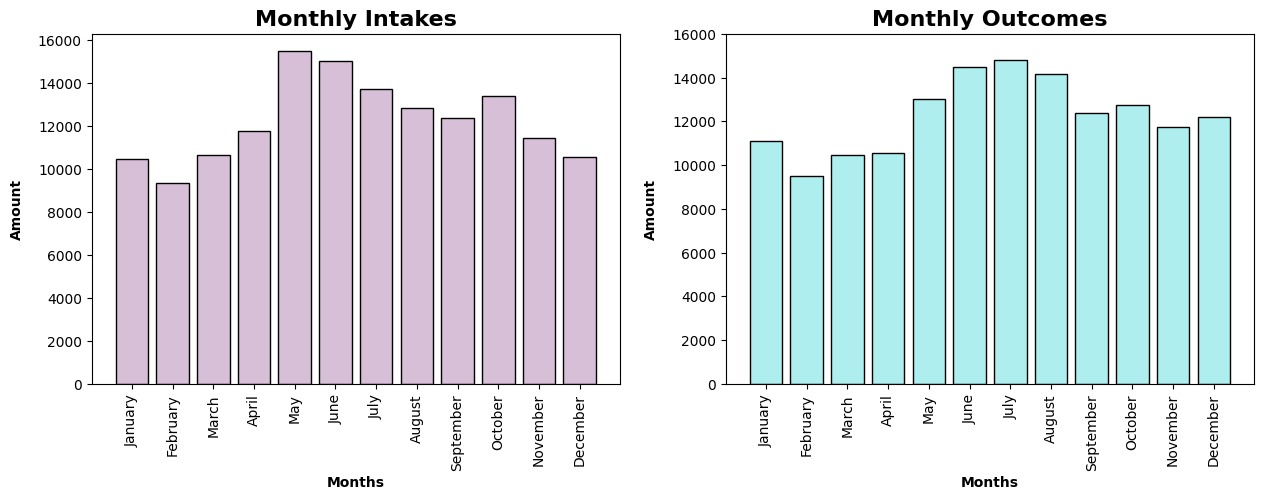

In [324]:
plt.figure(figsize=(15,10))

# creating a subplot to show both intakes and outcomes side by side for easier visulisation 
plt.subplot(2,2,1)
plt.bar(monthly_intakes['Month_Intake'], intake_months, color="thistle", edgecolor='black')

plt.title('Monthly Intakes', fontsize=16, fontweight='bold')
plt.xlabel('Months', fontweight='bold')
plt.ylabel('Amount', fontweight='bold', labelpad=10)

# setting xaxis value names to 90degrees to prevent overlap
plt.xticks(rotation=90)

# plotting the outcome graph
plt.subplot(2,2,2)
plt.bar(monthly_outcomes['Month_Outcome'], outcome_months, color="paleturquoise", edgecolor='black')

plt.title('Monthly Outcomes', fontsize=16, fontweight='bold')
plt.xlabel('Months', fontweight='bold')
plt.ylabel('Amount', fontweight='bold', labelpad=10)

plt.xticks(rotation=90)
plt.yticks(np.arange(0, 18000, step=2000))

plt.show()


As we can see, the number of intakes by the shelter does decrease during the winter months but mainly in February which has the least amount of intakes (9000 animal intakes). However, as February is the shortest month of the year, this could be another reason for the lower average intakes. The same observation can be noted for the outcomes with the least amount of outcomes occuring in February. 

In May, a significant increase in both intakes and outcomes can be noted.

## **11.2 Exploring animal adoptions and length of stay before being re-homed**

### *11.2.i Mean duration an animal stays at the shelter*

Here we will look at the mean time an animal stays in the shelter depending on their age group and type.

In [325]:
# Creating a new column which contains the days in the shelter
shelter_copy['Days in Shelter'] = shelter_copy['Time In Shelter'].dt.days

# Using for loop to loop through each row in the 'Days in Shelter' column to turn the value into an integer
for i in shelter_copy['Days in Shelter']:
    i = int(i)

# Checking that the row is now of int datatype
shelter_copy['Days in Shelter'].dtype

dtype('int64')

In [326]:
# Retrieving data only if the outcome type was adoption

animal_shelter_adopt = shelter_copy[shelter_copy['Outcome Type'] == 'Adoption']
animal_shelter_adopt

# using groupby to retrieve the animal, age range at intake and days in shelter. 
animal_shelter_time = animal_shelter_adopt.groupby(['Animal', 
                                      'Age Range at Intake'])['Days in Shelter'].mean().reset_index()

animal_shelter_time.head(5)

Animal Age Range at Intake  Days in Shelter
0   Bird             0-3 mon        10.000000
1   Bird             1-2 yrs        15.116788
2   Bird           16-19 yrs       118.500000
3   Bird             2-3 yrs         8.753247
4   Bird             3-5 yrs         2.500000

### *11.2.ii Creating a bar graph to visualise the average time animals spend in the shelter*

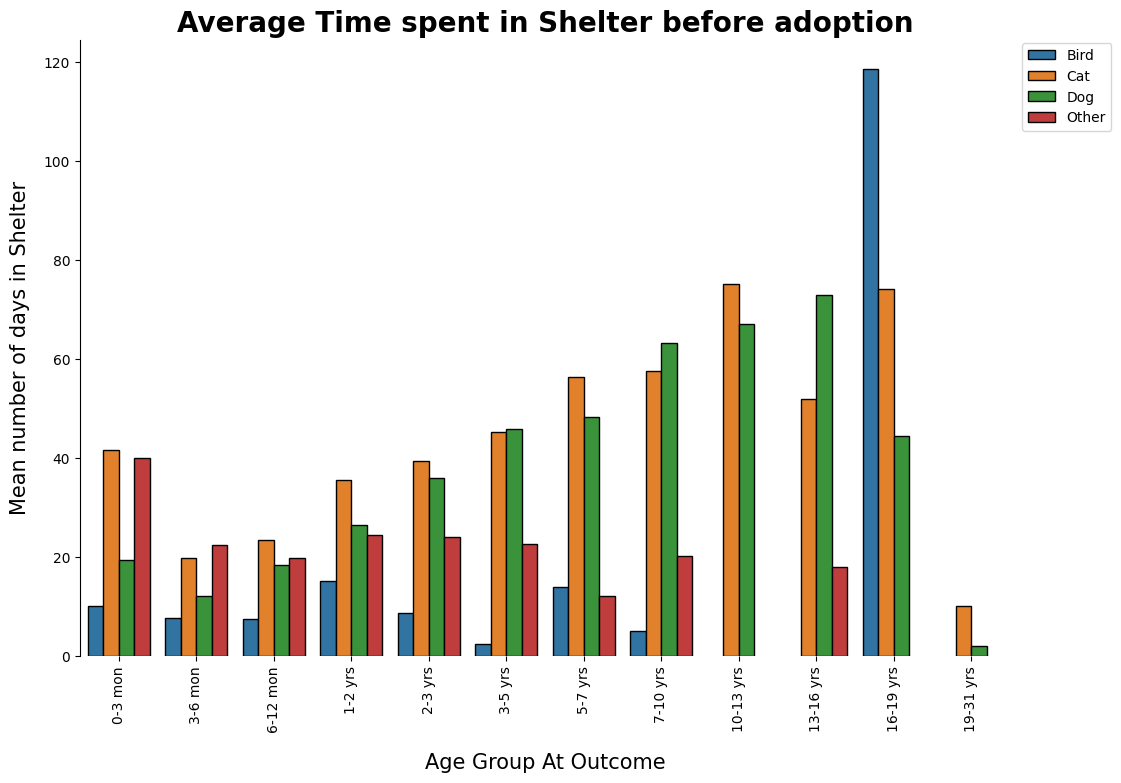

In [327]:
# Ordering the ages as this is the order we want them to appear in the graph
age_order = ['0-3 mon', '3-6 mon', '6-12 mon', '1-2 yrs', '2-3 yrs', '3-5 yrs', '5-7 yrs', '7-10 yrs', '10-13 yrs', '13-16 yrs', '16-19 yrs', '19-31 yrs']

# setting figure size 
plt.figure(figsize=(12,8))

# creating a barplot
bar = sns.barplot(x='Age Range at Intake', y='Days in Shelter', 
                  hue='Animal', data=animal_shelter_time, order=age_order, edgecolor='black')

bar.set_title('Average Time spent in Shelter before adoption', fontsize=20, fontweight='bold')
bar.set_ylabel('Mean number of days in Shelter', fontsize=15, labelpad=10)
bar.set_xlabel('Age Group At Outcome', fontsize=15, labelpad=15)

bar.set_xticklabels(bar.get_xticklabels(), rotation=90)

sns.despine(bottom=True)

plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.2)
plt.show()

Newborn kittens spend more than 40 days on average within the shelter but could be due to the kittens not being ready for adoption as they are newborn. Kittens can usually be adopted by the age of 8 - 10 weeks which means after spending 40 days in the shelter, they have a higher chance of getting adopted and by this time they are around 3 months of age. This can be seen by the average time kittens between 3 - 6 months spend in the shelter. They spend less than 20 days on average in the shelter. By this age, kittens are more active which leads to quicker adoptions. Moreover, kittens tend to be preferred over older cats as they are more energetic and the owners can build a bond with younger cats which may not be the same for older cats.
There is a steady increase in the average days cats spend in the shelter as their age increases which shows that as the cats get older, they are less likely to get adopted.

On average, dogs spend fewer days in the shelter compared to cats. Indeed, dogs between the ages of 3 to 6 months spend a little over 10 days in the shelter, whereas cats of the same age spend almost double the time. This observation could be influenced by several factors such as the longevity as well as the overall attractiveness of younger dogs. There is also an increase in the number of days dogs spend in the shelter as their age increases but this is still less when compared to cats. 

Nevertheless, we can say that as the animals get older, they tend to spend more time in the shelter. This can lead to the animals being at risk of behavioural problems especially for dogs which can lead to a decrease in adoption rates for the older animals. 



## **11.3 Exploring the time of year animals are mostly adopted**

### *11.3a Checking seasonal trends*

In [328]:
# Define a dictionary mapping for the different seasons and use apply to add the corresponding season
season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'Spring', 
               4: 'Spring',
               5: 'Spring',
               6: 'Summer',
               7: 'Summer',
               8: 'Summer',
               9: 'Fall',
               10: 'Fall',
               11: 'Fall',
               12: 'Winter'}

shelter_copy_year_month['Season_intake'] = shelter_copy_year_month['Month_Intake'].apply(lambda x: season_dict[x])
shelter_copy_year_month['Season_outcome'] = shelter_copy_year_month['Month_Outcome'].apply(lambda x: season_dict[x])

shelter_copy_year_month.head(5)

Animal ID Animal Intake Date Outcome Date Time In Shelter Age at Intake   
0     664308    Dog     2013-10      2013-10          1 days     2192 days  \
1     664293    Cat     2013-10      2013-10         11 days       37 days   
2     664292    Cat     2013-10      2013-10          1 days      304 days   
3     664291    Cat     2013-10      2013-12         76 days       30 days   
4     664290    Cat     2013-10      2013-12         68 days       30 days   

  Age Range at Intake Age at Outcome Age Range at Outcome Intake Condition   
0             5-7 yrs      2193 days              5-7 yrs           Normal  \
1             0-3 mon        48 days              0-3 mon           Normal   
2            6-12 mon       305 days             6-12 mon           Normal   
3             0-3 mon       106 days              3-6 mon           Normal   
4             0-3 mon        98 days              3-6 mon           Normal   

   ... Neuter Status at Outcome                      Breed Mixed Breed   
0  ...                  Intact   Australian Cattle Dog Mix        True  \
1  ...                  Intact    Domestic Medium Hair Mix        True   
2  ...                  Intact      Domestic Shorthair Mix        True   
3  ...                Neutered      Domestic Shorthair Mix        True   
4  ...                  Spayed      Domestic Shorthair Mix        True   

              Colour Total Touchpoints  Touchpoint Count Month_Intake   
0           Tricolor                 2                 1           10  \
1        Black/White                 1                 1           10   
2  Brown Tabby/White                 1                 1           10   
3              Black                 1                 1           10   
4             Tortie                 1                 1           10   

   Month_Outcome  Season_intake  Season_outcome  
0             10           Fall            Fall  
1             10           Fall            Fall  
2             10           Fall            Fall  
3             12           Fall          Winter  
4             12           Fall          Winter  

[5 rows x 23 columns]

In [329]:
# Ordering how we want the season values to show 
season_order= ['Spring', 'Summer', 'Fall', 'Winter']

# grouping by the outcome type per season
outcomes_by_season_df = shelter_copy_year_month.groupby(['Outcome Type', 'Season_outcome'])['Animal'].count().reset_index()
outcomes_by_season_df = outcomes_by_season_df.sort_values(by='Animal', ascending=False).head(16)

# setting index to season_outcome
outcomes_by_season_df = outcomes_by_season_df.set_index('Season_outcome')

outcomes_by_season_df

Outcome Type  Animal
Season_outcome                         
Summer                 Adoption   22208
Fall                   Adoption   17634
Winter                 Adoption   17366
Spring                 Adoption   14412
Summer                 Transfer   13633
Fall                   Transfer   11403
Spring                 Transfer   11232
Winter                 Transfer    7860
Spring          Return to Owner    6730
Winter          Return to Owner    6401
Fall            Return to Owner    6365
Summer          Return to Owner    5684
Summer               Euthanasia    1352
Spring               Euthanasia    1236
Fall                 Euthanasia    1140
Winter               Euthanasia     944

In [330]:
# setting the index for each outcome type to ensure it is the correct order
# storing the correct order of the seasons in a variable 
seasons = ['Spring', 'Summer', 'Fall', 'Winter']

# using reindex to order the seasons as inputted in the variable above
outcome_1 = outcomes_by_season_df[outcomes_by_season_df['Outcome Type'] == 'Adoption'].reindex(index = seasons)
outcome_2 = outcomes_by_season_df[outcomes_by_season_df['Outcome Type'] == 'Transfer'].reindex(index = seasons)
outcome_3 = outcomes_by_season_df[outcomes_by_season_df['Outcome Type'] == 'Return to Owner'].reindex(index = seasons)
outcome_4 = outcomes_by_season_df[outcomes_by_season_df['Outcome Type'] == 'Euthanasia'].reindex(index = seasons)


### *11.3.b Plotting bar graph to show the top 4 outcomes by season*

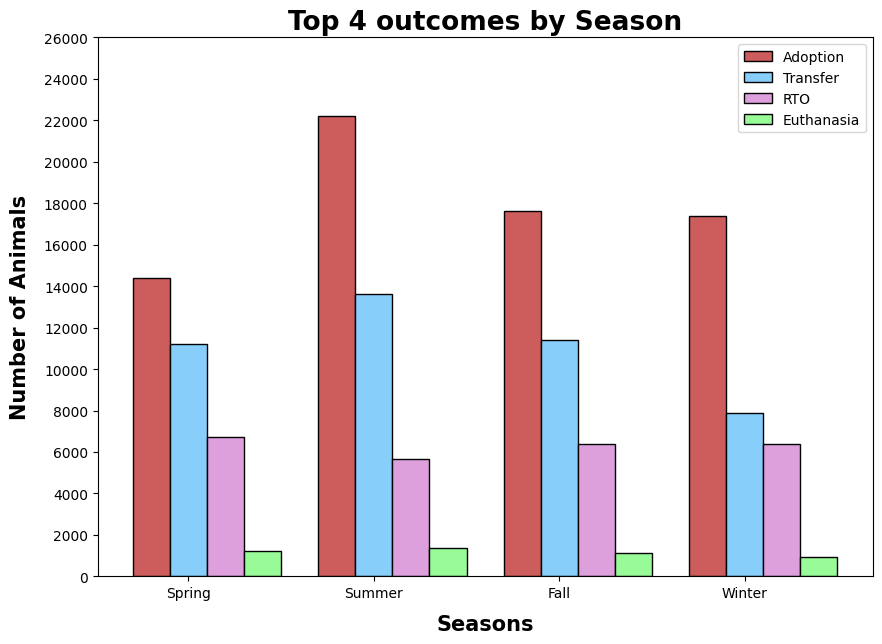

In [331]:
# Setting figure size
plt.figure(figsize=(10,7))

# Turning the x and y values into a numpy array
x = np.array(outcome_1.index)

y1 = np.array(outcome_1['Animal'])
y2 = np.array(outcome_2['Animal'])
y3 = np.array(outcome_3['Animal'])
y4 = np.array(outcome_4['Animal'])

# Setting width of bars
barWidth = 0.2

# Setting position of bars on the x axis
r1 = np.arange(len(y1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Plotting the bars
plt.bar(r1, y1, width = barWidth, label='Adoption', edgecolor='black', color='indianred')
plt.bar(r2, y2, width = barWidth, label='Transfer', edgecolor='black', color='lightskyblue')
plt.bar(r3, y3, width = barWidth, label='RTO', edgecolor='black', color='plum')
plt.bar(r4,y4, width = barWidth, label='Euthanasia', edgecolor='black', color='palegreen')

# Adding x and y axis values 
plt.xticks([r + barWidth for r in range(len(r1))], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.yticks(np.arange(0, 27000, step=2000))

plt.xlabel('Seasons', fontsize = 15, fontweight='bold', labelpad=10)
plt.ylabel('Number of Animals', fontsize = 15, fontweight='bold', labelpad=10)
plt.title('Top 4 outcomes by Season', fontsize = 19, fontweight = 'bold')
plt.legend()
plt.show()

By looking at seasonal trends, we can see that adoption rates are the highest during the summer. Whereas in spring, the number of adoptions is the lowest. However, we can also see that there are a significant amount of transfers during the spring (2000 less than adoptions).
One of the reasons for higher adoptions in the summer could be due to the summer break, so people have more free time and are likely to adopt a pet to spend time with. 

As we saw in the monthly intakes, May is the highest month for intakes. This is probably due to it being the kitten season (starts from April) and so people are likely to bring a litter to a shelter if they don’t see the mother around. Therefore, the number of transfers during spring is almost as high as the number of adoptions. We can further explore this by looking at the adoption rates per animal type.


### *11.3.b.i Types of animals adopted each season*

In [332]:
# Only returning data on the outcome type, animal and season of outcome and then reducing the data to only include the amount of animals adopted.

animals_adopted_by_season_df = shelter_copy_year_month.value_counts(['Outcome Type', 'Season_outcome', 'Animal']).reset_index(name='counts')
animals_adopted_by_season_df = animals_adopted_by_season_df[animals_adopted_by_season_df['Outcome Type'] == 'Adoption'].set_index('Season_outcome')

animals_adopted_by_season_df

Outcome Type Animal  counts
Season_outcome                            
Summer             Adoption    Cat   11017
Winter             Adoption    Dog   10990
Summer             Adoption    Dog   10901
Spring             Adoption    Dog    9988
Fall               Adoption    Dog    9519
Fall               Adoption    Cat    7783
Winter             Adoption    Cat    6173
Spring             Adoption    Cat    4156
Fall               Adoption  Other     254
Summer             Adoption  Other     244
Winter             Adoption  Other     172
Spring             Adoption  Other     163
Spring             Adoption   Bird     105
Fall               Adoption   Bird      78
Summer             Adoption   Bird      46
Winter             Adoption   Bird      31

In [333]:
# Storing data for each animal in a seperate df to then use to plot graph

# using the seasons variable (made in 11.3.b) to reindex according to the seasons order 
animal_1 = animals_adopted_by_season_df[animals_adopted_by_season_df['Animal'] == 'Dog'].reindex(index = seasons)
animal_2 = animals_adopted_by_season_df[animals_adopted_by_season_df['Animal'] == 'Cat'].reindex(index = seasons)
animal_3 = animals_adopted_by_season_df[animals_adopted_by_season_df['Animal'] == 'Bird'].reindex(index = seasons)
animal_4 = animals_adopted_by_season_df[animals_adopted_by_season_df['Animal'] == 'Other'].reindex(index = seasons)

### *11.3.b.ii Creating a bar graph to show the outcome types by season for each animal*

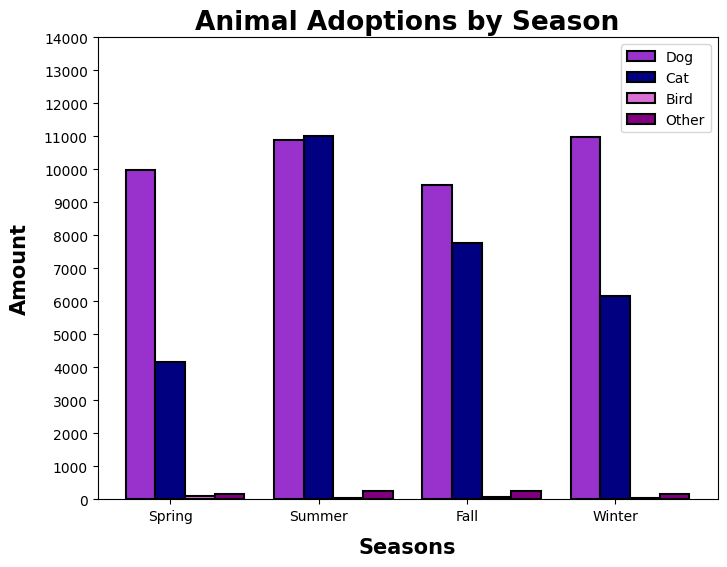

In [334]:
# Turning the x and y values into a numpy array
x = np.array(seasons)

y1 = np.array(animal_1['counts'])
y2 = np.array(animal_2['counts'])
y3 = np.array(animal_3['counts'])
y4 = np.array(animal_4['counts'])

# Setting width of bars
barWidth = 0.2

# Setting position of bars on the x axis
r1 = np.arange(len(y1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Plotting the bars
plt.bar(r1, y1, width = barWidth, label='Dog', edgecolor='black', color='darkorchid', linewidth=1.5)
plt.bar(r2, y2, width = barWidth, label='Cat', edgecolor='black', color="navy", linewidth=1.5)
plt.bar(r3, y3, width = barWidth, label='Bird', edgecolor='black', color='orchid', linewidth=1.5)
plt.bar(r4,y4, width = barWidth, label='Other', edgecolor='black', color='purple', linewidth=1.5)

# Adding x and y axis ticks
plt.xticks([r + barWidth for r in range(len(r1))], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.yticks(np.arange(0, 15000, step=1000))

plt.xlabel('Seasons', fontsize = 15, fontweight='bold', labelpad=10)
plt.ylabel('Amount', fontsize = 15, fontweight="bold", labelpad=10)
plt.title('Animal Adoptions by Season', fontsize = 19, fontweight = 'bold')

plt.legend(bbox_to_anchor=(1,1))

plt.show()

To further support our finding above, there is a significantly lower amount of adoptions for cats during the spring whereas in the summer, there is a peak. Again this could be due to the kitten season, which means by summer, the kittens are old enough for adoption. 

The corresponding adoptions for dogs do not show a notable trend as they maintain a high number of adoptions all year round with only a slightly lower amount of dog adoptions during Fall.

Overall, adoptions are more popular during the summer for both cats and dogs with respectively 10,928 and 10,853 adoptions.


### *11.3.c.i Animal outcomes by Month*

In [335]:
# grouping by the month outcome and outcome type
monthly_outcome_types = shelter_copy_year_month.groupby(['Month_Outcome', 'Outcome Type'])['Animal'].count().reset_index()

# Converting intake and outcome months to word 
monthly_outcome_types['Month_Outcome']= monthly_outcome_types['Month_Outcome'].apply(lambda x: calendar.month_name[x])
monthly_outcome_types

Month_Outcome     Outcome Type  Animal
0        January         Adoption    5799
1        January             Died      78
2        January       Euthanasia     295
3        January          Missing       4
4        January  Return to Owner    2235
..           ...              ...     ...
76      December             Died      94
77      December       Euthanasia     331
78      December          Missing       7
79      December  Return to Owner    2236
80      December         Transfer    2802

[81 rows x 3 columns]

### *11.3.c.ii Creating a multi-line graph to visualise the top 4 outcome types by month*

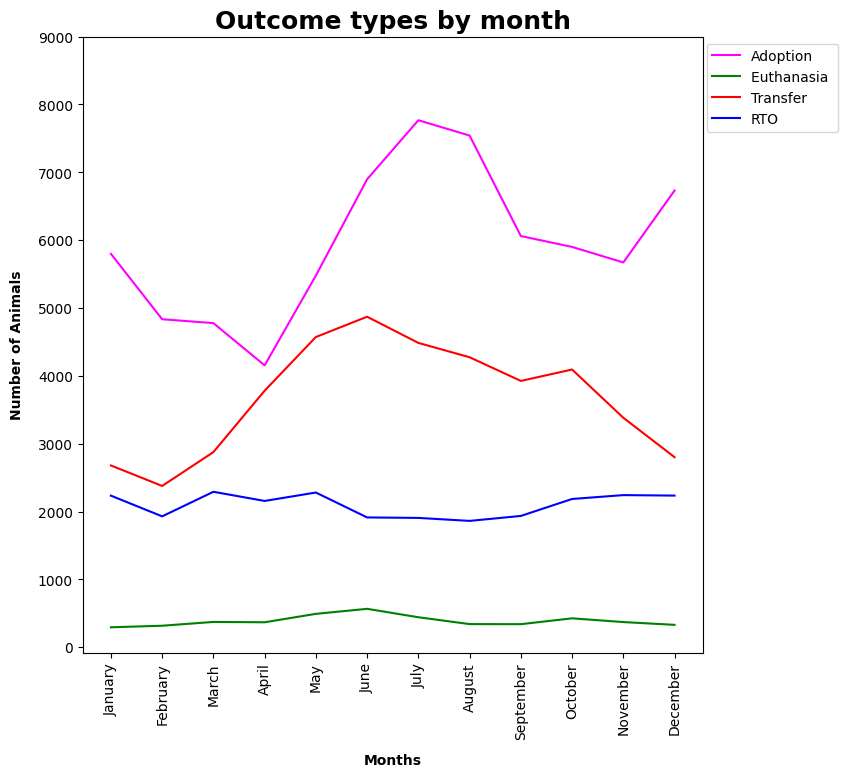

In [336]:
# Storing data for the 3 most outcome types into seperate variables to plot in the graph
outcome_adoption = monthly_outcome_types[monthly_outcome_types['Outcome Type'] == 'Adoption']
outcome_euthanasia = monthly_outcome_types[monthly_outcome_types['Outcome Type'] == 'Euthanasia']
outcome_transfer = monthly_outcome_types[monthly_outcome_types['Outcome Type'] == 'Transfer']
outcome_rto = monthly_outcome_types[monthly_outcome_types['Outcome Type'] == 'Return to Owner']

plt.figure(figsize=(8,8))
# creating multi-line graph by plotting each outcome type
plt.plot(outcome_adoption['Month_Outcome'], outcome_adoption['Animal'], color="magenta",label="Adoption")
plt.plot(outcome_euthanasia['Month_Outcome'], outcome_euthanasia['Animal'], color="green", label="Euthanasia ")
plt.plot(outcome_transfer['Month_Outcome'], outcome_transfer['Animal'], color="red", label="Transfer ")
plt.plot(outcome_rto['Month_Outcome'], outcome_rto['Animal'], color="blue", label="RTO")

# setting tick values - x ticks to 90degree to prevent overlapping of values
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 10000, step=1000))

plt.title('Outcome types by month', fontweight='bold', fontsize=18)
plt.xlabel('Months', fontweight='bold', labelpad=10)
plt.ylabel('Number of Animals', fontweight='bold', labelpad=10)

plt.legend(loc="best", bbox_to_anchor=(1.23,1))
plt.show()

The analysis of three main outcome types (adoption, euthanisa and transfer) shows a stable level of euthanisa across the year compared to the corresponding amounts of adoption and transfer in the shelter. Indeed, the number of adoptions experiences two major increases from April to July and during Winter (November to December). This observation is in line with the previous seasonal analysis. Overall, the pattern of transfers reflects the one of the adoptions, although the increase of transfers occurs slightly before the one of adoptions (from February up to June). The number of animals returned to their owner stays at a steady rate through all months. 

### *11.3.d Analysing adoption outcome during covid*

When looking at the intake and outcomes by year (11.1), we noticed a significant drop in the intakes and outcomes from 2019 to 2020. As we know this when covid had started, we will explore the data further to see what happened to the outcome types during this period. 

In [337]:
# Converting the intake date and outcome date to only have the year in the dates
shelter_copy['Intake Date'] = shelter_copy['Intake Date'].dt.strftime('%Y')
shelter_copy['Outcome Date'] = shelter_copy['Outcome Date'].dt.strftime('%Y')

In [338]:
# Grouping by outcome date and outcome type

outcome_animal_types = shelter_copy[['Outcome Date', 'Outcome Type']].value_counts().sort_index()
outcome_animal_types = outcome_animal_types.reset_index(name='count')

outcome_animal_types.head(3)

Outcome Date Outcome Type  count
0         2013     Adoption   1304
1         2013         Died     16
2         2013   Euthanasia    255

In [339]:
# Narrowing down to look at data for 2019 and 2020

outcome_type_2019_2020 = outcome_animal_types[outcome_animal_types['Outcome Date'].isin(['2019', '2020'])]
outcome_type_2019_2020.head(3)

Outcome Date Outcome Type  count
39         2019     Adoption   9411
40         2019         Died    258
41         2019   Euthanasia    389

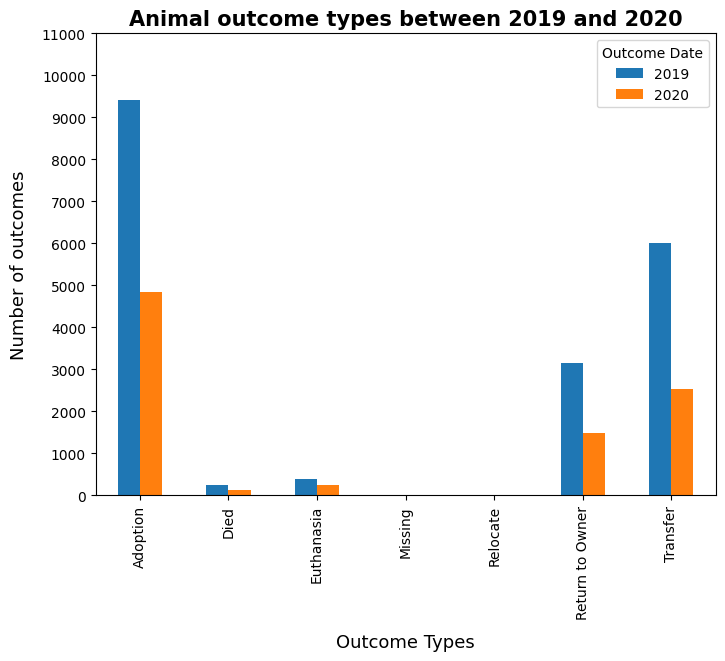

In [340]:
# plotting bar graph to show the changes in amount of outcomes for each outcome type in 2019 and 2020
plt.rcParams["figure.figsize"] = (8, 6)

outcome_type_2019_2020.pivot(index="Outcome Type", columns="Outcome Date", values="count").plot(kind="bar")

plt.xlabel('Outcome Types', fontsize=13, labelpad=10)
plt.ylabel('Number of outcomes', fontsize=13, labelpad=10)
plt.title('Animal outcome types between 2019 and 2020',fontweight='bold', fontsize=15)

plt.yticks(np.arange(0, 12000, step=1000))


plt.show()

In 2019, there was a higher adoption rate by almost double the amount of adoptions that took place in 2020. However, we can argue that due to the reduce amount of outcomes in 2020, the adoption rates are not as low as expected. Compared to all the other outcome types, adoptions were still the highest outcome in 2020. 
However, it is worth noting that there were still a significant amount of animals that were transferred in both 2019 and 2020. 

Due to covid, the number of adoptions had reduced but this is also due to the shelter not having as many intakes during that period.

## **Exploring the change in adoption rate over time**

### *11.4.i Comparison of the number of intakes vs the adoption rates each year*

In [341]:
# Looking at the adoption rate per year
outcome_adoption = shelter_copy[shelter_copy['Outcome Type'] == 'Adoption']

adoption_by_year = outcome_adoption.groupby('Intake Date', as_index=False)['Animal'].count()
adoption_by_year

Intake Date  Animal
0         2013    1628
1         2014    7056
2         2015    7492
3         2016    8104
4         2017    8000
5         2018    8130
6         2019    9346
7         2020    4708
8         2021    6897
9         2022    6692
10        2023    3567

In [342]:
# Seeing all the outcome types 

outcome_types = shelter_copy.groupby(['Outcome Type'], as_index=False)['Animal'].count()
outcome_types

Outcome Type  Animal
0         Adoption   71620
1             Died    1527
2       Euthanasia    4672
3          Missing      79
4         Relocate      12
5  Return to Owner   25180
6           Stolen       5
7         Transfer   44128

From the outcome types count, we can see that aside from adoption, the other outcomes with high values are euthanasia, return to owner and transfer.
Therefore we will just look into this data

In [343]:
outcome_adopt = shelter_copy.query("`Outcome Type` == 'Adoption'").groupby('Intake Date')['Animal'].count().to_list()
outcome_adopt

[1628, 7056, 7492, 8104, 8000, 8130, 9346, 4708, 6897, 6692, 3567]

In [344]:
outcome_died = shelter_copy.query("`Outcome Type` == 'Died'").groupby('Intake Date')['Animal'].count().to_list()
outcome_died

[20, 105, 154, 190, 149, 168, 261, 133, 149, 115, 83]

In [345]:
# Grouping by Euthanasia
outcome_euthanasia = shelter_copy.query("`Outcome Type` == 'Euthanasia'").groupby('Intake Date')['Animal'].count().tolist()
outcome_euthanasia

[269, 1090, 907, 469, 374, 295, 390, 241, 259, 253, 125]

In [346]:
outcome_rto = shelter_copy.query("`Outcome Type` == 'Return to Owner'").groupby('Intake Date')['Animal'].count().to_list()
outcome_rto

[735, 3286, 3493, 3298, 3338, 3147, 3149, 1480, 1357, 1274, 623]

In [347]:
outcome_transfer = shelter_copy.query("`Outcome Type` == 'Transfer'").groupby('Intake Date')['Animal'].count().to_list()
outcome_transfer

[1287, 6146, 5970, 4769, 4858, 4622, 6035, 2473, 2916, 3038, 2014]

In [348]:
# Intakes per year
intake_by_year = shelter_copy.groupby('Intake Date')['Animal'].count().reset_index()
intake_by_year.head(3)

Intake Date  Animal
0        2013    3941
1        2014   17687
2        2015   18035

### *11.4.ii Creating a multi-line plot to visualise the intakes and majority outcomes*

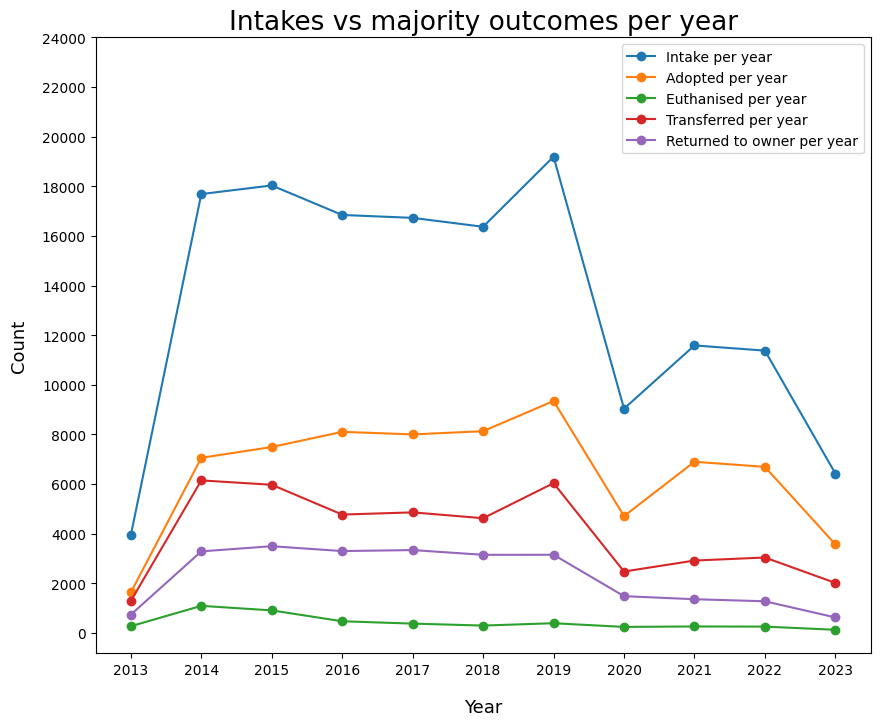

In [349]:
# setting x axid value as it will be the same for all 
x_val_year = intake_by_year['Intake Date']

plt.figure(figsize=(10,8))

# plotting all the lines we need for the mutl-line plot
plt.plot(x_val_year, intake_by_year['Animal'], '-o', label='Intake per year')
plt.plot(x_val_year, outcome_adopt, '-o' , label='Adopted per year')
plt.plot(x_val_year, outcome_euthanasia, '-o' , label='Euthanised per year')
plt.plot(x_val_year, outcome_transfer, '-o' , label='Transferred per year')
plt.plot(x_val_year, outcome_rto, '-o' , label='Returned to owner per year')

plt.title('Intakes vs majority outcomes per year', fontsize=19)
plt.xlabel('Year', fontsize=13, labelpad=15)
plt.ylabel('Count', fontsize=13, labelpad=10)

plt.yticks(np.arange(0, 25000, step=2000))

plt.legend(bbox_to_anchor=(1,1))

plt.show()

The graph above shows the adoption rate compared to the intakes per year. There was a steady increase in the adoption rates between 2014 and 2018. In 2019, the adoption rates increased but not as much as the intakes. 

From 2019 to 2020, a decrease in the adoption rates is observed but this is due to the major decrease in intakes. However, despite this observation, there is still a big gap between the number of intakes and the adoption rates.
Therefore, a comparision of each outcome type against the intakes for each year will be undertaken to see whether the adoption rate is the highest amongst all outcome types or not.

As expected, the adoption rates has been the highest each year. However, the number of transfers is higher than expected. As we can see, the overall intakes is very high which means that  the animals that do not get adopted or are not returned to their owner will end up getting transferred. This may be due to insufficient space in the austin shelter to keep all the animals that are taken in. 

## **Summary**

### *The time series analysis of the data reveals insights regarding adoption rates over the years and for each season. The analysis highlights that compared to the number of intakes per year, the animals adopted are less than half. Cats are the least adopted animals especially during the spring. The highest adoption rates are during the summer months, with the peak adoption rate being in July. In April the number of adoptions is only slightly higher than the number of transfers, showing that April is the month where the shelter needs to increase their adoptions rates and reduce the transfers. Cats spend more time in the shelter overall comapared to dogs no matter the age.*

### *These findings suggest that the shelter is succeful during the summer months as well during December (Winter holidays) with having animals adopted, however they should now focus on the spring season to increase the adoption and return to owner rates which should reduce the amount of transfers.*